In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('all_reviews.csv')

In [3]:
df

Movie_Name  Year  \
0                                Boyhood  2014   
1                           The Babadook  2014   
2                         The LEGO Movie  2014   
3                           Nightcrawler  2014   
4                            Life Itself  2014   
5                               Whiplash  2014   
6                                Birdman  2014   
7                             Mr. Turner  2014   
8                    Two Days, One Night  2014   
9                                 Gloria  2014   
10                           Snowpiercer  2014   
11               Guardians of the Galaxy  2014   
12                             Leviathan  2014   
13                            Starred Up  2014   
14       The Tale of the Princess Kaguya  2014   
15              The Grand Budapest Hotel  2014   
16            X-Men: Days of Future Past  2014   
17     Live Die Repeat: Edge of Tomorrow  2014   
18                     Jodorowsky's Dune  2014   
19                       Song Of The Sea  2014   
20                   The Missing Picture  2014   
21        Dawn Of The Planet Of The Apes  2014   
22                                   Ida  2014   
23                           Citizenfour  2014   
24                      The Overnighters  2014   
25                             Blue Ruin  2014   
26                               Ilo Ilo  2014   
27                      We Are the Best!  2014   
28                    The Imitation Game  2014   
29                       Love Is Strange  2014   
..                                   ...   ...   
470                       Border (Gräns)  2018   
471    To All the Boys I've Loved Before  2018   
472                                Tully  2018   
473                    Burning (Beoning)  2018   
474                         Lean on Pete  2018   
475                           Bisbee '17  2018   
476                              Western  2018   
477                     Hearts Beat Loud  2018   
478                        Journey's End  2018   
479                     American Animals  2018   
480                              Revenge  2018   
481  Robin Williams: Come Inside My Mind  2018   
482                           Nico, 1988  2018   
483           If Beale Street Could Talk  2018   
484                    Support the Girls  2018   
485        Teen Titans Go! To the Movies  2018   
486       The Guardians (Les Gardiennes)  2018   
487                                  CAM  2018   
488                       A Simple Favor  2018   
489                            24 Frames  2018   
490                         Molly's Game  2018   
491            Ralph Breaks the Internet  2018   
492                              Whitney  2018   
493                            Halloween  2018   
494                           Game Night  2018   
495                 A Prayer Before Dawn  2018   
496                       We the Animals  2018   
497                              Upgrade  2018   
498                              Colette  2018   
499     The Miseducation of Cameron Post  2018   

                                               Reviews  
0    [" Like Michael Apted in his Seven Up! documen...  
1    [' A deftly inventive and psychologically char...  
2    [' The movie is a wonderful surprise, cleverly...  
3    [' Like an alternate version of Network in whi...  
4    [" With Ebert's blessing and encouragement, Li...  
5    [' Revealing both the dangers and payoffs of a...  
6    [' Birdman, more than most, seems a film that ...  
7    [" Mike Leigh's biopic is so richly detailed t...  
8    [" Consider Marion Cotillard's Oscar-nominated...  
9    [" We don't make movies in America like Gloria...  
10   [" That rare experience you don't get to have ...  
11   [' If Guardians of the Galaxy is an origin sto...  
12   [' A palpable and melancholy aura of resignati...  
13   [' Mackenzie is seeking to understand how all ...  
14   [' Plays out as a wistful, slow-burning romanc...  
15   [' "The Gran

In [12]:
df['Reviews'][1]

'[\' A deftly inventive and psychologically charged horror story that trades on the ways in which the prospect of maternal failure can be just as fearsome a boogeyman as any monster under the bed.\', \' The film has a solid grasp on the mutable, but ever-present pain of loss. \', " The line between terrifying reality and terrifying fantasy isn\'t so much blurred as altogether obliterated.", \' This simple yet shiver-inducing tale, the auspicious feature debut of Australian writer/director Jennifer Kent, makes for one of the better horror movies of recent times.\', \' It presents grief as a demon, questions reality, and creeps out the viewer by making psychopathology seem like something that could happen to anybody.\', \' At its heart, "The Babadook" is a story of mother and son, whose relationship ultimately determines whether they survive the demon - or die trying.\', \' In the running with Boyhood as my favorite movie of 2014 is another work that turns on the challenges of parenting.

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy.misc import imread
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


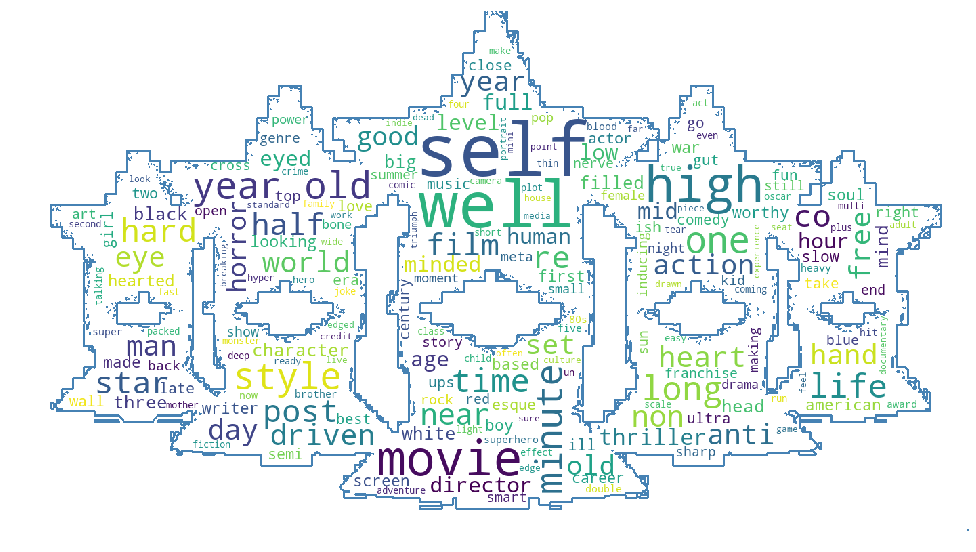

In [6]:
import nltk
from wordcloud import WordCloud, STOPWORDS
review=df['Reviews'].str.lower().str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(review)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
origin_image = imread("Reviews.jpg")
origin_mask = origin_image
words_without_stop = nltk.FreqDist(w for w in words if w not in stopwords) 
wc = WordCloud(stopwords=STOPWORDS,background_color='white',mask=origin_mask, contour_width=3, 
               contour_color='steelblue').generate(" ".join(words_without_stop))
plt.imshow(wc)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.axis('off')
plt.show()

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import os

In [8]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()

In [9]:
positive_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [21]:
rev=df['Reviews']
from nltk import word_tokenize
for text in rev:
    for word in word_tokenize(text):
        if word in positive_words:
            if debug:
                print("Positive",word)
        cpos+=1
        if word in negative_words:
            if debug:
                print("Negative",word)
        cneg+=1

[
``
Like
Michael
Apted
in
his
Seven
Up
!
documentary
series
,
Linklater
makes
you
feel
as
if
you
're
watching
a
photograph
as
it
develops
in
the
darkroom
.
``
,
'
Calling
it
a
sum
of
its
parts
can
be
a
backhanded
compliment
,
but
it
feels
like
especially
worthy
praise
for
Boyhood
,
considering
how
much
went
into
making
it
feel
whole
.
'
,
'
We
can
quibble
with
small
stuff
in
Boyhood
.
Supporting
performances
are
variable
,
the
sister
drops
out
as
a
dramatic
character
...
I
could
go
on
.
But
the
cumulative
power
is
tremendous
.
'
,
'
While
everything
about
Boyhood
is
done
with
extraordinary
care
,
the
master
stroke
was
clearly
the
casting
,
13
years
ago
,
of
a
little
Texas
boy
named
Ellar
Coltrane
.
'
,
``
It
's
like
a
time-lapse
photo
of
an
expanding
consciousness
.
``
,
``
A
word
about
the
film
's
epic
length
.
Boyhood
is
166
minutes
long
.
Yet
it
is
so
affecting
,
so
much
a
thing
of
wonder
,
that
it
could
run
forever
and
I
would
still
keep
watching
.
``
,
``
Linklater
's
casual
hand

through
the
fears
,
anxieties
,
and
repressed
rages
of
motherhood
.
'
,
'
Shot
in
chilly
shades
of
blue
,
``
The
Babadook
''
will
haunt
anyone
who\
's
ever
heard
a
cry
in
the
night
-
or
wondered
what
was
under
the
bed
,
in
the
dark
.
'
,
'
The
finest
and
most
genuinely
provocative
horror
movie
to
emerge
in
this
still
very-new
century
.
'
,
'
The
Babadook
makes
everyday
domestic
life
seem
like
the
most
natural
possible
place
to
encounter
monsters
of
every
description
,
including
the
monsters
that
we
ourselves
have
the
capacity
to
become
.
'
,
'
The
Babadook
makes
the
most
of
its
special
effects
as
needed
,
but
this
smart
little
frightener
keeps
its
head
close
to
the
rising
anxiety
of
a
young
widow
whose
husband
died
a
violent
death
.
'
,
'
You
will
be
scared
.
And
also
,
perhaps
even
more
scarily
,
moved
.
'
,
``
Although
the
supernatural
seems
the
likeliest
answer
,
it
's
not
the
only
one
,
and
audiences
can
read
the
film
either
way
.
``
,
'
A
small
film
that
packs
a
horribly
big
punch

[
'
Like
an
alternate
version
of
Network
in
which
Faye
Dunaway
cannibalizes
the
conscientious
William
Holden
character
,
Nightcrawler
cleverly
dispenses
with
any
debate
about
the
tyranny
of
ratings
and
the
erosion
of
privacy
.
'
,
'
A
gritty
urban
comedy
noir
,
a
scathing
,
Network-worthy
disembowelment
of
television
newsgatherers
that
will
leave
you
craving
a
shower
.
'
,
``
It
seems
like
a
lot
of
satirical
hue
and
cry
about
a
social
problem
I
'm
not
sure
the
nation
is
currently
plagued
by
.
Are
local
TV
news
stations
really
conducting
daily
bidding
wars
over
the
goriest
footage
random
freelancers
can
bring
them
?
``
,
'
Crashes
and
crime
scenes
are
his
bread
and
butter
.
He
is
driven
.
He
is
innovative
.
He
is
happy
.
He
is
also
a
monster
-
a
fiend
who
preys
on
people
at
their
weakest
and
worst
moments
.
'
,
'
Now
33
years
old
,
Gyllenhaal
is
the
same
age
that
De
Niro
was
in
Taxi
Driver
and
,
like
him
,
he
is
learning
to
channel
an
eerie
,
inner
charisma
,
offering
it
up
in
glimpses


Ebert
's
bestselling
2011
autobiography
.
``
,
'
``
Life
Itself
''
completes
the
circular
conversation
between
the
movies
,
the
man
and
the
masses
.
'
,
``
Though
Life
Itself
is
a
warts-and-all
portrait
Ebert
did
n't
live
to
review
,
my
guess
is
his
thumbs
would
be
shooting
upward
.
Mine
sure
are
.
``
,
'
Ebert
once
described
the
cinema
as
``
a
machine
that
generates
empathy
.
''
Watching
James\
's
lovely
film
,
you
know
exactly
what
he
means
.
'
,
``
What
makes
Life
Itself
such
a
wonderful
documentary
is
that
it
weds
Ebert
's
passion
for
the
good
things
in
life
to
his
quest
to
find
great
movies
.
``
,
``
[
Ebert
's
]
clear
,
sensible
prose
will
probably
hold
up
better
than
some
of
the
more
frantic
efforts
of
his
contemporaries
.
His
greatest
legacy
,
however
,
as
this
film
documents
,
was
his
courage
in
the
endgame
of
his
life
.
``
,
'
Incisive
,
graceful
and
,
yes
,
deeply
empathetic
.
'
,
'
I
love
this
movie
.
'
,
'
A
portrait
of
Ebert
that
is
funny
,
moving
,
sad
,
harrowing
and
ul

in
movies
,
and
particularly
not
in
the
singularly
riveting
way
they
come
together
in
Whiplash
.
'
,
``
Ultimately
,
what
keeps
Whiplash
from
becoming
a
joyride
whose
effects
last
only
as
long
as
its
adrenaline
rush
are
Simmons
and
Teller
's
performances
and
Chazelle
's
insight
into
Andrew
's
personality
.
``
,
'
``
Whiplash
''
will
instill
not
just
respect
but
awe
.
It
also
happens
to
feature
a
pair
of
performances
that
eclipse
all
else
around
them
.
'
,
``
This
is
a
student
film
in
rampant
overdrive
and
it
will
attract
attention
and
offers
.
So
I
just
hope
Mr.
Chazelle
does
n't
believe
too
much
in
his
film
's
dumb
message
.
``
,
'
You
may
not
even
notice
the
flaws
,
since
we
get
so
many
compelling
layers
to
sift
through
.
'
,
'
It
may
get
a
few
things
wrong
,
but
it
aims
at
,
and
finally
achieves
,
an
authenticity
at
once
more
exalted
and
more
primal
than
mere
verisimilitude
.
'
,
``
Even
if
you
could
n't
care
less
about
jazz
drumming
...
Whiplash
is
a
thrill
to
watch
.
``
,
``
More


'
For
modern
moviegoers
,
the
earthy
``
Mr.
Turner
''
may
seem
like
slowly
steeped
tea
with
an
unpleasant
aftertaste
.
But
while
some
are
impatiently
waiting
for
the
paint
to
dry
,
astute
viewers
will
see
a
cinematic
landscape
bloom
.
'
,
'
If
the
past
is
a
foreign
country
,
then
``
Mr.
Turner
''
is
one
of
the
most
rhapsodic
foreign
films
you
may
ever
see
.
'
,
``
Mr.
Turner
is
no
barrel
of
laughs
.
It
's
a
barrel
of
life
-
an
extraordinary
one
.
``
,
'
Mr.
Turner
,
like
just
about
all
movies
made
by
Mike
Leigh
,
creates
the
sensation
of
being
in
a
vividly
realized
mini-universe
built
from
the
ground
up
.
'
,
``
An
inspired
film
,
a
beautiful
exploration
of
art
and
creation
and
difficulty
,
with
Spall
's
brilliant
performance
at
its
center
.
``
,
``
Timothy
Spall
gives
an
admirably
warty
and
unpleasant
performance
as
Turner
,
an
arrogant
and
uncompromising
man
who
's
annoyed
by
his
celebrity
in
Britain
but
shocked
when
the
public
turns
against
his
work
.
``
,
'
A
gorgeous
,
important
f

in
its
cast-iron
sense
of
purpose
.
'
,
``
Affecting
and
expertly
made
as
it
is
,
the
movie
's
tight
focus
and
streamlined
quality
left
me
wanting
more
.
``
,
'
Specialists
in
unvarnished
intimacy
,
the
Dardenne
brothers
add
another
clear-eyed
contemplation
of
stark
social
reality
to
their
impressive
output
.
'
,
'
The
Dardenne
brothers
take
on
a
movie
star
and
lose
none
of
their
beautifully
observed
verisimilitude
in
another
powerhouse
slice
of
working-class
Belgian
life
.
'
]
[
``
We
do
n't
make
movies
in
America
like
Gloria
,
so
we
have
to
import
them
.
I
wish
we
'd
import
more
--
and
make
a
few
,
as
well
.
``
,
``
Whether
you
appreciate
Gloria
as
a
portrait
of
a
vital
woman
,
muddling
through
life
's
middle
chapters
,
or
as
an
allegory
of
Chilean
resilience
,
the
message
is
the
same
:
Let
's
face
the
music
and
dance
.
``
,
``
It
's
an
open-ended
question
whether
Gloria
ever
finds
the
happiness
she
seeks
while
dodging
the
current
of
middle-aged
isolation
,
but
her
constant
search
is

be
:
a
slambam
sci-fi
thriller
with
a
brain
,
a
heart
and
an
artful
sense
of
purpose
.
'
,
``
Snowpiercer
sucks
you
into
its
strange
,
brave
new
world
so
completely
,
it
leaves
you
with
the
all-too-rare
sensation
that
you
've
just
witnessed
something
you
've
never
seen
before
...
and
need
to
see
again
.
``
,
``
It
's
a
film
that
,
in
its
own
peculiar
way
,
forces
viewers
to
question
their
values
and
ask
themselves
how
much
they
're
willing
to
sacrifice
for
a
functioning
society
,
and
how
much
is
too
much
.
``
,
'
Though
shocking
violence
and
black
humor
run
through
the
length
of
the
movie
,
what
comes
through
most
strongly
is
its
pessimistic
political
conscience
;
were
the
movie
less
earnest
,
it
might
seem
Verhoeven-esque
.
'
,
``
The
nihilism
would
be
cooler
if
it
felt
like
more
was
at
stake
.
But
if
you
settle
in
,
it
's
one
wild
ride
.
``
,
``
Do
n't
miss
it
-
this
is
enormously
fun
visionary
filmmaking
,
with
a
witty
script
and
a
great
international
cast
.
``
,
``
If
you
love
movi

people
challenge
entrenched
hierarchies
.
'
,
``
Early
and
strong
contender
for
this
year
's
best
miserable
time
at
the
movies
.
``
,
'
Heavy
stuff
but
highly
rewarding
,
and
an
illuminating
look
into
a
country
still
steeped
in
its
brutal
past
.
'
,
'
Yes
,
this
could
happen
anywhere
,
but
you
get
the
feeling
it
happens
often
in
Russia
.
The
only
real
hope
here
is
that
a
movie
this
hard
on
the
motherland
could
be
made
there
.
'
,
'
``
Leviathan
''
plays
like
downer
Tolstoy
,
masterfully
specific
to
these
people
and
unforgivingly
allegorical
toward
the
country
at
large
.
'
,
'
A
story
of
political
and
spiritual
corruption
,
of
men
and
women
accustomed
to
power
,
and
of
others
fighting
against
it
.
'
,
'
At
times
the
movie
suggests
a
Cheech
and
Chong
comedy
with
cannabis
replaced
by
vodka
.
'
,
'
An
observant
and
skillfully
crafted
film
about
corruption
in
modern-day
Russia
.
'
,
'
Enormously
captivating
,
a
study
of
oppression
,
human
nature
and
the
effect
of
the
two
things
upon
each
ot

their
salt
,
the
movie
trusts
children
to
take
on
the
big
themes
of
life
,
death
and
despair
included
,
and
thus
removes
the
sting
.
'
,
'
Notably
,
the
original
story
was
called
``
The
Tale
of
the
Bamboo
Cutter
,
''
but
Takahata\
's
title
puts
the
focus
where
it
belongs
.
'
,
``
A
thing
of
endless
visual
beauty
that
seems
to
partake
in
a
kind
of
pictorial
minimalism
but
finds
staggering
possibilities
for
beautiful
variation
within
its
ineluctable
modality
.
It
's
a
true
work
of
art
.
``
,
'
A
lovely
,
glacially
told
gem
from
animator
Isao
Takahata
,
the
78-year-old
cofounder
with
Hayao
Miyazaki
of
Studio
Ghibli
.
'
,
'
Distills
a
millennium
of
Japanese
storytelling
into
a
timeless
film
that
feels
both
ancient
and
alive
in
equal
measure
.
'
,
'
An
allegory
about
the
irrecoverable
joys
of
childhood
,
it
may
make
parents
hug
their
kids
now
.
'
,
``
It
's
a
lovely
piece
of
work
.
``
,
``
Isao
Takahata
's
retelling
of
the
oldest
recorded
Japanese
narrative
is
a
visionary
tour
de
force
.
''

yet
,
despite
resulting
in
a
film
that
brings
together
the
cast
of
the
original
X-Men
films
and
the
upstarts
of
the
clever
2011
reboot
X-Men
:
First
Class
,
Singer
keeps
what
matters
clear
and
snappy
enough
.
``
,
``
The
film
is
visually
exciting
,
aping
the
look
of
period
camerawork
effectively
in
several
1970s
scenes
.
The
actors
are
n't
overwhelmed
by
effects
for
the
most
part
.
``
,
``
Singer
's
return
in
the
pretzel-logic
pop
fantasia
X-Men
:
Days
of
Future
Past
is
so
triumphant
because
of
how
effortless
he
makes
connecting
the
dots
seem
.
It
's
an
epic
that
could
n't
be
more
Byzantine
on
paper
but
scans
with
ease
on
screen
.
``
,
'
It
all
trots
along
at
a
brisk
pace
with
genuinely
impressive
special
effects
and
decent
gags
.
Bryan
Singer
really
cares
about
his
mutant
outcasts
,
weaving
just
enough
drama
into
the
superhero
shenanigans
.
'
,
'
``
X-Men
:
Days
of
Future
Past\'\
'
blows
a
breath
of
fresh
air
through
the
musty
Marvel
universe
,
which
increasingly
is
all
about
panderin

hands
,
and
for
a
big
summer
star
vehicle
,
that
's
surprise
enough
.
``
,
``
Although
the
humor
helps
,
the
Groundhog
Day-like
repetition
gets
tedious
;
it
makes
you
feel
more
like
a
hamster
than
a
groundhog
-
or
rather
a
hamster
's
wheel
,
going
round
and
round
,
over
and
over
again
.
``
,
'
Tom
Cruise
stars
in
this
cleverly
crafted
and
propulsively
executed
sci-fi
thriller
about
a
soldier
forced
to
relive
the
same
day
over
and
over
again
.
'
]
[
'
Pavich
shows
us
many
images
from
the
storyboard
,
and
even
treats
some
to
a
simple
form
of
animation
to
suggest
how
the
movie
might
have
looked
.
'
,
'
This
documentary
version
of
Jodorowsky\
's
``
Dune
''
is
probably
more
entertaining
than
what
Hollywood
would
have
done
to
it
,
with
a
clearer
message
:
Our
lives
are
like
sands
though
an
hourglass
,
so
dream
the
impossible
dream
.
'
,
'
A
deeply
moving
testament
to
single-minded
,
indefatigable
commitment
of
creative
vision
and
to
an
almost
spiritual
ability
to
let
that
vision
go
,
thereby

These
miniatures
magnify
their
subjects
,
and
ennoble
them
.
The
picture
is
anguishing
to
see
,
but
it
is
n't
missing
anymore
.
``
,
'
Panh
believes
that
those
who
survive
such
oppression
are
obligated
to
speak
about
it
-
and
this
chronicle
is
impossible
not
to
watch
.
'
,
'
This
is
a
first-person
account
of
astonishing
suffering
,
yet
the
experience
of
watching
``
The
Missing
Picture
''
is
not
punishing
.
'
,
'
Panh
blends
documentary
,
personal
memoir
and
eccentric
artistic
experiment
...
'
,
'
As
an
examination
of
memory
and
experience
and
how
they
shape
us
,
``
The
Missing
Picture
''
is
meaningful
beyond
its
specific
subject
matter
.
'
,
'
The
audacity
of
``
The
Missing
Picture
''
-
a
brilliant
documentary
about
a
child
who
held
on
to
life
in
Cambodia\
's
killing
fields
-
is
equaled
only
by
its
soulfulness
.
'
,
``
The
Missing
Picture
is
so
immediate
,
so
vital
,
it
practically
breathes
.
Not
all
memoirs
need
to
exist
.
But
the
gentle
urgency
of
Panh
's
story
is
right
there
in
the


work
even
if
,
in
its
totality
,
it
's
underwhelming
as
argument
or
cinema
.
``
,
``
You
should
see
this
movie
if
you
're
naïve
enough
to
think
you
have
a
right
to
privacy
.
But
do
n't
buy
your
ticket
online
or
with
a
credit
card
.
``
,
'
Citizenfour
does
an
excellent
job
of
balancing
what
we
already
know
with
behind-the-scenes
discussions
of
how
the
information
should
be
released
.
'
,
'
Citizenfour
is
at
its
most
eye-opening
and
essential
simply
as
a
portrait
of
the
then
29-year-old
Snowden
at
a
point
of
absolute
no-return
in
his
life
.
'
,
'
``
Citizenfour
''
is
an
urgent
,
gripping
real-life
spy
story
that
should
be
seen
by
every
American
,
and
quite
likely
by
everybody
else
too
.
'
,
``
No
matter
one
's
personal
stance
about
what
Snowden
did
,
this
revelatory
work
is
fascinating
and
thought-provoking
,
if
,
at
the
same
time
,
oddly
lacking
in
tension
...
''
,
'
Adapting
the
cold
language
of
data
encryption
to
recount
a
dramatic
saga
of
abuse
of
power
and
justified
paranoia
,
Poitr

,
``
The
film
's
winsome
,
self-satisfied
comedy
will
no
doubt
appeal
more
to
viewers
who
prize
juvenile
hi-jinks
over
the
cultural
moment
it
depicts
.
``
,
``
Audiences
can
be
pleased
to
find
a
story
in
which
its
young
female
characters
are
n't
victims
,
or
even
pretty
little
liars
,
but
just
friends
.
And
good
ones
,
at
that
.
``
,
'
If
ever
a
movie
earned
the
exclamation
point
in
its
title
,
it\
's
Lukas
Moodysson\
's
``
We
Are
the
Best
!
``
'
,
'
We
are
the
Best
!
is
smart
,
funny
and
real
,
an
honest
peek
into
the
secret
lives
of
girls
.
'
,
'
What
we
have
here
is
an
exhilarating
blast
of
a
movie
,
full
of
heart
but
still
punk
rock
...
We
Are
the
Best
!
is
loud
,
crude
,
socially
irresponsible
and
totally
irresistible
.
'
,
'
Despite
the
unruly
music
at
its
center
,
the
filmmaker
has
crafted
a
uniformly
gentle
ode
to
growing
up
.
'
,
``
It
's
a
being-of-age
story
,
in
Swedish
with
English
subtitles
,
the
age
being
early
adolescence
,
when
kids
with
throbbing
hearts
and
incompletel

and
the
despair
of
becoming
a
burden
on
the
next
generation
.
``
,
'
See
``
Love
Is
Strange
''
for
its
sensitivity
and
understated
jokes
,
but
mainly
for
Lithgow
and
Molina\
's
expertly
modulated
work
,
which
pulls
the
movie
back
when
it
threatens
to
stray
into
melodrama
or
heavy-handedness
.
'
,
'
Many
,
I
suspect
,
will
be
moved
to
tears
by
``
Love
Is
Strange
,
''
which
Sachs
earns
the
hard
way
:
not
by
amping
up
the
dramatic
situations
,
but
by
grace
notes
and
quiet
spells
cast
by
all
the
right
actors
.
'
,
``
The
living-apart
scenario
is
contrived
--
there
was
no
way
for
these
men
to
share
a
space
somewhere
?
--
but
the
two
actors
are
so
good
that
it
does
n't
much
matter
.
``
,
``
Lithgow
,
with
his
modulated
flamboyance
,
and
Molina
,
with
his
sad-eyed
realism
,
are
perfect
individually
and
as
a
team
.
But
the
movie
tends
to
drift
away
from
an
audience
,
because
it
's
all
sensibility
,
no
sense
.
``
,
'
You
need
to
give
``
Love
Is
Strange
''
your
eyes
and
ears
and
attention
,
let


It
's
a
smart
,
subversive
tip
of
the
hat
to
everything
from
American
and
Italian
Westerns
to
horror
movies
,
Jim
Jarmusch
,
love
stories
,
Iranian
traditionalism
and
rock
'n
'
roll
.
Oh
,
and
there
's
a
vampire
.
``
,
``
The
film
,
with
references
to
New
Wave
revenge
thrillers
and
stylized
pop
soundtracks
,
gradually
takes
its
time
but
does
n't
outlast
its
welcome
.
``
,
``
The
expressionist
shadows
,
floating
chador
,
and
wilted
patriarchy
make
the
whole
movie
feel
forbidden
.
There
's
something
in
the
nothing
.
``
,
'
``
A
Girl
Walks
Home
Alone
at
Night
''
is
a
wildly
inventive
Iranian
vampire
movie
that
grabs
you
by
the
throat
with
its
dark
,
moody
style
,
pulsating
soundtrack
and
offbeat
love
story
.
'
,
'
It
may
not
be
deep
.
But
dear
lord
,
is
this
movie
gorgeous
.
'
,
``
Just
when
you
thought
you
'd
seen
every
possible
variation
on
the
vampire
tale
,
along
comes
an
Iranian
bloodsucker
romance
set
to
spaghetti-Western
music
.
``
,
'
The
film
launches
itself
into
a
dreamspace
of


film
wishing
it
were
10
minutes
longer
.
'
,
'
By
the
end
,
even
those
who
had
never
heard
of
Stritch
can
share
her
rage
against
the
dying
of
the
light
.
'
,
'
An
enjoyably
fawning
documentary
.
'
,
'
This
is
a
must-see
for
anyone
who
loves
theater
,
acting
and
especially
individuals
like
Elaine
Stritch
unafraid
to
bare
their
souls
--
so
all
of
us
can
gain
more
insight
into
the
complicated
essence
of
the
human
condition
.
'
,
'
Stritch
,
in
her
trademark
billowy
white
blouses
and
skinny
black
tights
,
or
in
bed
,
without
makeup
and
without
,
sometimes
,
a
lucid
notion
,
reveals
herself
to
be
full
of
opposing
emotions
and
desires
.
'
,
``
This
profile
of
stage
and
screen
veteran
Elaine
Stritch
,
shot
during
her
87th
year
,
is
n't
a
documentary
so
much
as
an
improvised
star
vehicle
;
she
plays
to
the
camera
through
the
entire
movie
and
puts
on
a
hell
of
a
show
.
``
,
'
You
watch
``
Shoot
Me
''
wishing
this
woman
could
keep
sashaying
through
her
showbiz
life
forever
...
'
,
``
The
movie
'

,
inviting
quality
that
befits
the
storybook
narrative
.
'
,
'
A
delicate
portrait
of
a
mouse
as
an
artist
meets
a
scruffy
portrait
of
a
bear
as
an
all-out
entertainer
in
this
witty
and
imaginative
cartoon
feature
.
'
,
``
Plays
out
like
the
kind
of
picture
book
that
you
love
as
a
child
and
still
treasure
as
an
adult
.
It
's
a
subtle
creation
,
offering
the
perfect
mix
of
whimsy
for
kids
and
wit
for
grown-ups
.
``
,
'
Marked
as
outsiders
by
their
respective
societies
,
an
unlikely
friendship
is
forged
,
an
ill-tempered
uproar
unleashed
,
and
a
delightful
movie
is
the
result
.
'
,
'
The
characters
are
computer-rendered
,
but
the
watercolor
environments
they
move
in
are
expressive
and
detail-rich
.
'
,
``
Kids
will
enjoy
it
for
its
sheer
loopiness
,
while
adult
fans
of
animation
can
revel
in
its
divergence
from
every
other
'toon
in
town
.
``
,
``
The
film
's
gorgeous
,
hand-drawn
animation
is
as
lovingly
detailed
as
the
drawings
a
girl
mouse
named
Celestine
is
secretly
making
about
an
im

,
'
This
brilliant
,
viciously
amusing
takedown
of
bourgeois
complacency
,
gender
stereotypes
and
assumptions
and
the
illusion
of
security
rubs
your
face
in
human
frailty
as
relentlessly
as
any
Michael
Haneke
movie
.
'
,
``
It
's
a
sly
tease
,
superbly
written
and
performed
.
There
's
even
odd
humor
.
It
's
all
set
against
gorgeously
shot
natural
vistas
.
``
,
``
It
's
the
rare
kind
of
moviegoing
experience
that
will
haunt
you
long
after
you
leave
the
theater
and
lead
to
some
very
awkward
conversations
with
your
spouse
.
``
,
'
The
cinematography
is
thrilling
,
the
actors
are
marvelous
and
director
Mr.
Östlund
shifts
masterfully
between
violent
confrontational
outbursts
of
anger
and
moments
of
quiet
,
introspective
feelings
without
words
.
'
,
'
Though
far
too
long
for
its
wisp
of
a
plot
,
this
stylish
film
has
a
nerve-cinching
grip
that
makes
it
more
alarming
than
most
horror
flicks
,
let
alone
most
movies
about
a
couple
having
a
tiff
.
'
,
'
This
is
slender
material
to
build
a
whole


role
.
'
,
'
A
magnificent
drama
that
resounds
with
powerful
,
universal
themes
.
'
,
``
Of
course
,
the
idea
of
setting
a
film
around
a
person
trapped
in
a
confined
space
(
Buried
)
or
open
space
(
Gravity
)
can
seem
like
a
gimmick
.
But
when
it
's
done
well
,
as
it
is
here
,
it
's
something
else
:
a
cinematic
joyride
.
``
,
'
Shot
in
just
eight
nights
using
a
car
mounted
with
three
cameras
,
``
Locke
''
is
a
terrific
example
of
resourceful
,
inventive
filmmaking
.
'
,
``
The
conceit
is
riveting
at
first
because
Knight
forgoes
any
backstory
or
exposition
,
though
as
the
foreman
's
plight
becomes
clear
,
the
tension
quickly
dissipates
.
``
,
``
It
sounds
like
a
kind
of
show-off
trick
,
and
maybe
it
is
.
But
it
does
n't
matter
.
Hardy
is
magnetic
,
using
nothing
but
his
voice
and
his
eyes
to
captivate
.
``
,
'
``
Locke
''
is
a
solo
act
,
and
Tom
Hardy
is
its
superbly
talented
soloist
.
'
,
'
Cinema
is
not
about
special
effects
,
but
about
human
emotion
and
a
face
in
close-up
.
For
those

the
film
has
too
many
structural
arms
and
legs
wiggle-wagging
in
all
the
wrong
places
,
there
are
some
finely
tuned
dramatic
moments
...
'
,
``
Going
beyond
the
pat
eco-conscious
message
that
every
kids
'
film
has
to
have
,
HTTYD2
touches
on
how
complex
the
emotional
bond
between
a
person
and
an
animal
can
be
.
``
,
'
This
DreamWorks
Animation
sequel
advances
the
story
without
sacrificing
the
integrity
that
defined
its
most
atypical
toon
.
'
]
[
'
``
Something
happens
onstage
,
''
Cave
says
,
``
where
you
forget
who
you
are
and
become
someone
else
.
''
As
much
as
any
documentary
can
,
20,000
Days
on
Earth
allows
us
to
bear
witness
to
what
goes
on
in
that
process
.
'
,
``
The
title
refers
to
the
fact
that
the
day
chronicled
is
ostensibly
Cave
's
20,000th
alive
,
though
the
movie
is
so
slowly
paced
that
20,000
days
seems
more
like
the
running
time
.
``
,
``
Near
the
end
of
the
movie
,
Cave
talks
about
living
in
the
'shimmering
space
'
where
imagination
and
reality
intersect
.
He
's
talki

treat
.
'
,
'
Hall
and
Williams
have
given
us
one
of
the
rare
family
films
that
can
fairly
boast
of
having
it
all
:
humor
,
heart
and
huggability
.
'
,
'
\'Big
Hero
6
''
is
one
of
those
Disney
movies
in
which
you
can
practically
see
the
hot
breath
of
the
marketing
guy
condensed
on
the
neck
of
the
screenwriter
.
'
,
``
It
's
well-realized
visually
,
of
course
-
we
even
see
the
shadows
that
rain-streaked
windows
throw
on
walls
-
but
everything
and
everyone
feels
dully
mechanical
.
``
,
``
Despite
the
Marvel-style
origin
story
,
it
's
derivative
of
better
Brad
Bird
cartoons
like
The
Iron
Giant
and
The
Incredibles
.
``
,
``
Sweet
and
sharp
and
exciting
and
hilarious
,
Big
Hero
6
comes
to
the
rescue
of
what
's
become
a
dreaded
movie
trope
-
the
origin
story
-
and
launches
the
superhero
tale
to
pleasurable
new
heights
.
``
,
'
East
meets
West
to
immensely
satisfying
effect
in
the
vibrant
mash-up
of
an
animated
romp
,
Big
Hero
6
.
'
,
'
There\
's
enough
that\
's
new
and
different
about
``
Big

edits
;
its
long
run
time
may
limit
its
appeal
.
But
the
film
is
remarkably
engaging
and
,
with
close
looks
at
so
many
important
pieces
of
art
,
bursting
with
beauty
.
'
,
``
The
museum
's
interior
is
neoclassical
,
and
Wiseman
's
severely
restrained
style
of
filmmaking
matches
it
perfectly
.
``
,
'
Like
many
of
the
39
documentaries
Frederick
Wiseman
has
made
since
his
controversial
debut
with
Titicut
Follies
in
1967
,
this
film
is
a
leisurely
if
disciplined
exploration
of
an
institution
,
patient
in
its
observances
and
curious
about
every
detail
.
'
,
``
The
elder
statesman
of
American
documentary
,
Frederick
Wiseman
,
returns
with
an
in-depth
look
at
London
's
great
museum
,
home
to
a
spectacular
array
of
masterpieces
.
``
,
'
A
typically
lucid
,
graceful
and
unobtrusively
multi-tiered
work
.
'
,
'
After
47
years
of
making
documentaries
,
Frederick
Wiseman
has
his
methodology
down
pretty
darn
pat
,
for
better
or
worse
(
usually
better
)
.
'
,
``
Like
most
of
Mr.
Wiseman
's
work
,
the

real
lives
.
``
,
``
If
this
restrained
'80s-set
drama
largely
works
despite
pacing
problems
and
all-too-readable
thematic
and
psychological
arcs
,
it
's
thanks
to
the
superb
trio
of
actors
.
``
,
'
Though
anchored
by
a
affecting
and
sullen
turn
by
Channing
Tatum
,
the
movie
derives
its
primary
discomfiting
power
from
Steve
Carell
in
a
revelatory
performance
as
a
monster
of
American
wealth
.
'
,
``
Once
Miller
lays
all
his
cards
on
the
table
...
you
realize
you
have
n't
been
watching
people
struggling
with
the
very
real
temptations
of
unchecked
privilege
,
so
much
as
fumbling
blindly
in
a
glib
,
gloomy
satire
of
American
exceptionalism
.
``
,
'
A
thought-provoking
and
solid
piece
of
work
.
'
,
``
Steve
Carell
,
Mark
Ruffalo
and
Channing
Tatum
give
superb
performances
in
Bennett
Miller
's
powerfully
disturbing
true-crime
saga
.
``
,
'
A
superbly
modulated
study
of
a
twisted
mind
with
a
career-changing
performance
by
Steve
Carell
.
'
]
[
'
As
a
vehicle
for
those
two
actors
,
The
Drop
is


[
'
A
stunning
minimalist
erotic
thriller
that
explores
with
arresting
photography
and
economical
use
of
dialogue
how
human
identity
is
defined
,
and
sometimes
imprisoned
,
by
our
desires
,
drives
,
and
passions
.
'
,
'
Carefully
and
often
brilliantly
creates
its
own
Eden-like
universe
.
'
,
``
There
's
too
much
metaphysical
packaging
material
in
the
story
;
it
's
half
Styrofoam
peanuts
.
But
its
ideas
are
intriguing
and
its
murky
suspense
is
undeniable
.
``
,
'
What
sets
the
engrossing
``
Stranger
by
the
Lake
''
apart
is
that
its
excesses
seem
to
point
to
a
moral
purpose
beyond
shock
or
entertainment
value
.
'
,
``
A
simple
and
ruthlessly
effective
exercise
in
minimal
narrative
and
style
,
Alain
Guiraudie
's
moral
tale
is
so
restrained
and
atmospheric
that
the
nudity
and
graphic
sex
do
n't
upstage
the
creepy
mood
of
seductive
,
inescapable
doom
.
``
,
'
This
lake
is
a
sexual
refuge
,
about
to
be
stained
by
sin
and
blood
.
'
,
'
Movies
must
go
somewhere
,
plots
must
always
kick
in
,
an

through
the
flexibility
afforded
by
film
,
make
it
even
more
powerful
.
``
,
'
Written
,
directed
and
acted
with
a
passion
that
radiates
off
the
screen
,
The
Normal
Heart
is
drama
at
its
most
incendiary
,
a
blunt
instrument
that
is
also
poetic
and
profound
.
'
,
'
A
character-oriented
drama
with
theatrical
talent
and
values
that
would
face
challenges
finding
much
purchase
at
the
modern-day
multiplex
.
The
result
is
a
movie
,
for
mostly
better
and
sometimes
worse
,
that
wears
its
heart
on
its
sleeve
.
'
,
'
This
reincarnation
of
The
Normal
Heart
raises
all
the
right
disturbing
questions
.
'
,
``
Directed
by
Ryan
Murphy
,
it
's
bound
to
put
Emmys
in
the
hands
of
a
remarkable
cast
that
includes
Mark
Ruffalo
,
Julia
Roberts
,
Alfred
Molina
,
Jim
Parsons
and
Matt
Bomer
.
''
]
[
'
Arestrup
and
Dussollier
are
mesmerizing
as
they
attack
and
parry
,
argue
and
counterargue
.
They
reminisce
about
their
lives
before
the
war
and
wax
poetic
about
their
families
-
then
engage
in
battle
again
.
'
,
'


]
[
'
One
of
the
many
pleasures
of
director
Adam
Wingard\
's
tough
,
fun
thriller
``
The
Guest
''
is
seeing
Matthew
Crawley
--
er
,
British
actor
Dan
Stevens
--
serve
up
a
mesmerizing
star
turn
of
psycho
charm
.
'
,
'
A
slow-burn
approach
seems
to
pose
a
challenging
change-up
for
the
filmmakers
,
who
struggle
to
build
tension
as
the
second
acts
stretches
well
past
the
point
when
the
level
of
menace
should
be
escalating
.
'
,
'
Wickedly
entertaining
.
'
,
``
It
's
not
a
particularly
brilliant
conceit
,
but
,
not
unlike
Stevens
's
beautifully
one-note
performance
,
it
's
evocative
nevertheless
--
lending
the
whole
movie
an
aura
of
pop
inevitability
,
turning
its
blunt
predictability
into
something
of
a
virtue
.
``
,
'
The
Guest
borrows
from
other
genre
pictures
with
such
intelligence
and
clarity
of
purpose
,
it
manages
to
feel
fresh
,
exciting
.
'
,
'
The
pleasures
of
The
Guest
lie
mainly
in
anticipating
how
the
next
expected
corner
will
be
turned
.
'
,
'
Nothing
can
stop
the
wicked
smou

devastating
.
'
,
'
``
Le
Week-End
''
is
a
sour
and
misanthropic
film
masquerading
as
an
honest
and
sensitive
romance
.
'
,
``
Since
it
's
Broadbent
,
Duncan
and
Goldblum
doing
the
skipping
,
trashing
and
mimicking
,
their
second
adolescence
is
great
fun
to
watch
.
``
,
``
All
sorts
of
talent
has
been
chucked
away
here
by
the
director
's
heavy
touch
and
the
script
's
naked
contrivance
.
``
,
'
Jim
Broadbent
and
Lindsay
Duncan
are
plummy
perfection
as
a
British
pair
in
their
60s
who
hope
to
reenergize
their
marriage
with
a
trip
to
Paris
.
'
,
'
Smart
,
substantial
and
enchanting
.
'
,
'
A
mellow
,
playful
,
slightly
melancholy
atmosphere
pervades
much
of
``
Le
Week-End
,
''
the
latest
collaboration
between
the
screenwriter
Hanif
Kureishi
and
the
director
Roger
Michell
.
'
,
'
Le
Week-End
is
a
marital
disintegration-reintegration
drama
that
opens
with
a
dose
of
frost
and
vinegar
and
turns
believably
sweet-and
unbelievably
marvelous
,
in
light
of
what
had
seemed
a
depressing
trajectory
.


I\
'm
not
convinced
.
Are
there
moments
of
greatness
in
it
?
Quite
a
few
.
'
,
``
This
becomes
quite
dull
,
even
sleep-inducing
,
especially
considering
the
movie
's
overall
cast
of
slow-moving
gloom
.
``
,
``
It
's
as
existential
as
a
sci-fi/horror
film
can
possibly
be
.
It
requires
that
the
viewer
slip
into
a
meditative
mood
and
remain
there
for
more
than
90
minutes
.
``
,
``
Pondering
the
questions
,
reveling
in
the
mysteries
-
that
's
what
matters
.
And
I
have
n't
even
said
the
words
naked
Scarlett
Johansson
yet
.
``
,
'
I
was
willing
to
watch
more
to
discover
what
was
underneath
the
surface
.
Once
I
found
out
,
I
was
frozen
in
place
,
and
then
Scarlett
Johansson
and
Jonathan
Glazer
had
their
way
with
me
.
'
,
'
At
times
the
film
is
right
on
the
border
between
mesmerizing
and
narcotizing
,
but
it
casts
an
otherworldly
spell
.
'
,
'
Johansson
has
to
be
at
once
achingly
specific
and
so
general
that
you
can
hang
all
manner
of
symbols
on
her
.
Somehow
she
pulls
it
off
.
'
,
'
A
beautif

comedy
keeps
a
familiar
story
going
despite
minor
plot
hiccups
.
'
,
'
Far
too
entertaining
to
be
dismissed
as
self-indulgence
.
'
,
``
...
at
its
best
when
demonstrating
its
creator
's
talents
rather
than
having
characters
explicitly
expound
on
them
.
''
]
[
``
It
's
not
perfect
.
But
it
is
special
,
especially
for
a
mid-budget
Hollywood
action
drama
,
and
it
has
stuck
firmly
in
my
mind
since
that
late-night
screening
last
Friday
.
``
,
'
Stahelski
and
Leitch
,
both
former
stunt
men
,
unsurprisingly
tackle
action
sequences
with
glee
...
but
the
quieter
scenes
are
more
sophisticated
,
incorporating
a
sense
of
fantasy
and
visual
splendor
that
almost
makes
the
wafer-thin
plot
feel
fresh
.
'
,
``
Yet
,
for
all
the
film
's
stylishness
and
a
body
count
worthy
of
a
small
civil
war
,
there
's
no
getting
around
the
fact
that
stiff
,
stoic
Reeves
--
who
is
capable
of
a
few
funny
,
deadpan
lines
--
is
n't
a
particularly
compelling
lead
action
figure
.
``
,
'
Stylishly
violent
and
not
much
else
.

lean
while
adding
evocative
visual
and
aural
details
.
``
,
'
``
A
Most
Wanted
Man
''
is
not
a
guns-and-motorcycles
spy
story
but
a
shadowy
walk
down
a
dark
alley
.
'
,
'
I
wish
I
could
say
that
the
film
gives
a
great
actor
a
worthy
role
,
but
the
truth
is
otherwise
.
'
,
``
The
cat-and-mouse
games
,
while
entertaining
,
feel
familiar
.
What
elevates
the
movie
is
Hoffman
's
performance
as
a
man
pouring
his
soul
into
the
only
work
he
knows
.
``
,
``
Who
will
make
these
arrests
and
when
?
It
's
hard
to
develop
an
intense
involvement
around
the
question
,
and
heading
toward
the
who-cares
resolution
are
lots
of
scenes
paced
with
maddening
slowness
.
``
,
'
Hoffman
shines
in
a
role
that
demands
not
showmanship
,
but
a
kind
of
complexity
and
contradiction
that
can
be
rendered
only
through
the
kind
of
dull
character
details
that
he
excelled
in
,
accumulating
them
from
the
inside
out
.
'
,
'
Smart
and
filled
with
twists
,
as
you
might
expect
,
if
a
little
on
the
slow
side
.
(
OK
,
a
lot
on
the

I
'm
not
sure
.
But
Tim
's
Vermeer
has
more
on
its
mind
than
that
.
``
,
``
What
Tim
's
Vermeer
is
really
about
is
two
geniuses
,
of
very
different
sorts
,
communing
across
time
and
space
.
``
,
``
The
process
of
putting
those
three-dimensional
objects
on
canvas
in
natural
light
is
so
fascinating
that
no
one
's
going
to
make
jokes
about
watching
paint
dry
-
though
at
one
point
the
film
is
literally
about
watching
paint
dry
.
And
then
applying
varnish
.
``
,
'
The
result
is
cool
and
semi-comical
,
but
also
serious
.
'
,
``
Tim
's
finished
Vermeer
may
resemble
the
real
thing
,
but
Tim
's
Vermeer
never
tackles
the
true
mystery
of
why
the
latter
is
actually
incomparable
.
``
,
``
The
charm
of
the
whole
enterprise
wears
off
even
before
this
movie
's
trim
80
minutes
are
up
.
``
,
'
The
result
astonishes
.
A
fascinating
,
funny
and
inspiring
story
.
'
,
``
The
most
fun
you
'll
have
watching
paint
dry
all
year
.
``
,
``
It
's
a
cool
hypothesis
,
catnip
for
art-history
buffs
,
but
it
ca
n't
qui

If
``
sad
comedy
''
is
a
genre
,
Craig
Johnson\
's
thoughtful
,
touching
film
fits
right
in
.
'
,
'
Writing
and
directing
his
second
feature
,
Craig
Johnson
demonstrates
a
knowing
sense
of
how
consciously
,
and
helplessly
,
some
people
destroy
themselves
.
'
,
'
'
,
'
This
is
a
smart
movie
.
Wiig
gives
maybe
the
most
impressive
performance
of
her
career
,
and
Hader
is
equally
good
.
'
,
'
Hader
and
Wiig
give
rich
,
nuanced
performances
that
reflect
the
chemistry
the
two
actors
honed
together
from
their
years
on
Saturday
Night
Live
.
'
,
``
The
bleak
tone
sometimes
leads
to
a
cerebral
quality
at
odds
with
the
actors
'
energy
,
but
at
its
best
Johnson
manages
to
enliven
the
darker
moments
of
Skeleton
Twins
with
sudden
bursts
of
comedic
inspiration
.
``
,
'
The
characters
and
their
anxieties
are
for
the
most
part
nicely
judged
.
'
,
``
At
its
best
,
The
Skeleton
Twins
exudes
the
vague
unease
of
two
putative
grown-ups
trying
to
stifle
their
awareness
that
the
lives
they
've
chosen
neither


22
Jump
Street
is
pretty
much
the
exact
same
movie
as
21
Jump
Street
.
It
knows
it
,
you
know
it
,
and
it
knows
that
you
know
it
.
And
that
is
why
it
's
brilliant
.
``
,
'
Self-referential
irony
is
hardly
a
new
gimmick
,
having
served
as
the
underlying
premise
for
such
franchises
as
Scream
and
Austin
Powers
,
but
rarely
has
it
been
indulged
with
such
fervor
.
'
,
``
Phil
Lord
and
Christopher
Miller
's
second-best
film
of
the
year
(
behind
The
Lego
Movie
)
.
``
,
'
Filmmakers
Phil
Lord
and
Chris
Miller
(
who
are
themselves
impressive
partners
at
this
point
)
know
enough
not
to
mess
with
a
successful
formula
.
'
,
``
22
Jump
Street
has
the
same
writers
and
directors
as
the
first
film
.
But
it
's
not
smart
this
time
as
much
as
it
is
clever
,
and
that
cleverness
tips
into
spottiness
and
cynical
self-congratulation
.
``
,
'
Jump
Street
knows
you
know
about
the
predictability
and
cheapness
of
sequels
and
rip-offs
--
and
in
this
case
,
to
avoid
the
downfalls
of
other
summer
comedy
sagas
,
emb

,
''
a
whip-smart
dissection
of
gender
politics
via
some
teasing
S
&
M
,
is
arch
.
So
arch
in
fact
that
it
is
surprising
it\
's
a
Roman
Polanski
film
.
'
,
'
Ever
the
alchemist
,
Roman
Polanski
continues
his
quest
for
the
process
whereby
theatre
is
transmuted
and
reforged
into
film
.
'
,
``
Roman
Polanski
's
been
making
films
about
psycho-sexual
mind
games
for
decades
,
and
when
his
opening
shot
poses
his
stage
director
next
to
a
very
phallic
cactus
,
you
know
he
's
at
it
again
.
``
,
``
Polanski
's
film
is
wonderfully
light
on
its
feet
-
it
never
feels
hemmed
in
,
though
it
also
never
leaves
the
space
in
which
it
begins
-
but
it
lands
its
punches
.
``
,
``
If
you
did
n't
see
the
play
onstage
and
do
n't
know
what
you
're
missing
,
this
Venus
in
Fur
has
its
demonic
,
masochistic
charms
.
``
,
'
You\
'd
be
hard
pressed
to
imagine
a
more
seemingly
perfect
match
of
director
and
material
than
Roman
Polanski
and
``
Venus
in
Fur
.
''
Too
bad
it
isn\'t
a
wickeder
,
subtler
,
more
imaginative
m

the
theater
I
still
felt
complicit
-
I
had
to
remind
myself
that
I
was
n't
on
the
run
from
the
cops
.
Whether
the
film
is
much
more
than
an
exercise
,
though
,
is
open
to
debate
.
``
,
'
The
influence
of
early
Alfred
Hitchcock
is
all
over
this
movie
,
translated
in
unusual
and
original
fashion
.
'
,
'
Reichardt
uses
her
increasingly
impressive
sense
of
composition
and
intuitive
pacing
to
slow
burn
the
audience
into
a
state
of
anxiety
instead
of
manipulatively
pushing
them
there
.
'
,
'
``
Night
Moves
''
is
a
serious
film
,
and
certainly
more
thoughtful
one
than
another
recent
eco-thriller
,
the
gimmicky
``
The
East
.
''
Yet
it
remains
-
especially
for
Reichardt
-
an
oddly
uninvolving
one
.
'
,
'
What
happens
when
a
seemingly
righteous
operation
goes
wrong
and
anxiety
threatens
to
overtake
ideals
?
It
is
the
question
``
Night
Moves
''
asks
and
answers
in
chilling
ways
.
'
,
'
Sharp
and
haunting
...
'
,
'
``
Night
Moves
''
has
a
sure-handedness
that
shows
Reichardt
is
still
growing
as
a


sweet
pockets
of
feeling
,
is
his
glibbest
and
most
morally
one-sided
film
to
date
.
``
,
'
This
is
a
relentlessly
quiet
character
study
that
is
photographed
with
Zen
remove
and
scored
metronomically
to
Bach
and
Beethoven
,
each
scene
clipped
to
the
barest
essentials
.
'
,
``
It
's
built
to
be
the
austere
version
of
a
tear-jerking
crowd-pleaser
,
and
that
's
just
what
it
is
,
though
with
a
bizarre
cross-cultural
eccentricity
at
the
center
of
it
.
''
]
[
``
There
are
satisfying
echoes
of
Stephen
King
's
sly
black
humour
in
this
deliciously
nasty
comedy
thriller
.
``
,
``
Screenwriters
David
Chirchirillo
and
Trent
Haaga
pose
a
simple
question
--
how
much
will
a
person
degrade
himself
to
make
ends
meet
?
--
but
it
's
a
potent
one
,
at
least
for
those
of
us
who
ponder
it
every
Monday
through
Friday
.
``
,
``
Let
's
just
say
it
takes
a
dim
view
of
human
nature
that
seems
well
supported
by
the
evidence
,
and
that
if
you
have
an
appetite
for
fatalistic
,
dirty-minded
gore
you
wo
n't
be
disapp

giving
easy
answers
about
the
circumstances
that
led
to
Siddharth
being
sent
off
to
work
.
'
,
'
Though
at
times
``
Siddharth
''
can
resemble
a
well-photographed
report
on
India\
's
social
and
economic
ills
,
Mehta
subtly
employs
different
styles
to
sustain
the
poetry
,
poignancy
,
and
drama
.
'
,
'
``
Siddharth
''
provides
something
more
valuable
than
a
tidy
resolution
:
a
glimpse
of
the
complicated
nature
of
life
a
world
away
.
'
,
'
Like
Vittorio
De
Sica\
's
``
The
Bicycle
Thief
,
''
the
film
uses
downbeat
themes
to
make
a
point
about
this
particular
society
and
life
in
general
.
'
,
'
A
spare
,
lean
,
and
decidedly
unsettling
account
of
the
ugly
reality
of
child
labor
and
child
abduction
in
India
.
'
,
'
Part
of
what
makes
``
Siddharth
''
so
troubling
and
moving
is
the
difficulty
we
have
situating
our
sympathies
.
'
,
'
It
all
feels
very
real
.
'
,
``
A
film
of
subdued
but
mounting
panic
and
grief
-
an
unsentimental
portrait
of
poverty
in
contemporary
India
and
of
a
benighted
man
'

with
which
the
bears
have
to
contend
.
``
,
``
The
Disneynature
movies
should
n't
be
mistaken
for
traditional
documentary
,
but
if
they
act
as
a
gateway
drug
for
young
children
to
learn
more
about
the
animal
kingdom
,
then
the
films
are
serving
a
real
purpose
.
``
,
'
A
formulaically
entertaining
combination
of
gorgeous
cinematography
and
unapologetic
anthropomorphization
.
'
,
'
Don\'t
look
for
Disneynature\
's
``
Salmon
''
anytime
soon
.
'
,
``
Although
Bears
does
n't
have
a
stated
green
message
,
it
's
hard
to
see
the
majestic
natural
beauty
presented
onscreen
and
not
feel
stewardship
urges
.
``
,
``
There
's
only
so
much
editing
can
do
to
make
a
bear
story
seem
like
a
human
one
,
and
the
filmmakers
(
Alastair
Fothergill
and
Keith
Scholey
directed
)
also
go
to
unfortunate
lengths
to
give
human
characteristics
like
laziness
to
the
bears
.
``
,
``
It
may
be
rated
G
,
but
for
the
most
part
this
is
serious
stuff
,
as
potentially
traumatic
for
younger
viewers
as
the
death
of
Bambi
's
mot

,
'
Compared
with
Captain
America
or
whatever
,
Goodbye
is
``
revolutionary
.
''
But
so
what
?
'
,
'
It
leaves
me
almost
speechless
,
slightly
mystified
,
strangely
wistful
and
perhaps
with
a
mild
case
of
eye
strain
,
but
delighted
nonetheless
.
'
,
'
``
Goodbye
to
Language
''
seems
like
an
appropriate
title
if
it\
's
meant
to
suggest
that
logic
and
sanity
have
completely
disappeared
from
this
world
.
'
,
'
3-D
is
the
ideal
toy
for
an
old
enfant
terrible
like
Godard
to
play
with
.
Packed
with
dazzling
images
,
the
film
makes
3-D
feel
like
something
brand-new
to
the
medium
.
'
,
'
A
film
you
need
to
see
again
should
be
a
film
you
want
to
see
again
,
and
the
oblique
beauty
of
Goodbye
to
Language
,
shot
in
3-D
,
has
a
tractor-beam-like
pull
.
'
,
``
Godard
ca
n't
stop
himself
from
exploring
new
ways
to
make
pictures
.
He
seems
to
enjoy
doing
so
almost
as
much
as
he
enjoys
frustrating
the
expectations
of
those
who
still
want
a
movie
to
have
a
beginning
,
a
middle
and
an
end
,
in
that
order

Good
Lie\
's
''
heartwarming
soul
will
win
you
over
.
'
,
'
A
big
,
eager
puppy
of
an
issue
movie
that
plants
its
paws
on
your
chest
and
licks
away
at
your
cheek
in
eager
expectation
of
praise
.
'
,
'
The
political
becomes
personal
,
eye-opening
and
moving
in
The
Good
Lie
.
'
,
``
This
is
very
much
a
mainstream
movie
meant
to
shine
a
light
on
the
plight
of
people
who
were
ignored
for
too
long
.
For
that
reason
alone
,
it
's
well
worth
seeing
.
``
,
'
In
substance
as
well
as
style
,
``
The
Good
Lie
''
amounts
to
two
films
joined
together
;
the
first
is
very
good
,
the
second
good
enough
.
'
,
'
There
are
lessons
to
be
learned
here
.
And
ultimately
the
heart
of
``
The
Good
Lie
''
is
in
the
right
place
.
'
,
'
In
a
bait-and-switch
worthy
of
its
title
,
``
The
Good
Lie
''
may
lure
in
viewers
eager
to
see
a
Reese
Witherspoon
movie
,
but
they\
'll
fall
in
love
with
something
else
entirely
.
'
,
'
Most
of
the
time
,
Hollywood
applies
so
much
energy
to
warming
your
heart
,
the
excess
energy
tu

Max
:
Fury
Road
.
``
'
,
'
This
madly
entertaining
new
action
extravaganza
energetically
kicks
more
ass
,
as
well
as
all
other
parts
of
the
anatomy
,
than
any
film
ever
made
by
a
70-year-old
-
and
does
so
far
more
skillfully
than
those
turned
out
by
most
young
turks
half
his
age
.
'
,
'
Exhilarating
...
Pretty
much
the
entire
film
is
a
screaming
death
race
down
Fury
Road
.
'
]
[
'
Inside
Out
[
is
]
a
bold
,
gorgeous
,
sweet
,
funny
,
sometimes
heartbreakingly
sad
,
candy-colored
adventure
that
deserves
an
Academy
Award
nomination
for
best
picture
.
'
,
``
This
is
a
movie
that
dares
to
explore
existential
crises
,
in
the
middle
of
the
summer
,
in
an
animated
movie
that
's
aimed
at
the
whole
family
''
,
'
On
the
scale
of
inventiveness
,
``
Inside
Out
''
will
be
hard
to
top
this
year
.
As
so
often
with
Pixar
,
you
feel
that
you
are
visiting
a
laboratory
crossed
with
a
rainbow
.
'
,
'
Welcome
back
,
Pixar
.
You
were
sorely
missed
.
'
,
'
The
challenge
here
involves
maintaining
a
believable

,
the
film
doesn\'t
let
its
characters
off
the
hook
.
'
,
'
Inspiring
stuff
,
the
stuff
of
Hollywood
all
the
way
back
to
Frank
Capra
and
before
:
a
story
of
scrappy
underdogs
,
determined
to
get
to
the
truth
,
and
toppling
the
mighty
in
the
process
.
'
,
``
It
's
one
of
the
best
movies
I
've
ever
seen
about
the
art
and
the
science
of
newspaper
reporting
''
,
``
You
do
n't
need
to
be
a
news
junkie
to
admire
such
sleek
,
adult
entertainment
.
``
,
``
Spotlight
does
n't
wallow
in
the
glory
of
old-media
ethics
or
lament
the
ongoing
death
of
newspapers
,
but
the
movie
quietly
celebrates
the
rigorous
standards
of
journalism
that
are
dissipating
in
this
era
of
click-baiting
and
Twitter
outrage
.
``
,
``
It
's
a
great
story
about
getting
the
story
.
``
,
``
The
movie
finds
drama
,
not
in
telling
the
audience
what
it
does
n't
know
,
but
in
showing
us
people
finding
out
the
scope
and
dimension
of
what
we
already
know
,
and
then
letting
us
see
them
react
with
shock
,
horror
and
a
firm
sense
of
pu

performance
as
King
deserves
superlatives
.
``
,
'
This
is
an
intellectual
approach
to
an
emotional
issue
-
and
it
delivers
,
powerfully
and
beautifully
.
'
,
'
By
focusing
on
the
power
of
cannily
staged
collective
action
to
turn
the
tide
of
public
opinion
,
Selma
achieves
a
contemporary
relevance
that
few
historical
dramas
can
...
'
,
``
DuVernay
has
done
a
great
service
with
Selma
.
Not
only
has
she
made
one
of
the
most
powerful
films
of
the
year
,
she
's
given
us
a
necessary
reminder
of
what
King
did
for
this
country
...
and
how
much
is
left
to
be
done
.
``
,
'
DuVernay
has
made
a
very
good
movie
.
'
,
``
It
'd
be
a
good
movie
any
year
,
but
given
the
events
of
the
last
few
months
,
it
's
now
an
almost
unbearably
resonant
one
.
``
,
'
Intelligently
written
,
vividly
shot
,
tightly
edited
,
sharply
acted
,
the
film
represents
a
rare
example
of
craftsmanship
working
to
produce
a
deeply
moving
piece
of
history
.
'
,
``
Ava
DuVernay
's
politically
astute
,
psychologically
acute
MLK
bio-

who
seems
to
mature
before
our
eyes
,
quietly
revealing
Eilis
'
open
,
yearning
heart
.
``
,
'
Brooklyn
is
a
simple
story
affectingly
told
,
bridging
the
emotional
gulf
one
feels
when
ambition
and
home
are
an
ocean
apart
and
love
is
uncertain
in
either
place
.
'
,
``
Brooklyn
is
that
rare
period
drama
that
does
n't
lose
itself
in
its
dogged
re-creation
of
another
time
.
``
,
'
``
Brooklyn
''
builds
a
touching
,
moving
,
crowd-pleasing
delight
from
quiet
,
unassuming
material
.
'
,
``
It
's
such
a
beautiful
film
.
``
,
'
Big
,
romantic
and
as
sweet
as
wedding
cake
,
Brooklyn
is
a
bi-continental
love
story
that
proudly
wears
its
heart
on
its
well-crafted
sleeve
.
'
,
'
If
you
think
they
don\'t
make
movies
like
they
used
to
,
``
Brooklyn
''
is
glorious
proof
to
the
contrary
.
'
,
``
This
could
feel
like
an
airport
romance
novel
about
a
girl
whose
life
is
transformed
by
love
,
but
Ronan
complicates
Eilis
's
otherwise
simple
story
arc
as
much
as
she
can
.
``
,
'
The
film
is
suffused
with
th

things
;
he
's
downright
humble
and
,
let
's
face
it
,
kind
of
adorable
.
``
,
'
The
seventh
``
Rocky
''
film
is
uneven
but
gets
by
on
Jordan\
's
charisma
and
some
stunning
fight
sequences
.
'
,
'
Within
the
inevitable
boundaries
of
a
venerable
franchise
,
Coogler
and
company
do
fine
work
convincing
us
against
our
better
judgment
that
nothing
we
see
is
preordained
,
that
anything
can
happen
within
the
four
corners
of
the
ring
.
'
,
'
The
themes
of
love
,
loyalty
,
ambition
,
honor
and
legacy
that
lend
sinew
to
the
story
are
delivered
with
such
a
clean
punch
that
they
as
feel
as
fresh
as
they
did
in
1976
.
'
,
``
I
feared
signing
on
to
Creed
might
derail
Coogler
's
and
Jordan
's
careers
.
Instead
,
this
revitalizing
crowd-pleaser
solidifies
my
belief
that
these
two
have
the
potential
to
create
really
great
art
.
``
,
'
Often
,
extending
a
movie
franchise
signifies
a
lack
of
imagination
.
But
``
Creed
''
is
a
knockout
.
'
,
``
Stallone
ca
n't
let
go
of
the
spotlight
,
even
though
he
bare

in
all
its
stomach
turning
terror
and
ecstasy
.
Even
its
title
rolls
elegantly
off
the
tongue
.
'
,
``
Carol
is
both
a
beautiful
miniature
and
a
majestic
romance
;
it
's
set
60
years
in
the
past
,
but
it
's
for
now
.
``
,
'
A
mannered
,
classical
romance
that
replaces
the
original
pulp
identity
of
the
novel
at
the
time
of
its
release
with
a
gentle
,
affecting
two-hander
as
the
author
surely
envisioned
it
.
'
,
``
Its
story
is
ultimately
too
familiar
and
chilly
to
truly
hit
the
melodramatic
peaks
of
Haynes
's
Far
From
Heaven
,
but
it
nonetheless
boasts
a
commendable
understanding
of
the
complexities
of
human
desire
.
``
,
'
Haynes
...
does
beauty
,
and
a
dread
of
the
unbeautiful
sustains
his
film
.
'
,
``
Despite
the
meticulousness
of
Haynes
's
adaptation
,
the
complexity
of
Therese
's
attitude
is
lost
,
and
with
it
much
of
the
strange
energy
and
ambiguous
pleasures
of
Highsmith
's
inimitable
book
.
``
,
``
A
gorgeous
time
capsule
capturing
the
manners
and
mores
of
America
at
the
start


'
,
``
You
'll
never
see
Cruise
playing
an
effortless
comic
book
immortal
-
his
characters
are
at
their
best
when
their
backs
are
to
the
wall
.
``
,
'
At
once
questioning
and
reaffirming
the
pleasures
of
cinematic
espionage
,
this
is
the
rare
sequel
that
leaves
its
franchise
feeling
not
exhausted
but
surprisingly
resurgent
at
19
years
and
counting
.
'
,
``
The
protagonists
'
dilemmas
are
quite
extreme
,
the
surprises
come
in
all
sizes
and
the
ultra-smooth
professionalism
displayed
in
all
departments
early
on
encourages
the
sense
that
you
're
in
good
hands
,
a
feeling
that
ends
up
being
justified
.
``
,
``
Does
n't
do
anything
particularly
wrong
inasmuch
as
it
overdoes
something
right
-
by
the
time
we
reach
the
final
chase/shoot-out/hand-to-hand
combat
set
piece
,
a
bit
of
ice-cream-headache
fatigue
has
begun
to
set
in
.
``
,
'
Tom
Cruise
goes
through
the
motions
in
this
diverting
but
empty
blockbuster
.
'
]
[
'
Damon
has
never
seemed
more
at
home
than
he
does
here
,
millions
of
miles
a

follows
slow
scenes
with
musical
interludes
in
which
nothing
happens
,
and
he
keep
this
up
for
118
long
,
long
minutes
.
'
,
'
``
Room
''
is
a
terrific
movie
,
one
that
has
two
outstanding
performances
,
confident
direction
and
a
story
line
that
is
both
harrowing
and
moving
.
'
,
``
One
of
the
year
's
best
films
.
``
,
'
Room
deserves
to
be
seen
unspoiled
.
All
you
need
to
know
is
that
the
performances
of
Larson
and
Tremblay
will
blow
you
away
.
OK
,
Room
is
a
small
movie
,
but
its
impact
is
enormous
.
'
,
``
What
could
have
been
a
sordid
,
exploitive
film
is
really
a
tribute
to
a
mother
's
love
,
and
a
child
's
imagination
.
``
,
'
``
Room
''
gets
in
its
own
way
so
much
that
it
seems
to
apologize
for
what
it
is
:
an
important
exploration
of
post-traumatic
suffering
and
resilience
.
'
,
'
``
Room
''
is
several
things
by
turn
:
creepy
,
frightening
,
exhilarating
and
then
frightening
and
exhilarating
all
over
again
.
'
,
'
While
it
flickers
with
grace
and
imagination
during
its
initial


measure
,
Paddington
is
--
as
Goldilocks
would
say
in
that
other
bear
story
--
just
right
.
``
,
``
This
is
a
charming
film
whose
underlying
message
of
tolerance
and
acceptance
strikes
a
palpable
chord
in
today
's
world
--
both
for
children
and
adults
.
``
,
'
Just
about
perfect
,
at
least
as
a
collection
of
sketches
without
any
particular
direction
.
'
,
'
Artfully
and
cleverly
,
the
sweet
spirit
of
that
young
bear
from
darkest
Peru
and
his
many
London
misadventures
materializes
brilliantly
on
screen
in
the
very
good
hands
of
writer-director-conjurer
Paul
King
.
'
,
'
Despite
the
kid-gloves
sensibility
,
``
Paddington
''
delivers
a
knockout
blend
of
fluid
animation
and
live
action
.
'
,
``
[
It
]
feels
like
victory
-
sweet
,
but
with
a
bit
of
bite
,
much
like
Paddington
's
favorite
marmalade
.
``
,
'
Utterly
beguiling
and
totally
eccentric
,
Paddington
is
the
first
theatrical
movie
to
tell
the
story
of
the
beloved
bear
from
darkest
Peru
.
'
,
``
True
,
a
lot
of
marmalade
gets
spread
a

funny
.
``
,
'
[
It
]
does
have
its
moments
,
and
it
does
have
McCarthy
.
And
while
it\
's
not
worth
much
more
than
a
rent
,
it
does
make
us
look
forward
to
what
she\
's
going
to
do
with
``
Ghostbusters
.
``
'
,
'
McCarthy
is
not
a
one-size-fits-all
talent
;
she
needs
the
right
vehicle
.
Here
,
Feig
has
given
her
precisely
the
right
vehicle
,
and
she
shines
.
'
,
'
Although
this
fish-out-of-water
scenario
might
sound
over-familiar
,
both
the
humour
and
action
here
are
startling
and
visceral
...
'
,
``
It
's
a
globe-trotting
tour
of
McCarthy
's
talent
,
throughout
which
she
's
practically
always
kicking
butt
.
Who
was
that
double-O-what's-his-face
,
anyway
?
``
,
'
Melissa
McCarthy
doesn\'t
just
adopt
guises
to
fool
the
bad
guys
in
``
Spy
.
''
Part
of
what
makes
the
action
comedy
such
a
loopy
blast
is
the
identity
shifts
she
pulls
on
the
audience
.
'
,
'
Feig
keeps
throwing
so
much
stuff
at
you
-
gross-out
gags
,
chases
,
brutal
violence
,
not
to
mention
actors
working
their
heads
off
-

even
claustrophobic
scenario
,
the
film
mesmerizes
,
utterly
.
'
,
'
A
highly
compressed
,
exquisitely
acted
tale
of
two
people
who
do
not
belong
together
plays
out
as
a
courtroom
saga
that
,
in
story
terms
,
runs
longer
than
many
marriages
.
'
,
'
This
may
not
sound
like
the
merriest
way
to
spend
time
in
a
movie
theater
,
but
Gett
is
compelling
from
its
first
frame
.
'
,
'
Every
shot
,
cut
,
line
,
performance
,
indeed
every
moment
in
this
feature
is
perfectly
judged
,
always
conveying
precisely
what
it
needs
to
convey
in
to
define
its
characters
and
move
the
story
forward
.
'
,
'
Almost
all
of
the
film
takes
place
inside
a
courtroom
,
at
irregular
intervals
over
five
years
,
but
there
is
no
sense
of
drag
or
slump
;
on
the
contrary
,
the
action
quivers
with
tension
,
impatience
,
comic
heat
,
and
,
beneath
it
all
,
an
irrepressible
rage
.
'
,
'
Gripping
cinema
from
start
to
finish
,
almost
implausibly
so
.
'
,
``
The
divorce-centered
drama
is
so
provocative
it
's
become
a
lightning
ro

beautifully
wrapped
lie
.
''
Baker
has
created
a
fitting
homage
to
artifice
and
the
often
tawdry
,
tender
realities
that
lie
beneath
.
'
,
``
This
is
sublime
filmmaking
,
a
textbook
example
of
how
indies
can
tell
groundbreaking
stories
in
a
way
that
Hollywood
simply
ca
n't
match
.
``
,
'
A
reinvigorating
reminder
of
what
indie
filmmaking
can
--
and
should
--
do
.
'
,
'
Tangerine
is
a
great
Los
Angeles
movie
and
a
great
indie
and
a
great
reminder
of
the
possibilities
of
creativity
during
a
time
when
everything
is
a
sequel
or
a
reboot
or
a
comic-book
spectacle
.
'
,
'
A
necessary
portrait
of
a
multiracial
L.A.
as
a
concrete-surfaced
hard-knocks-a-thon
...
as
well
as
a
hilarious
and
high-spirited
comedy
with
a
dramatic
,
third-act
curve
ball
that
reminds
us
that
there
are
aching
hearts
under
the
quips
and
weaves
.
'
,
``
This
is
a
gorgeous
,
timely
and
possibly
profound
human
comedy
,
and
if
there
's
no
disentangling
the
medium
from
the
message
that
's
because
both
are
powerful
and
ambigu

to
live
normally
while
being
harassed
by
swaggering
jihadists
toting
Kalashnikov
rifles
.
'
,
``
A
film
that
's
a
mix
of
tones
,
of
satire
and
melodrama
and
tragedy
,
that
somehow
jells
.
``
,
'
A
provocative
,
sometimes
satiric
drama
about
the
sort
of
Islamic
extremists
who
make
life
,
especially
in
the
outer
reaches
,
so
treacherous
these
days
.
'
,
'
[
Sissako
]
has
made
a
film
of
unforgettable
anger
,
yet
tempered
his
outrage
with
humor
,
compassion
and
visual
poetry
.
'
,
'
The
film
throbs
with
humanity
,
and
abounds
in
extraordinary
images
...
'
,
``
The
kind
of
mature
polemical
filmmaking
that
ca
n't
help
but
seem
singular
,
because
few
political-issue-type
directors
try
it
,
and
even
fewer
get
it
right
.
``
,
'
``
Timbuktu
''
deserves
every
accolade
it
gets
.
'
,
'
Avoiding
stereotypes
,
the
movie
shrinks
larger
political
and
religious
battles
down
to
the
people
of
a
desert
town
-
city
dwellers
and
nomadic
Tuareg
people
out
in
the
dunes
-
being
forced
to
change
by
a
handful
of


,
'
Unusual
,
intelligent
documentary
whose
subject
is
a
pleasure
to
spend
time
with
.
'
,
``
Hawke
's
first
documentary
is
a
perfect
movie
for
a
gray
Sunday
afternoon
,
a
gentle
and
loving
tribute
to
a
man
...
anachronistically
convinced
that
talent
is
its
own
reward
.
``
,
``
The
sweetness
of
the
subject
's
nature
and
the
gentle
modulations
of
his
speaking
voice
are
so
potent
that
it
would
seem
not
just
uncivil
but
futile
to
contradict
him
;
yet
Hawke
is
too
alert
and
too
inquiring
to
let
the
movie
subside
into
worship
.
``
,
'
The
unfortunate
disconnect
between
great
artistry
and
great
commercial
success
runs
throughout
history
.
But
Bernstein
is
a
special
case
because
,
unlike
so
many
great
musicians
who
fell
unwillingly
by
the
wayside
,
he
chose
his
own
path
.
'
,
'
The
movie
kind
of
flits
along-if
one
wanted
to
be
cruel
one
would
use
a
word
like
``
dilettante
''
-pleasantly
and
informatively
enough
without
ever
lifting
off
.
'
,
``
More
than
a
musical
offering
,
it
's
a
study
in


's
both
nerve-shatteringly
suspenseful
and
,
thanks
to
noted
cinematographer
Roger
Deakins
,
gorgeous
to
watch
.
``
,
'
Villeneuve
handles
action
scenes
with
impressive
flair
,
but
also
understands
that
the
key
to
effective
action
is
to
build
up
to
it
slowly
and
inexorably
.
'
,
``
Director
Denis
Villeneuve
delivers
screenwriter
Taylor
Sheridan
's
story
layer
by
layer
,
never
overwhelming
the
audience
while
still
challenging
it
to
pay
attention
.
``
,
'
This
is
one
of
the
best
movies
of
the
year
.
'
,
``
Denis
Villeneuve
's
film
turns
out
to
be
a
stupendously
unnerving
descent
into
moral
chaos
,
our
presumed
action
hero
Alice
in
Cartel-land
.
``
,
``
Villeneuve
and
screenwriter
Taylor
Sheridan
are
n't
selling
more
than
a
tautological
action
movie
with
the
dread
and
body
count
of
a
horror
film
.
``
,
``
After
a
while
these
sounds
and
images
start
to
feel
like
expressions
of
technique
,
and
they
become
at
once
numbing
and
sensational
,
and
instead
of
a
movie
about
violence
we
're
watchin

his
visual
eloquence
is
an
understated
but
constant
asset
to
``
Iris
.
``
'
,
'
There
are
few
better
ways
right
now
to
spend
80
movie
minutes
than
to
see
Iris
,
a
delightful
eye-opener
about
life
,
love
,
statement
eyeglasses
,
bracelets
the
size
of
tricycle
tires
and
the
art
of
making
the
grandest
of
entrances
.
'
,
'
The
film
exists
as
a
document
both
of
a
witty
,
good-natured
society
fixture
and
of
a
very
particular
moment
in
history
.
'
,
``
Viewer
entertainment
will
vary
in
direct
proportion
to
interest
in
the
unusual
but
ultimately
mundane
details
of
Apfel
's
day-to-day
.
She
is
,
for
what
it
's
worth
,
good
company
.
``
,
``
Iris
is
more
than
just
a
movie
about
an
amusing
lady
who
likes
clothes
an
awful
lot
.
It
's
also
a
celebration
of
the
revivifying
power
of
creativity
...
''
,
``
Maysles
endearingly
reveals
Apfel
's
blend
of
blind
passion
and
keen
practicality
,
her
unflagging
enthusiasm
for
transmitting
her
knowledge
to
young
people
,
and
her
synoptic
view
of
fashion
as
liv

watch
.
``
,
'
In
a
way
,
I
wish
I\
'd
never
seen
``
The
Look
of
Silence
,
''
because
now
I
won\'t
be
able
to
forget
it
.
But
that\
's
the
point
...
'
,
'
The
Look
of
Silence
in
some
ways
manages
to
burrow
deeper
into
your
soul
...
and
your
nightmares
.
'
,
'
A
superior
work
of
confrontational
boldness
,
it
might
be
the
movie
Oppenheimer
wanted
to
make
in
the
first
place
.
'
,
'
``
The
Look
of
Silence
''
is
a
simpler
work
than
``
The
Act
of
Killing
,
''
and
a
better
one
.
'
,
'
Strong
and
upsetting
.
'
,
``
[
It
]
is
n't
quite
documentary
filmmaking
,
but
it
certainly
(
and
sickeningly
)
is
n't
fiction
either
.
``
,
``
Mr.
Rukun
is
a
quiet
man
,
contemplating
his
family
's
tragedy
more
in
sorrow
than
in
anger
.
But
this
atmosphere
has
the
effect
of
making
the
violence
at
the
film
's
heart
all
the
more
shocking
.
``
,
'
The
Look
of
Silence
...
uses
members
of
a
single
family
to
represent
the
millions
of
victims
and
survivors
.
'
,
``
The
Look
Of
Silence
is
a
powerful
gesture
of
politica

psychically
numbing
.
``
,
'
McKay
makes
a
smart
,
snarky
crisis
tragicomedy
from
the
real
estate
boom
and
bust
.
His
film
balances
sardonic
character
sketches
with
sober
mockery
of
a
culture
gone
mad
with
market
mania
.
'
,
'
Far
from
being
a
dry
economics
lesson
,
``
The
Big
Short
''
is
an
unsparing
look
at
corporate
skullduggery
and
its
consequences
-
and
the
rare
mainstream
film
with
political
bite
.
'
,
``
The
really
neat
feat
of
The
Big
Short
is
getting
us
to
care
about
these
dollar-hungry
sharks
and
other
erstwhile
profiteers
,
and
to
laugh
at
their
desperate
dealings
,
even
if
we
do
n't
always
understand
what
it
is
they
're
doing
...
''
,
'
``
The
Big
Short
''
manages
to
entertain
you
while
making
you
really
,
really
mad
.
'
,
'
McKay
utilizes
A-list
talent
and
creative
filmmaking
to
go
with
subprime
rates
and
credit
debt
,
though
what
it
amounts
to
is
the
hyper-cool
version
of
a
boring
economics
lesson
you
slept
through
in
college
.
'
,
``
See
the
movie
.
It
's
a
treat
.
And
e

of
a
Teenage
Girl
''
is
a
rare
film
indeed
,
a
look
at
a
young
girl\
's
messy
coming
of
age
told
completely
from
the
young
girl\
's
point
of
view
.
'
,
'
Writer/director
Marielle
Heller
,
in
her
captivating
debut
film
``
The
Diary
of
a
Teenage
Girl
,
''
hits
exactly
the
right
tone
for
a
complicated
balancing
act
,
and
for
a
film
that
could
very
easily
have
gone
wrong
.
'
,
'
``
The
Diary
of
a
Teenage
Girl
''
is
a
breakthrough
moment
in
the
culture
in
that
it
depicts
youthful
female
sexuality
...
not
just
with
the
unapologetic
frankness
the
boys
usually
get
,
but
with
an
awareness
of
all
the
places
a
girl\
's
urges
will
take
her
...
'
,
'
An
honest
and
personal
and
unblurred
examination
(
even
through
that
druggy
blur
)
of
a
tricky
voyage
into
womanhood
.
'
,
'
``
The
Diary
of
a
Teenage
Girl
''
is
as
rewarding
as
it
is
squirm-inducing
for
its
honesty
,
audacity
and
artful
portrayal
of
adolescence
from
a
girl\
's
point
of
view
.
'
,
'
Films
often
fail
to
capture
the
turmoil
of
being
a
te

rolled
.
``
,
'
The
film
conjures
an
absurdist
nightmare
of
bureaucratic
incompetence
,
indifference
and
social
inequity
.
'
,
'
Court
is
one
of
the
strongest
debut
features
in
years
.
'
,
``
Chaitanya
Tamhane
emerges
as
one
of
the
world
's
most
accomplished
and
promising
film-makers
under
30
with
his
quietly
steely
legal
drama
Court
,
a
bluntly-titled
chronicle
of
politically-motivated
injustice
.
``
,
``
There
are
courtroom
dramas
,
and
then
there
's
Court
,
Chaitanya
Tamhane
's
impressive
debut
,
which
flays
alive
India
's
justice
system
while
commenting
on
class
,
education
and
access
to
power
.
''
]
[
'
After
the
well-caffeinated
audience
finished
its
long
and
thunderous
applause-I
was
surprised
to
find
myself
thinking
not
of
the
usual
festival
buzz
but
of
Nâzım
Hikmet
.
'
,
``
Panahi
's
status
as
a
martyr
for
his
art
could
have
gulled
him
into
loftiness
and
pride
;
and
yet
,
by
some
miracle
,
Taxi
stays
as
modest
as
his
smile
,
the
point
being
not
to
recruit
us
to
his
cause
but
t

's
able
to
be
about
many
things
to
many
people
while
also
not
lacking
in
an
ounce
of
confidence
or
focus
at
the
same
time
.
'
,
'
When
it
comes
to
death
,
facts
are
beside
the
point
.
Sometimes
all
you
need
to
see
are
bare
trees
.
Or
a
wintry
landscape
.
Or
a
small
dog
,
too
sick
and
tired
to
stand
.
'
,
``
Pity
the
fool
who
does
n't
respond
to
its
lyricism
and
to
the
depth
of
emotion
under
those
Rod
Serling
cadences
.
``
,
``
It
's
a
home
movie
of
a
type
,
if
one
that
,
like
a
stone
skipped
across
a
still
lake
,
leaves
expanding
rings
in
its
path
.
``
,
``
The
movie
is
n't
falsely
deep
or
sophomoric
,
but
you
do
have
to
roll
with
some
of
its
more
lovably
pretentious
moments
:
Anderson
is
the
kind
of
cosmopolitan
artist
who
thinks
nothing
of
giving
her
dog
piano
lessons
or
concert
recitals
.
``
,
'
An
artist
getting
lost
gazing
into
the
unique
composition
and
character
of
her
own
navel
.
'
,
'
Heart
of
a
Dog
is
an
impressionistic
meditation
on
death
and
its
prelude
by
a
thoughtful
,
fr

Paul
Weitz
turns
in
a
generous
,
handcrafted
piece
in
which
everyone
shines
.
'
,
'
The
movie
is
both
hysterically
funny
and
heartbreaking
,
but
Weitz
somehow
makes
you
laugh
without
making
light
of
serious
issues
.
'
,
'
Both
funny
and
unexpectedly
moving
.
'
,
'
Short
,
tart
,
yet
unexpectedly
sweet
,
Paul
Weitz\
's
``
Grandma
''
is
a
small-scale
character
study
-
and
,
because
that
character
is
played
by
the
great
Lily
Tomlin
,
it\
's
mesmerizing
,
right
up
until
its
final
frame
.
'
,
'
Lily
Tomlin
delivers
an
Oscar-worthy
performance
in
``
Grandma
''
-
funny
,
rattled
,
cranky
,
worried
,
aggressive
,
vulnerable
and
loving
.
'
,
``
The
movie
is
slight
and
,
at
75
minutes
without
end
credits
,
barely
qualifies
as
a
feature-length
film
.
But
Tomlin
is
a
wonder
,
the
embodiment
of
a
woman
who
is
n't
at
all
melancholy
or
remorseful
as
she
slides
into
her
golden
years
.
``
,
'
Don\'t
let
that
comforting
title
fool
you
.
``
Grandma
''
is
no
sugary-sweet
smoothie
for
viewers
of
a
certain


members
.
``
,
``
Going
Clear
is
a
heat-seeking
missile
that
does
n't
take
long
to
find
the
heat
.
``
,
'
By
focusing
on
the
powerful
and
damning
stories
of
the
church\
's
most
destructive
practices
,
including
the
forced
``
disconnection
''
of
members
from
family
and
friends
,
Gibney
has
made
a
forceful
and
memorable
case
.
'
,
``
For
a
group
with
property
assets
in
the
billions
,
it
's
a
major
piece
of
the
puzzle
,
revealing
a
critical
failing
:
For
a
religion
with
so
much
to
give
,
why
do
they
do
so
little
for
so
few
?
``
,
``
If
Going
Clear
were
a
Hollywood
thriller
,
I
'd
complain
that
it
's
too
over-the-top
.
But
this
is
real
life
,
which
is
mind-blowing
,
and
as
a
documentary
,
it
's
disturbingly
good
.
``
,
'
Consider
``
Going
Clear
''
an
audit
for
the
former
leaders
and
most
prominent
members
of
the
Church
of
Scientology
,
now
willing
to
come
forward
and
allege
abuse
,
intimidation
,
and
brainwashing
.
'
,
'
The
cult
is
right
to
be
scared
.
Going
Clear
is
spectacular
stuff
.
L

the
character
.
``
,
``
It
rings
emotionally
and
dramatically
false
,
too
at
variance
with
the
actual
outsized
talents
and
flaws
of
this
man
as
they
've
been
obsessively
catalogued
elsewhere
.
``
,
``
The
acting
is
superb
,
no
easy
feat
when
trying
to
recite
Sorkin
's
words
while
walking
down
seemingly
endless
hallways
.
Fassbender
does
n't
look
a
thing
like
Jobs
and
it
does
n't
matter
a
bit
.
``
,
'
Like
Jobs\
'
own
legendary
``
reality
distortion
field
,
''
his
near-mystical
ability
to
convince
anyone
of
almost
anything
,
the
film
lifts
us
past
sheer
realism
to
higher
truth
.
'
,
``
As
the
title
character
,
Michael
Fassbender
gets
the
SOB
part
down
just
fine
,
but
there
's
little
evidence
of
the
personal
magnetism
that
enabled
Jobs
to
bend
so
many
people
to
his
will
.
``
,
'
Steve
Jobs
the
man
was
complicated
-
and
often
infuriating
to
family
,
friends
and
colleagues
at
Apple
Inc.
,
the
computer
company
he
co-founded
.
Steve
Jobs
the
film
is
also
complicated
--
and
consistently
thril

fierce
rink
action
in
this
brisk
,
terrific
movie
.
``
,
'
Polsky
is
sometimes
awkward
in
his
questioning
,
but
he
spurs
his
interviewees
to
serious
reflection
and
even
nostalgia
.
'
,
'
A
slick
,
witty
,
fast-moving
blend
of
sports
story
and
history
lesson
with
clear
appeal
beyond
the
hockey-fan
demographic
.
'
,
'
A
terrifically
engaging
flashback
to
the
glory
days
of
the
Soviet
national
ice
hockey
team
.
'
]
[
'
A
simplistic
but
stirring
morality
play
centered
on
the
pressure
point
of
the
savings-and-loan
crisis
.
'
,
``
[
Garfield
]
the
protege
is
the
film
's
first
weak
point
:
his
avowed
decency
-
he
loves
his
simple
mom
and
moppety
son
!
-
is
a
flimsy
thing
,
and
its
quick
collapse
leaves
our
hero
both
pathetic
and
despicable
.
``
,
'
``
Inside
Job
''
could
almost
be
an
alternative
title
for
this
gripping
and
timely
drama
,
which
makes
none
of
the
family\
's
choices
look
easy
.
'
,
``
A
gripping
dramatic
thriller
about
the
winners
and
losers
in
America
's
game
of
mortgage
roulett

``
The
performances
are
memorable
.
Isaac
uses
understatement
with
the
appropriate
emotional
outburst
and
Chastain
is
the
film
's
firecracker
.
``
,
'
Oscar
Isaac
has
been
extremely
good
in
previous
roles
,
but
he
is
an
utter
revelation
as
Abel
,
the
quiet
power
of
his
performance
recalling
early
Pacino
.
'
,
``
The
movie
runs
just
over
two
hours
,
and
Chandor
keeps
the
movie
almost
antiseptically
tight
.
He
's
proving
to
be
a
smart
director
whose
skill
is
growing
astronomically
in
three
movies
.
``
,
``
The
performance
by
Isaac
is
commanding
.
His
restrained
businessman
and
aspiring
immigrant
clearly
evokes
Pacino
's
Michael
Corleone
,
and
it
's
a
testament
to
Isaac
that
he
can
get
even
within
a
mile
of
that
comparison
.
``
,
'
Some
of
the
menacing
atmosphere
,
and
even
a
few
scenes
,
descend
from
the
first
two
``
Godfather
''
movies
.
But
,
in
fact
,
Chandor
has
done
something
startling
:
he
has
made
an
anti-
''
Godfather
.
``
'
,
``
All
this
is
rendered
...
in
memorable
and
exemplar

mind
unto
itself
.
'
,
``
Maddin
's
singular
brand
of
cinematic
reinvention
goes
a
little
over
the
top
.
``
,
'
[
A
]
narcotized
fever
dream
...
'
,
'
The
film
is
more
than
just
spot-on
parody
.
'
,
``
Guy
Maddin
's
latest
act
of
cinematic
mayhem
is
n't
easy
to
parse
,
but
narrative
coddling
has
never
been
his
intent
.
``
,
'
Those
who
demand
that
their
films
offer
up
some
kind
of
conventional
narrative
structure
will
no
doubt
throw
up
their
hands
and
leave
early
on
in
the
proceedings
.
Those
that
stick
it
out
,
however
,
will
be
rewarded
with
one
delight
after
another
.
'
,
'
At
a
time
when
everyone
is
talking
about
the
death
of
the
movies
,
Guy
Maddin
proves
that
we
can
always
bring
them
back
to
life
.
'
,
'
Is
``
The
Forbidden
Room
''
an
infantile
Freudian
joke
?
Yes
,
it\
's
that
and
a
lot
more
.
'
,
``
For
those
attuned
to
Maddin
's
goofy
sense
of
humor
,
it
's
easily
the
funniest
movie
he
's
ever
made
--
a
series
of
several
dozen
comic
shorts
strung
together
on
a
ludicrous
clothe

one
will
mistake
this
for
a
protest
film-there
are
too
many
pool
parties-the
movie
's
portrait
of
a
militarized
police
force
all
too
eager
to
assault
young
black
men
ca
n't
help
but
resonate
in
our
own
moment
.
``
,
'
A
riveting
film
about
the
birth
of
not
just
one
rap
group
but
an
entire
genre
.
'
,
'
Straight
Outta
Compton
functions
as
both
a
compelling
,
damnably
topical
political
statement
and
a
slickly
produced
piece
of
commercial
art
.
'
,
'
A
sprawling
,
overstuffed
,
formulaic
but
highly
entertaining
story
of
pop
stardom
and
its
discontents
in
which
the
pioneers
of
gangsta
rap
are
burnished
to
a
high
mythological
gloss
.
'
,
``
Director
F.
Gary
Gray
has
too
big
a
story
to
tell
,
enough
for
a
TV
miniseries
(
or
a
season
's
worth
of
Behind
the
Music
episodes
)
,
and
you
can
see
him
straining
to
cram
everything
in
even
as
the
film
stretches
to
the
two-and-a-half
hour
mark
.
``
,
'
Brashly
winning
and
unapologetically
self-serving
.
'
,
``
There
's
some
grit
at
the
get-go
,
and
som

``
Infinite
Jest
,
''
which
apply
to
us
all
.
What
``
The
End
of
the
Tour
''
focuses
on
is
truly
an
axiom
for
our
times
.
'
,
``
The
film
,
despite
its
flatness
,
is
worth
exploring
,
just
as
the
writer
's
unremarkable
home
is
picked
apart
by
Lipsky
,
who
prowls
around
like
a
cop
,
noting
the
contents
of
the
bathroom
cabinet
and
the
photograph
of
Updike
on
the
wall
.
``
,
``
Certainly
one
of
cinema
's
finest
explorations
of
an
incredibly
specific
dynamic
-
that
of
the
cultural
giant
and
the
reporter
who
fantasizes
about
one
day
being
as
great
as
his
subject
,
and
in
the
same
field
.
``
,
'
The
movie
is
only
for
Wallace
buffs
and
one
other
,
even
smaller
group
:
journalists
who
have
interviewed
a
reasonably
famous
cultural
personage
.
'
,
``
Ponsoldt
and
Margulies
have
squeezed
every
last
drop
of
subtext
out
of
the
material
,
and
at
times
the
movie
's
small
canvas
feels
momentous
.
They
've
found
the
inner
tensions
in
people
's
presentations
of
themselves
in
a
way
that
's
positively
Wal

Stewart
inhabit
their
characters
'
complicated
friendship
,
whether
they
're
doing
the
nuts-and-bolts
,
behind-the-scenes
business
of
managing
a
career
or
getting
drunk
at
a
small
casino
.
``
,
'
A
backstage
drama
that
has
all
the
sizzle
of
a
glass
of
water
resting
on
the
windowsill
,
Olivier
Assayas\
'
``
Clouds
of
Sils
Maria
''
mistakes
lack
of
dramatic
imagination
for
smoldering
subtlety
.
'
,
``
A
heady
psychosexual
drama
that
's
steeped
in
dense
anxieties
and
rich
European
glamour
(
the
film
was
partially
funded
by
Chanel
)
,
Olivier
Assayas
's
latest
finds
the
French
auteur
at
the
very
top
of
his
game
.
``
,
'
The
movie
moves
as
slowly
as
the
oncoming
fog
,
but
Juliette
Binoche
is
always
a
pleasure
to
watch
...
'
,
``
As
you
're
watching
,
Clouds
of
Sils
Maria
feels
looser
and
sketchier
than
most
of
Assayas
's
other
movies
;
only
afterward
do
you
look
back
and
realize
how
many
intricate
layers
he
's
packed
into
it
.
``
,
``
This
recalls
Ingmar
Bergman
's
chamber
dramas
in
the
int

unutterable
despair
masquerading
as
simple
grief
.
``
,
'
Mr.
Holmes
adds
another
version
of
the
beloved
character
to
the
Sherlock
canon
;
less
a
mystery
solved
than
a
character
explored
,
fascinating
in
many
small
ways
thanks
to
superb
work
from
McKellen
.
'
,
``
McKellen
is
masterful
,
in
a
multilayered
tale
that
navigates
the
no
man
's
land
between
memory
and
fiction
.
``
,
``
It
's
a
fairly
compelling
tale
,
but
the
intrigue
we
expect
of
a
Holmes
story
is
conspicuously
lacking
,
even
with
three
different
mysteries
unfurling
onscreen
.
``
,
'
Mr.
Holmes
is
about
how
the
past
defines
us
.
It
is
also
very
much
about
regret
and
trying
to
put
things
right
.
'
,
``
The
film
's
plots
are
soft
and
flimsy
,
and
they
do
n't
mesh
as
gracefully
as
they
might
,
but
they
do
serve
as
an
adequate
trellis
for
Mr.
McKellen
's
performance
,
which
is
gratifyingly
but
unsurprisingly
wonderful
.
``
,
``
McKellen
is
brilliant
throughout
,
his
piercing
blue
eyes
revealing
the
gallantry
of
youth
and
the
sa

film
that
makes
good
use
of
its
incredible
access
.
'
,
'
Sweet
and
wild
and
vividly
alive
,
she
takes
a
little
piece
of
your
heart
when
she
goes
.
'
,
'
The
film
sustains
a
double
vision
of
both
the
child
and
the
hard-living
folk-blues
mama
Joplin
became
.
'
,
``
There
's
plenty
of
wonderfully
wild
onstage
footage
and
charming
,
behind-the-scenes
goofing
around
here
,
and
the
movie
is
a
fan
's
appreciation
of
how
much
exuberant
fun
Joplin
could
be
on
and
offstage
,
of
her
ferocious
work
ethic
and
mischievous
spirit
.
``
,
'
For
anyone
who
just
wants
``
the
Janis
Joplin
story
,
''
told
from
start
to
finish-with
plenty
of
examples
of
why
anyone
should
care
about
the
untimely
death
of
a
substance-abuser-Little
Girl
Blue
is
the
way
to
go
.
'
,
``
The
movie
does
n't
rise
above
its
music-doc
formula
of
photo
,
clip
,
talking
head
.
But
for
fans
-
like
me
-
it
's
a
heartfelt
,
engrossing
tribute
.
``
,
``
Amy
Berg
's
deeply
sympathetic
documentary
on
Janis
Joplin
--
a
singer
whose
shredded
w

Our
heroine
is
n't
walking
through
life
as
if
it
's
one
big
dress
rehearsal
until
the
man
of
her
dreams
gets
down
on
one
knee
with
a
diamond
ring
.
``
,
``
Schumer
raises
Apatow
's
game
beautifully
.
Her
biting
,
pitch-black
wit
and
his
penchant
for
character-driven
comedy
go
together
like
gin
and
tonic
.
``
,
'
Schumer
has
never
had
anything
like
a
leading
film
role
,
but
self-revealing
stand-up
and
a
TV
series
have
limbered
her
up
for
the
job
.
'
,
``
Schumer
and
Hader
are
wonderful
together
.
Gender
inequity
in
the
world
of
comedy
deserves
all
the
overdue
attention
it
's
getting
,
and
more
.
But
there
are
matters
of
craft
,
wit
(
no
matter
how
crude
the
jokes
)
and
timing
that
transcend
chromosomes
.
``
,
``
Beneath
all
of
his
bad-boy
shtick
,
Apatow
's
always
been
a
pretty
conventional
moralist
.
But
Schumer
gives
their
raunchy
rom-com
enough
of
her
signature
spikiness
to
prevent
it
from
ever
feeling
predictable
.
``
,
``
Apatow
and
Schumer
probably
believe
they
've
made
a
feminist

about
Miss
Shepherd
,
a
dotty
and
stubborn
former
nun
who
says
the
Virgin
Mary
advised
her
to
park
her
overstuffed
van
in
the
playwright
's
unused
driveway
in
1974
.
``
,
``
It
's
Smith
's
eccentric
oldster
who
is
the
film
's
driving
force
,
and
the
80-year-old
actress
does
n't
disappoint
.
Not
surprisingly
,
she
fully
exploits
the
humor
in
her
character
's
bizarreness
.
``
,
``
A
grandly
ornery
Maggie
Smith
is
the
chief
draw
in
this
slight
,
innocuously
enjoyable
adaptation
of
Alan
Bennett
's
memoir
.
''
]
[
'
Whether
you
want
to
spend
time
with
``
James
White
''
depends
on
your
tolerance
for
yet
another
film
about
how
hard
it
is
for
guys
who
just
feel
too
much
.
'
,
'
The
experience
of
watching
``
James
White
''
is
like
being
shut
up
in
a
small
,
dark
,
airless
room
...
a
sickroom
.
'
,
``
It
's
Abbott
who
's
the
revelation
,
showing
off
all
sorts
of
previously
unseen
leading-man
potential
.
``
,
'
An
accomplished
and
compelling
film
by
writer/director
Josh
Mond
,
James
White
is
also

tone
of
Schulz
's
soulful
comic
strip
.
``
,
``
This
charming
movie
mostly
captures
the
tone
of
Schulz
's
work
and
the
voices
of
his
characters
.
``
,
``
It
's
disappointing
and
actually
kind
of
cynical
in
its
unwillingness
to
try
anything
even
vaguely
innovative
with
these
beloved
characters
.
``
,
'
The
animators
seamlessly
bring
the
newsprint
line
drawings
to
colorful
and
creative
life
.
Yet
the
integrity
and
feel
of
the
original
comic
strip
is
carefully
maintained
.
'
,
``
The
movie
is
both
a
testament
to
Charlie
Brown
's
place
in
pop
culture
and
also
a
showcase
for
a
new
generation
bound
to
fall
in
love
with
its
perennially
insecure
star
.
``
,
``
It
's
a
shame
to
see
Charlie
Brown
,
one
of
our
culture
's
most
lovable
nonconformists
,
swing
for
the
big
leagues
and
whiff
.
``
,
``
Theirs
is
a
world
where
kids
ca
n't
wait
to
go
outside
and
play
on
a
snow
day
,
and
there
are
n't
any
parents
policing
the
park
for
hurt
feelings
and
peanut
butter
.
And
it
's
a
lo-fi
delight
.
``
,
``
Re

few
of
us
ever
truly
experience
.
'
,
'
The
subject
matter
increasingly
suggests
a
kind
of
cross
between
``
Man
On
Wire
''
and
``
Grizzly
Man
,
''
but
unlike
``
Grizzly
Man
''
director
Werner
Herzog
,
director
Strauch
has
little
interrogative
spirit
.
There\
's
no
interest
in
exploring
Boenish\
's
contradictions
.
'
,
'
A
bittersweet
documentary
about
Carl
Boenish
,
who
looked
at
very
tall
things
and
saw
an
opportunity
to
leap
.
'
,
'
Director
Marah
Strauch
gives
the
film
an
exhilarating
uplift
of
its
own
.
'
,
'
The
film
,
like
its
subject
and
everyone
who
talks
about
him
,
is
frustratingly
short
on
analysis
or
insight
.
'
,
'
The
subjects
themselves
may
soar
,
but
the
film
that
contains
them
remains
frustratingly
earthbound
.
'
,
'
The
exhilarating
documentary
``
Sunshine
Superman
,
''
which
melds
gorgeous
aerial
photography
of
Boenish\
's
jumps
with
sublime
musical
cues
,
finds
in
Boenish
a
kind
of
poet-adventurer
,
equal
parts
pixie
and
desperado
.
'
,
'
An
informative
,
if
not
eng

Even
if
Güeros
does
n't
entirely
work
,
it
feels
worthy
:
a
film
made
independently
and
without
interference
whose
reverence
for
the
past
thankfully
does
n't
result
in
too
much
solemnity
or
seriousness
.
``
,
'
More
than
perhaps
any
other
country
,
Mexico
has
lobbed
some
real
cinematic
intelligence
onto
the
world
stage
in
recent
years
.
``
Güeros
''
continues
that
salutary
tradition
.
'
,
``
There
's
no
reverie
Alonso
Ruizpalacios
's
Güeros
ca
n't
shatter
,
no
presumed
truth
it
ca
n't
complicate
,
no
expectation
of
closure
it
wo
n't
dash
.
``
,
'
``
Güeros
''
is
like
a
flip-book
history
lesson
,
one
that
evokes
the
pain
and
comedy
-
the
pop
,
the
politics
,
the
tedium
and
the
momentousness
-
of
a
particular
moment
in
the
endless
,
cyclical
chronicles
of
youth
and
disillusionment
.
'
,
'
By
all
indications
,
Ruizpalacios
still
seems
to
be
finding
his
voice
,
and
yet
this
modest
little
movie
does
seem
to
have
its
finger
on
the
pulse
.
'
,
``
The
film
's
droll
humor
and
unexpected
twists


.
The
facts
themselves
are
hard
enough
,
crushing
enough
.
'
,
``
Still
Alice
is
accurate
and
compassionate
,
and
anyone
who
has
known
someone
with
Alzheimer
's
will
appreciate
the
film
's
sincere
intentions
.
``
,
``
Do
n't
be
surprised
to
find
yourself
suddenly
obsessed
with
forgotten
names
and
misplaced
keys
.
``
,
``
It
's
Moore
who
really
brings
the
film
home
.
It
's
in
her
expression
when
the
doctor
gives
his
diagnosis
and
pessimistic
prognosis
.
It
's
in
the
way
she
looks
at
her
family
,
knowing
there
will
come
a
time
when
she
wo
n't
recognize
them
.
``
,
'
``
Still
Alice
''
is
much
too
clear-eyed
to
hold
out
false
hope
,
but
it\
's
a
moving
testimonial
to
going
down
with
grace
.
'
,
``
If
it
did
n't
star
Julianne
Moore
,
it
would
be
well
worth
skipping
.
But
the
exceptional
way
Moore
plays
Alice
,
a
renowned
Columbia
University
linguistics
professor
with
early-onset
Alzheimer
's
,
lifts
the
film
above
its
morose
potential
.
``
,
``
Ultimately
this
is
a
movie
built
around
Moore


sky
.
``
,
``
Ultimately
there
's
enough
daredevil
verve
here
to
offset
the
pedestrian
comedy
undergirding
it
.
''
]
[
'
Equal
parts
charming
,
strange
,
goofy
,
unpredictable
and
genuinely
horrifying
.
'
,
``
Bone
Tomahawk
is
terrifying
and
strange
,
to
be
sure
,
but
it
's
the
old-fashioned
veneer
that
makes
it
beautiful
.
``
,
'
While
the
genre
jump
from
John
Ford
to
Eli
Roth
may
be
off-putting
to
some
,
it
raises
the
stakes
on
a
climax
in
a
way
that
most
Westerns
fail
to
do
.
'
,
'
Though
its
cult-movie
desires
often
show
,
``
Bone
Tomahawk
''
is
ultimately
sold
by
its
cast
,
who
commit
fully
to
Zahler\
's
discursive
indulgences
.
'
,
'
A
witty
fusion
of
western
,
horror
and
comedy
that
gallops
to
its
own
beat
.
'
,
'
On
the
list
of
things
the
world
needs
,
a
mash-up
of
The
Searchers
and
Hannibal
is
pretty
far
down
there
.
But
if
there
is
going
to
be
such
a
thing
,
the
smartly
cast
and
well-crafted
Bone
Tomahawk
fills
the
bill
nicely
.
'
,
``
I
doubt
there
's
a
huge
audience
for
a
m

If
the
latter
,
Kumiko
is
deeply
sad
.
``
,
'
Kumiko
,
the
Treasure
Hunter
is
a
moody
comic
allegory
about
desperation
,
disconnection
and
dreams
that
uses
Fargo
,
the
Coen
brothers
classic
,
as
a
touchstone
to
examine
modern
life
.
'
,
'
Kikuchi
brought
humanity
to
the
robots-vs.-monsters
action
of
Pacific
Rim
in
a
small
supporting
role
,
and
she
ups
that
much
more
with
the
meek
title
character
of
Kumiko
...
'
,
'
What
I
saw
was
a
case
of
filmmakers
blissed
out
on
their
own
hermetic
concept
.
'
,
'
Kumiko
feels
like
a
collection
of
amusing
and/or
depressing
riffs
stitched
together
within
a
context
that
barely
matters
.
'
,
'
The
title
of
the
movie
seems
to
promise
adventure
,
and
the
movie
does
deliver
that
,
though
not
in
the
conventional
manner
.
'
,
'
A
delicate
,
haunting
study
of
a
woman
who
has
in
several
senses
lost
her
way
.
'
,
'
A
deranged
pseudo-feminist
fable
,
Kumiko
,
the
Treasure
Hunter
takes
its
tedious
time
getting
to
its
unrewarding
destination
.
'
,
``
Is
Kumiko
sim

these
,
movies
that
come
out
of
nowhere
,
that
are
different
,
unexpected
and
wonderfully
right
.
``
Moonlight
''
is
that
kind
of
movie
,
one
of
the
gems
of
2016
.
'
,
``
Jenkins
burrows
deep
into
his
characters
'
pain-seared
memories
,
creating
ferociously
restrained
performances
and
confrontational
yet
tender
images
that
seem
wrenched
from
his
very
core
.
``
,
``
It
's
a
coming-of-age
story
that
admits
no
one
ever
truly
comes
of
age
.
We
make
choices
and
change
shapes
.
``
,
``
Hopefully
it
does
n't
take
Jenkins
another
eight
years
to
make
a
film
.
But
we
can
take
comfort
in
the
very
strong
likelihood
that
,
even
if
it
does
,
it
will
be
well
worth
the
wait
.
``
,
'
This
is
a
quiet
,
modestly
scaled
film
--
a
character
study
made
by
a
filmmaker
blessed
with
unusual
amounts
of
curiosity
about
his
characters
that
demands
an
equal
commitment
of
patience
from
its
audience
--
but
the
payoff
is
beautiful
.
'
,
'
Deeply
affecting
,
Moonlight
is
a
small
,
beautifully
told
story
that
resonates

things
.
'
,
``
Affleck
is
magnificent
,
but
the
movie
is
something
less
than
that
,
because
it
ca
n't
completely
overcome
some
built-in
challenges
.
Even
so
,
Manchester
by
the
Sea
deserves
honors
for
being
so
different
,
and
for
working
on
the
mind
in
a
particular
way
''
,
'
Its
initial
enigma
seems
to
need
no
explanation
;
yet
,
once
deciphered
,
the
film
does
not
falter
but
moves
only
deeper
into
the
emotional
territory
it
charts
.
'
,
``
It
's
painful
and
tragic
,
yet
it
's
cut
with
elements
of
humor
and
laughter
.
Just
like
life
.
``
,
``
It
's
Affleck
's
movie
to
quietly
own
as
layer
upon
layer
of
Irish
impassivity
is
stripped
away
from
his
visage
until
the
unspeakable
can
be
spoken
.
``
,
``
Lonergan
found
the
right
man
in
Affleck
,
standing
stony-faced
while
others
weep
,
his
performance
a
master
class
in
submerged
feeling
...
But
it
's
Williams
who
stuns
,
in
the
course
of
a
single
,
astonishing
dialogue
toward
the
end
of
the
film
.
``
,
'
Not
everything
broken
,
this
wise
mo

musicals
in
these
terms
,
but
,
following
the
impersonal
splashiness
of
the
opening
number
,
``
La
La
Land
''
slowly
dawns
as
a
film
of
great
intimacy
.
It\
's
as
if
it
were
whispering
to
us
.
'
,
'
The
one
thing
that
Chazelle
seems
to
have
little
interest
in
is
life
.
He
turns
Mia
into
an
absolute
cipher
,
giving
her
nothing
whatsoever
to
talk
about
.
'
,
'
As
good
as
La
La
Land
is
throughout
,
the
last
act
elevates
the
movie
considerably
.
And
while
everything
here
has
roots
elsewhere
,
the
way
Chazelle
strings
these
notes
together
somehow
looks
and
sounds
fresh
and
new
.
'
,
``
The
movie
ends
with
a
what-might-have-been
fantasia
that
is
one
of
the
most
emotionally
moving
passages
I
've
ever
seen
in
a
musical
.
It
's
like
a
bluesy
jazz
piano
chord
,
full
of
hurt
and
healing
,
that
slowly
fades
to
silence
.
``
,
'
For
all
its
borrowing
and
bricolage
,
La
La
Land
never
feels
like
a
backward-looking
or
unoriginal
work
.
Even
when
not
every
one
of
its
risks
pays
off
the
way
that
first
so

was
looking
like
animated
animal
movies
had
run
out
of
anything
original
to
say
,
along
comes
the
smartly
amusing
,
crisply
relevant
Zootopia
to
handily
demonstrate
there
's
still
plenty
of
bite
left
in
the
anthropomorphic
CG
menagerie
.
``
,
``
Disney
offers
a
decades-later
correction
to
'Song
of
the
South
,
'
in
which
rabbits
and
foxes
have
a
chance
to
live
together
in
relative
harmony
.
``
,
``
With
its
upfront
themes
of
prejudice
and
diversity
,
and
its
release
at
a
time
in
which
society
's
biases
are
under
the
microscope
,
Zootopia
may
be
one
of
the
more
fortuitously
scheduled
family
entertainments
in
recent
memory
.
''
]
[
``
It
's
the
very
rare
remake
that
's
actually
better
than
the
original
.
The
Jungle
Book
is
that
rarity
.
[
Full
review
in
Japanese
]
''
,
'
Clean
,
cleverly
judged
,
and
hypercontrolled
.
It
represents
,
in
short
,
the
state
of
the
art
.
Without
disputing
that
,
I
would
simply
ask
,
What
art
?
'
,
``
The
Jungle
Book
is
well-made
and
deserves
recognition
as
on

``
You
've
seen
it
all
before
--
but
hell
,
it
's
worth
seeing
again
.
``
,
'
When
the
final
showdown
arrives
,
the
men
are
redefined
by
their
deeds
and
what
began
as
a
sharp
genre
piece
deepens
into
a
subtle
character
study
.
'
,
``
It
's
frustrating
that
Hell
or
High
Water
contains
so
many
good
things
that
just
do
n't
coalesce
into
a
fully
satisfying
moviegoing
experience
.
``
,
'
If
there\
's
such
a
thing
as
an
easygoing
thriller
,
then
``
Hell
or
High
Water
''
is
it
.
The
stakes
may
be
steep
,
but
the
characters
can
seem
more
nonchalant
than
nervous
.
'
,
``
Despite
the
weighty
issues
at
play
,
there
's
much
about
the
movie
to
simply
enjoy
--
the
camaraderie
of
the
brothers
and
the
lawmen
,
and
the
not
infrequent
elements
of
humor
.
``
,
'
Feels
old-fashioned
in
its
action-thriller
gratification
and
in-the-moment
about
everything
else
.
'
,
'
The
101
minutes
that
follow
essentially
comprise
a
feature-length
Nebraska-era
Bruce
Springsteen
song
,
their
brilliance
lying
in
the
details

though
.
``
,
``
Bragging
just
a
bit
-
see
how
many
franchise
characters
we
've
got
,
DC
?
-
Marvel
practically
doubles
the
number
of
superheroes
for
this
movie
.
And
it
's
too
much
.
``
,
'
Marvel
makes
it
funny
,
and
that
charm
and
care
is
what
has
and
will
keep
audiences
coming
back
over
and
over
again
.
'
,
'
The
best
way
to
think
of
Captain
America
:
Civil
War
is
as
a
toy
box
in
which
the
sheer
quantity
of
toys
partly
makes
up
for
the
lack
of
anything
new
.
'
,
'
These
films
no
longer
have
to
delight
and
surprise
us
;
no
,
their
job
now
is
to
manage
the
brand
,
not
screw
anything
up
too
royally
,
and
keep
us
hooked
for
the
next
installment
.
Civil
War
pulls
all
that
off
mostly
well
.
'
,
``
Marvel
movies
do
n't
get
much
better
than
this
.
The
trouble
is
,
they
do
n't
want
to
.
``
,
``
Plotwise
,
there
's
a
lot
of
ground
to
cover
in
Civil
War
(
even
at
two-and-a-half
hours
)
.
But
the
Russos
juggle
all
of
the
murky
motivations
and
shifting
alliances
with
impressive
deftness
.
``
,


comedy
,
particularly
from
Hank
the
octopus
'
chameleonic
and
contortionist
skills
.
``
,
'
Its
heroine
may
suffer
from
short-term
memory
loss
,
but
viewers
with
any
memory
at
all
will
realize
that
Finding
Dory
falls
rather
short
of
its
wondrous
progenitor
.
'
,
'
Andrew
Stanton
and
Angus
MacLane
,
the
co-directors
of
``
Finding
Dory
,
''
have
made
a
beautiful
,
rambunctious
,
and
fully
felt
sequel
-
a
movie
totally
worth
its
salt
water
.
'
,
``
Pixar
's
best
film
since
Up
,
and
a
compelling
argument
as
to
why
we
make
sequels
in
the
first
place.
``
]
[
'
As
Paterson
makes
these
rounds
again
and
again
,
Jarmusch
unhurriedly
crafts
a
cinematic
ode
to
finding
both
art
and
delight
in
the
quotidian
.
'
,
'
It\
's
not
exactly
riveting
material
,
and
even
Jim
Jarmusch
-
the
veteran
writer-director
who
traffics
in
the
day-to-day
contemplation
of
human
existence
-
struggles
to
make
``
Paterson
''
pop
.
'
,
'
Jarmusch
,
who
made
supernatural
vampires
seem
human
in
Only
Lovers
Left
Alive
,
now
fi

a
strong
female
character
unlike
any
we
've
seen
in
mainstream
films
-
a
hero
who
is
both
smart
and
sympathetic
,
strong
and
compassionate
,
independent
yet
belongs
to
a
group
.
``
,
'
Moana
would
have
been
enormously
entertaining
regardless
of
when
it
came
out
,
but
its
arrival
at
this
particular
moment
in
history
gives
it
an
added
sense
of
significance-as
well
as
inspiration
.
'
,
'
A
dependably
entertaining
,
visually
dazzling
riff
on
Polynesian
folklore
from
the
animators
behind
``
The
Little
Mermaid
''
and
``
Aladdin
.
``
'
,
'
A
lively
adventure
driven
by
an
independent
heroine
and
the
Broadway-ready
songs
of
``
Hamilton
''
creator
Lin-Manuel
Miranda
.
Gorgeous
animation
,
too
.
'
,
'
Walt
Disney
Animation
Studios
,
which
arguably
hasn\'t
had
a
dud
since
``
Meet
the
Robinsons
''
in
2007
,
continues
its
roll
.
'
,
'
[
A
]
lovely
,
reassuring
hug
of
a
movie
...
'
,
``
Moana
's
great
heart
and
great
humor
actively
subvert
the
violent
,
egocentric
,
macho
mind-set
that
dominates
so
m

``
Complementing
Hansen-Love
's
deft
writing
and
direction
,
Huppert
transforms
what
might
have
been
an
unsympathetic
role
into
a
character
who
embodies
universal
anxieties
,
desires
,
weaknesses
,
and
virtues
.
``
,
``
Suffused
with
wry
humor
,
vulnerability
and
radiant
warmth
,
Huppert
's
performance
captures
that
delicate
period
in
life
during
which
resignation
morphs
into
graceful
,
even
grateful
,
acceptance
.
``
,
``
Huppert
never
loses
sight
of
the
fact
that
Nathalie
's
wounded
heart
often
overrules
her
steel-trap
mind
.
``
,
``
This
is
an
intelligently
made
film
about
an
intelligent
woman
,
but
it
's
also
emotionally
engaging
;
who
among
us
would
n't
like
to
feel
that
we
could
persevere
even
if
stripped
of
nearly
everything
that
defines
us
?
``
,
``
Hansen-Løve
's
gift
is
in
presenting
this
vast
internal
journey
with
elegance
and
clarity
,
resisting
the
urge
for
scenery-chewing
catharsis
.
``
,
``
There
is
a
certain
Gallic
pretension
here
...
but
the
delicacy
and
intelligence
t

These
actors
are
known
for
intensity
and
screen-hogging
,
not
warmth
or
comedic
timing
,
and
here
they
seem
to
be
moving
in
parallel
but
not
fully
in
sync
.
'
,
``
No
,
it
does
n't
deliver
anything
new
.
But
it
does
bring
back
something
old
and
for
100
minutes
or
so
,
that
's
enough
.
``
,
'
This
run-down
,
wood-paneled
world
of
AMC
Pacers
and
The
Pina
Colada
Song
makes
an
appropriate
setting
for
this
lightweight
yet
diverting
action
comedy
that
,
aside
from
being
too
long
,
has
the
sense
not
to
take
itself
too
seriously
.
'
,
'
Even
nostalgic
nonsense
requires
more
than
attitude
and
energy
,
which
is
all
that
Mr.
Black
has
to
offer
.
And
despite
all
its
restless
detective
work
,
``
The
Nice
Guys
''
is
unable
to
track
down
a
soul
or
a
reason
for
being
.
'
,
'
The
Nice
Guys
never
lives
up
to
the
promise
of
its
hilarious
first
10
minutes
,
but
Crowe
and
Gosling
are
good
enough
to
leave
you
hoping
for
a
sequel
.
'
,
'
Is
it
fun
?
Parts
,
yes
,
and
many
will
get
exactly
what
they
wanted
fr

'
,
``
Waititi
looks
for
humor
in
quirks
of
character
and
degrees
of
stubbornness
,
and
the
natural
challenges
of
Crump
's
wilderness
journey
generate
a
succession
of
belly
laughs
onscreen
as
the
gruff
old
man
scraps
with
the
loudmouthed
kid
.
``
,
'
Laugh-out-loud
funny
one
minute
,
achingly
sad
the
next
,
``
Hunt
for
the
Wilderpeople
''
takes
the
audience
on
a
rollicking
yet
poignant
journey
through
the
New
Zealand
backcountry
in
the
company
of
a
pair
of
engagingly
eccentric
characters
.
'
,
``
Dennison
is
a
marvel
,
completely
unself-conscious
in
his
portrayal
of
a
kid
who
is
lost
but
thinks
if
he
acts
tough
,
it
'll
look
like
he
's
found
.
Neill
,
playing
a
different
sort
of
character
for
him
(
quiet
,
unfriendly
)
,
is
also
outstanding
.
``
,
'
``
Hunt
for
the
Wilderpeople
''
has
much
to
recommend
it
,
but
none
of
it
would
work
unless
Hec
and
Ricky
are
believable
and
have
chemistry
.
Fortunately
,
they
do
.
'
,
``
The
cranky
charisma
of
the
performers
,
plus
the
cheerfully
idiosyn

on
the
1983
August
Wilson
play
,
Fences
is
little
more
than
a
filmed
version
of
the
2010
Broadway
revival
.
It
all
but
throws
up
house
lights
during
intermission
.
'
,
``
Your
best
bet
is
to
let
those
mellifluous
,
multitudinous
words
bewitch
,
bother
,
and
beguile
you
;
then
maybe
you
wo
n't
notice
the
stagey
presentation
,
slight
story
,
and
occasional
emotional
overreach
.
``
,
``
The
masterful
thing
about
Denzel
Washington
's
direction
here
is
that
he
does
n't
exactly
open
up
the
play
.
Instead
,
he
opens
up
the
visual
frame
around
the
players
.
``
,
'
Ringing
with
both
ancient
wisdom
and
searing
relevance
,
``
Fences
''
feels
as
if
it\
's
been
crafted
for
the
ages
,
and
for
this
very
minute
.
'
,
'
Although
Fences
can
be
charitably
viewed
as
a
star
vehicle
for
the
actor-director
-
and
he
does
reach
for
the
rafters
in
certain
parts
,
so
loud
and
proud
is
his
performance
-
it
is
Davis
who
walks
away
with
the
production
.
'
,
'
``
Fences
''
is
an
effective
drama
,
but
it
feels
rigid


.
'
,
``
Though
Sing
Street
is
much
more
stylized
and
broad
than
Once
,
it
remains
true
to
Carney
's
fondness
for
grounded
fantasy
.
``
,
``
A
rite-of-passage
romance
wrapped
in
a
let's-make-a-band
scenario
,
the
disarming
film
colors
its
social
realism
with
the
kind
of
wish-fulfillment
fantasy
often
found
in
a
four-minute
music
video
.
``
,
``
Lightning
strikes
thrice
as
Irish
writer-director
John
Carney
's
let's-make-a-band
formula
once
more
yields
winning
results
.
''
]
[
'
Doctor
Strange
,
intended
to
be
a
mind-bending
,
rule-breaking
rebuke
to
the
squares
of
superhero
cinema
,
turns
out
to
be
a
rebel
in
name
only
--
the
textbook
definition
of
a
bad
trip
.
'
,
'
Cumberbatch
,
both
a
natural
comedian
and
a
subtle
one
,
knows
how
to
get
a
big
laugh
from
nothing
more
than
an
arched
eyebrow
.
'
,
``
With
Dr
.
Strange
the
Marvel
magic
seems
largely
to
have
run
out-which
is
unfortunate
,
given
the
movie
's
titular
protagonist
is
himself
a
magician
.
``
,
'
Lives
up
to
its
title
,
in
most

Perks
of
Being
a
Wallflower
,
''
``
Clueless
''
and
other
movies
that
have
raised
the
bar
on
teenage
movies
.
'
,
``
Craig
writes
fresh
,
sharp
dialogue
,
knows
what
she
's
doing
around
actors
and
is
unafraid
to
get
out
on
a
ledge
.
``
,
``
While
teenage
tropes
are
dutifully
checked
off
-
the
love
triangle
,
the
makeover
,
the
party
gone
wrong
-
there
's
originality
to
Nadine
's
lonely
quest
to
find
her
place
,
only
to
ultimately
learn
she
's
not
alone
in
being
all
alone
.
``
,
'
``
The
Edge
of
Seventeen
''
is
the
rare
coming-of-age
picture
that
feels
less
like
a
retread
than
a
renewal
.
It\
's
a
disarmingly
smart
,
funny
and
thoughtful
piece
of
work
,
from
end
to
beginning
to
end
.
'
,
'
The
Edge
of
Seventeen
is
charming
,
thoughtful
,
a
little
crazy
,
often
funny
and
sometimes
touching
in
a
very
real
way
.
It
makes
you
feel
that
the
high
school
movie
genre
still
has
merit
,
even
in
Hollywood
hands
.
'
,
'
You
realize
that
the
movie
is
not
just
a
superior
model
of
teen
comedy
;
it
may

...
frees
the
story
from
the
musty
confines
of
newsreel
footage
.
'
,
``
Maitland
's
experimental
approach
to
a
tricky
subject
leaves
viewers
with
a
deeper
understanding
of
a
terrible
moment
in
American
history
.
``
,
'
You
might
not
see
a
more
emotionally
shattering
film
this
year
.
'
,
``
Tower
allies
itself
with
the
heroes
on
the
ground
and
the
immeasurable
courage
they
displayed
,
risking
everything
for
the
sake
of
strangers
.
That
's
a
story
worth
telling
,
one
worth
remembering
,
and
what
makes
Tower
a
must-see
.
``
,
'
Tower
is
explanatory
journalism
and
history
,
but
also
personally
expressive
,
and
the
two
impulses
never
cancel
each
other
out
.
'
,
'
The
animation
gives
Mr.
Maitland
a
lot
of
creative
freedom
,
allowing
him
to
take
Expressionistic
leaps
.
'
,
'
Maitland
sticks
close
to
the
ground
,
providing
a
harrowing
moment-to-moment
account
that
foregrounds
multiple
acts
of
genuine
heroism
.
'
,
``
A
piece
about
adrenaline
,
bravery
,
grief
and
memory
that
stands
as
one
of


,
balanced
,
powerful
,
engaging
,
comprehensive
perspective
on
the
``
trial
of
the
century
''
and
race
.
The
first
two
parts
are
best
.
'
,
'
Practically
every
moment
of
its
seven-and-a-half-hour
running
time
is
thought-provoking
,
astonishing
,
sobering
,
hilarious
,
tragic
,
and
sometimes
all
of
those
at
once
.
'
,
``
Edelman
's
eye
for
detail
is
so
sharp
that
the
film
contains
,
along
with
its
revelations
,
a
contextualizing
wisdom
that
gives
it
the
feel
of
sociological
exploratory
surgery
:
painful
and
awful
,
but
fascinating
...
''
,
``
It
's
a
journalistic
marvel
,
assembling
fact
after
fact
and
observation
after
observation
into
a
portrait
far
more
complex
overall
than
it
appears
at
any
given
moment
.
``
,
'
``
OJ
:
Made
in
America
''
should
be
a
conversation-starter
,
a
way
to
discuss
what
happened
in
the
\'80s
and
\'90s
in
terms
of
race
and
celebrity
and
what
it
says
about
today
.
OJ\
's
story
may
be
over
.
Ours
is
not
.
'
,
'
The
best
piece
of
original
programming
the
cable


elevate
the
material
.
'
,
``
Although
some
may
miss
the
immediacy
of
a
rampaging
kaiju
destroying
everything
in
its
path
,
this
is
an
entirely
different
breed
of
movie
that
's
potentially
even
more
effective
for
its
shift
in
style
and
tone
.
``
,
``
It
's
lean
,
and
taut
,
and
tense
,
and
moves
with
Swiss-clock
precision
.
Still
,
it
's
not
as
scary
as
you
want
it
to
be
.
``
,
'
A
sensationally
effective
semi-sequel
that
bears
virtually
no
narrative
or
stylistic
resemblance
to
its
predecessor
...
'
]
[
'
Unique
and
intoxicating
,
an
art
movie
that
grips
like
a
thriller
.
'
,
'
It
is
gripping
,
challenging
,
engrossing
stuff
,
beginning
to
end
.
Seriously
,
what
a
film
.
'
,
'
The
film
moves
into
psychedelic
and
violent
territory
,
creating
a
perspective
that
is
equally
unreal
and
unforgettable
.
'
,
'
[
Karamakate
is
]
a
frankly
great
character
in
a
thoroughly
gripping
film
.
'
,
``
This
stunning
historical
drama
,
shot
mainly
in
black
and
white
across
the
Amazon
region
of
Colombia
,


special
effects
and
fluky
plotting
,
and
with
the
same
dramatic
and
visual
gusto
one
would
apply
to
an
epic
is
what
independent
filmmaking
should
be
all
about
.
'
,
``
As
in
the
films
of
the
French
New
Wave
's
Eric
Rohmer
,
nothing
cloying
happens
here
,
nothing
plainly
engineered
to
elicit
emotions
.
But
emotions
are
elicited
-
moral
and
ethical
concerns
are
addressed
,
examined
,
defined
.
``
,
'
Sachs
is
a
wonderfully
humane
filmmaker
.
There
are
never
out
and
out
saints
or
demons
in
his
films
,
but
richly
detailed
,
relatable
lives
offered
for
us
to
understand
.
'
,
'
Sachs
doesn\'t
push
the
tragic
aspects
of
``
Little
Men
,
''
but
they\
're
there
,
looming
behind
the
life-goes-on
vibe
of
the
final
scenes
and
waiting
for
you
to
work
it
out
on
the
way
home
.
'
,
'
``
Little
Men
,
''
barely
80
minutes
without
its
end
credits
,
feels
right
in
its
size
and
scope
,
even
when
you
wouldn\'t
mind
an
extra
beat
or
scene
or
two
for
each
character
.
'
,
'
In
Little
Men
,
[
director
Ira
Sachs


a
way
that
few
civil
rights
dramas
do
:
It
insists
on
racial
discrimination
as
a
systemic
problem
,
not
merely
an
interpersonal
one
.
'
,
``
Nichols
'
marriage-equality
drama
is
beautifully
observed
and
quietly
restrained
.
Maybe
a
bit
too
restrained
.
``
,
``
Nichols
does
n't
much
embellish
this
true
story
,
instead
simply
observing
two
lovers
standing
their
ground
on
what
will
slowly
become
the
right
side
of
history
.
``
,
``
The
force
of
Nichols
'
film
is
a
steadily
accumulating
one
.
The
Lovings
,
played
with
exquisite
quietude
by
Negga
and
Edgerton
,
are
steadfast
and
pure
.
``
,
``
The
real
artistry
of
Loving
...
is
in
the
quiet
grace
Negga
and
Edgerton
bring
to
one
of
recent
history
's
most
important
romances
.
``
,
'
You
can\'t
put
the
heart
in
prison
.
``
Loving
''
is
about
a
time
they
tried
.
'
,
``
Just
as
she
holds
the
family
together
,
so
Negga
possesses
the
film
,
and
you
ca
n't
stop
looking
at
her
eyes
.
``
,
``
Nichols
'
approach
is
careful
,
reserved
and
deeply
conside

original
generation
of
``
Star
Wars
''
fans
who
weren\'t
sure
what
to
make
of
episodes
one
,
two
,
and
three
,
``
Rogue
One
''
is
the
prequel
they\
've
always
wanted
.
'
,
'
This
movie
is
about
the
journey
,
not
the
destination
.
And
the
journey
is
about
as
exciting
as
a
long
drive
down
the
Florida
Turnpike
.
'
,
``
Despite
a
galaxy
of
potential
and
a
number
of
killer
moments
,
Gareth
Edwards
'
Star
Wars
spinoff
feels
painfully
forced
.
``
,
'
A
punchy
standalone
action
tale
about
a
spunky
Rebel
Alliance
resistance
group
.
'
,
'
The
Star
Wars
franchise
has
built
up
a
massive
amount
of
cachet
over
the
last
several
decades
;
Rogue
One
is
going
to
need
every
bit
of
it
.
'
,
'
Loaded
with
more
battle
action
than
any
of
its
seven
predecessors
,
Rogue
One
:
A
Star
Wars
Story
plays
like
a
set-up
for
the
events
in
the
1977
original
and
,
for
the
most
part
,
does
so
quite
entertainingly
.
'
,
``
Yes
,
it
's
part
of
a
series
that
is
now
eight
movies
strong
,
but
it
also
works
alone
as
a
movie
ab

13th
,
Ava
DuVernay
's
incendiary
,
indelible
and
indispensable
document
about
the
myth
of
racial
equality
in
America
.
``
,
'
Directed
with
calm
passion
and
controlled
outrage
,
the
movie
-
named
after
the
amendment
which
outlawed
slavery
,
but
left
a
significant
loophole
when
it
came
to
criminal
convictions
-
is
a
study
in
profits
.
And
power
.
'
,
'
An
unflinching
,
well-informed
and
thoroughly
researched
look
at
the
American
system
of
incarceration
,
specifically
how
the
prison
industrial
complex
affects
people
of
color
.
'
,
'
The
film
reveals
crimes
that
have
been
fabricated
in
the
service
of
oppression
as
well
as
another
,
real
and
ongoing
crime-against
humanity
.
'
,
``
In
the
main
13th
makes
connections
that
have
n't
been
made
in
a
mainstream
documentary
before
.
``
,
'
Few
films
shake
and
astonish
like
this
one
,
even
though
nothing
in
it
should
be
a
surprise
.
'
,
'
The
film
is
both
a
powerful
work
of
history
and
a
lucid
argument
for
change
.
'
,
'
The
broad
scope
is
made
pa

should
feel
so
predictable
-
Nair
gives
the
film
tons
of
energy
and
joy
.
``
,
``
Queen
of
Katwe
is
a
true-life
tale
transformed
into
an
inspirational
fable
.
That
's
not
novel
for
the
movies
,
but
in
this
director
's
hands
,
the
results
are
mostly
enchanting
.
``
,
``
Nyong'o
's
gravitas
is
undercut
by
a
script
teeming
with
wooden
platitudes
,
special
lessons
learned
,
and
the
overbaked
dialogue
of
a
Joan
Crawford
melodrama
.
``
,
'
The
story
of
Phiona
Mutesi
is
a
fascinating
one
on
its
own
,
but
what
could
have
just
been
an
extended
``
30
For
30
''
feels
lived-in
,
compassionate
and
truthful
.
'
,
'
By
treating
its
outcome
like
a
foregone
conclusion
,
Queen
of
Katwe
underserves
the
built-in
power
of
its
exultant
tale
.
'
,
'
This
humanistic
tale
,
helmed
by
a
masterful
filmmaker
,
offers
a
potent
--
and
yes
,
inspirational
--
story
of
triumph
against
huge
odds
.
'
,
'
Hits
every
note
of
plucky
positivity
so
squarely
on
the
head
that
it
leaves
little
room
for
audience
involvement
.
'


fans
.
'
,
``
Set
at
an
ersatz
MGM
,
the
film
fudges
some
period
details
but
gets
almost
everything
else
right
-
the
studio
's
rich
Technicolor
palette
,
a
movie-musical
style
just
teetering
on
the
edge
of
camp
.
``
,
``
The
combination
of
the
Coen
brothers
'
filmmaking
acumen
and
George
Clooney
in
absolute
buffoon
mode
is
again
Hollywood
magic
.
``
,
'
An
inside-showbiz
lark
that
regards
the
1950s
studio
system
with
the
utmost
skepticism
even
as
it
becomes
an
expression
of
movie
love
at
its
purest
.
'
,
``
Hail
,
Caesar
!
weds
the
backstage
Hollywood
shenanigans
of
Barton
Fink
to
a
more
manic
pace
.
It
does
n't
seem
new
for
them
,
yet
as
super
polished
,
mannered
,
slightly
surreal
comedies
go
,
the
movie
feels
as
rare
as
a
unicorn
.
``
,
``
It
's
fun
and
entertaining
-
no
more
,
no
less
,
no
exclamation
point
.
``
,
'
[
It
]
has
a
certain
buoyancy
...
The
fizziness
,
though
,
proves
fleeting
,
and
Hail
,
Caesar
!
too
often
goes
flat
.
'
]
[
``
Director
Yeon
Sang-ho
makes
smart
use
of

gender
relations
whose
morals
are
as
flexible
as
its
formal
qualities
are
rigid
.
'
,
'
Biller
...
emerges
as
a
feminist
Russ
Meyer
skilled
at
fetishizing
archetypal
images
of
narcissism
with
the
exacting
eye
of
a
Douglas
Sirk
.
'
,
'
Got
to
hand
it
to
Biller
-
she
might
have
made
a
``
bad
''
movie
,
but
it\
's
never
boring
.
'
,
``
Anna
Biller
's
Technicolor
throwback
is
a
spellbinding
feminist
delight
.
``
,
``
It
's
a
lovingly
crafted
ode
to
little-loved
cinema
that
's
secure
enough
in
its
obscurantist
nostalgia
to
make
a
sly
joke
of
its
occasional
anachronisms
...
''
,
``
Destined
to
be
a
cult
classic
,
this
sophomore
effort
by
Anna
Biller
is
a
heady
throwback
to
the
American
and
European
sexploitation
horror
films
of
the
late
'60s
and
early
'70s
.
``
,
``
This
spellbinding
ode
to
exploitation
films
of
the
1960s
and
'70s
is
impressive
not
only
for
its
mock-Technicolor
hues
and
period
mise-en-scène
but
also
for
what
lies
beneath
.
''
]
[
'
Pretty
much
anyone
with
an
eye
for
great
fi

as
to
the
victims
.
'
,
'
Unlike
other
genre
directors
,
Saulnier
takes
his
time
setting
things
up
,
so
we
get
to
know
the
characters
first
-
particularly
Alia
Shawkat
as
Sam
,
and
Anton
Yelchin
as
Pat
.
'
,
'
``
Green
Room
''
may
be
too
schematic
to
fully
capture
the
essence
of
its
characters\
'
groddy
milieu
,
but
it\
's
also
economically
paced
,
and
gorgeous
.
'
,
'
A
shabby
white-power
outpost
in
the
Oregon
boondocks
becomes
a
grim
last
stand
for
a
nomadic
band
of
college-age
punk
rockers
in
the
demonically
gripping
``
Green
Room
.
``
'
,
'
Mr.
Saulnier
certainly
could
have
done
more
,
but
he
succeeds
perfectly
well
within
the
limited
terms
he
has
set
for
himself
.
'
,
'
The
film\
's
``
punk
versus
skinheads
''
hook
gives
it
the
quality
of
a
blood-spattered
graphic
novel
,
but
there\
's
a
sophistication
to
the
writing
and
direction
that
transcends
brute
conflict
.
'
,
``
Green
Room
is
way
more
than
crass
exploitation
.
It
's
a
B
movie
with
an
art-house
core
.
``
,
'
This
never
come

homage
to
a
literary
giant
,
it
's
all
open
to
interpretation
.
``
,
'
For
anyone
who
believes
that
poetry
and
democracy
spring
from
the
same
source
and
provoke
the
same
enemies
,
this
movie
provides
both
encouragement
and
warning
.
'
,
``
With
great
supporting
performances
and
an
intelligent
script
,
it
's
an
accomplished
and
engrossing
tale
.
``
,
'
A
fascinating
--
though
overlong
and
sometimes
slow
--
trackdown
fantasy
with
literary
and
political
resonance
.
'
,
'
Drolly
and
persuasively
,
the
movie
demonstrates
that
when
it
comes
to
evoking
the
artist
and
the
nature
of
his
art
,
historical
fidelity
and
literal-minded
dramatization
go
only
so
far
.
'
,
'
The
more
Neruda
departs
from
historical
fact
,
the
more
trenchant
it
becomes
.
Take
note
,
other
filmmakers
.
'
,
``
The
poetic
narration
,
while
lyrical
,
has
a
distancing
effect
,
but
that
's
not
necessarily
a
negative
in
this
context
:
What
results
is
a
highly
artistic
,
atmospheric
and
deftly-written
cat-and-mouse
game
.
``
,
`

dear
to
the
hearts
of
the
high-tech
evangelists
Herzog
talks
to
,
and
it
accounts
for
the
pulse
of
freakish
comedy
that
beats
through
``
Lo
and
Behold
.
``
'
,
'
The
Existential
Pondering-ometer
goes
into
the
red
zone
.
There
will
be
robots
.
'
,
'
Herzog
breaks
the
internet
,
cracks
it
open
to
carefully
examine
the
insides
-
the
glorious
possibilities
and
the
devastating
potential
pitfalls
.
'
,
'
The
film
is
saved
from
mere
competence
by
that
Herzogian
feeling
,
at
once
grandiose
and
self-deprecating
.
'
,
'
An
elegant
survey
of
the
origins
of
the
information
revolution
and
a
shrewd
analysis
of
how
the
internet
has
reshaped
the
world
.
'
,
'
We
want
the
rambling
Werner
Herzog
to
follow
his
muse
into
strange
corners
--
let
lesser
documentary
filmmakers
stick
to
virtues
like
coherence
.
'
,
'
[
A
]
captivating
,
uneven
film
...
'
,
``
Mr.
Herzog
's
film
may
not
be
a
model
of
organization
,
but
I
loved
every
meandering
minute
.
``
,
'
Just
the
kind
of
percolating
,
wry
probe
we
need
int

heroines
be
,
allowing
them
to
keep
struggling
,
persevering
and
relishing
what
can
sometimes
pass
for
tiny
victories
.
'
,
``
It
's
low-key
,
allusive
,
lit
up
with
implied
meanings
without
ever
leading
us
by
the
hand
.
``
,
'
Reichardt
and
her
first-rate
ensemble
find
intersections
of
the
mundane
and
the
mysterious
all
around
this
broad
,
blustery
landscape
.
'
,
'
The
acting
is
good
throughout
the
film
,
but
Gladstone
and
Stewart
are
a
step
up
from
everyone
else
.
'
,
'
On
this
wintry
landscape
,
with
its
endless
plains
and
biting
wind
,
it
seems
as
if
everyone
-
even
the
quietest
-
has
a
story
,
if
you
take
the
time
to
listen
to
it
.
'
,
'
A
movie
in
which
it
becomes
very
possible
to
respect
the
intent
and
yet
be
frustrated
by
the
result
.
'
,
``
It
's
detailed
,
delicate
,
and
frankly
,
kind
of
an
aimless
drag
.
It
is
n't
until
the
last
third
that
the
film
finally
comes
to
heartbreaking
life
.
``
,
``
The
cumulative
power
of
Reichardt
's
film
,
beautifully
acted
by
Laura
Dern
,
Mi

mostly
by
himself
...
Iggy
(
aka
James
Osterberg
)
,
now
69
,
is
a
good
candidate
.
``
,
'
``
Gim
me
Danger
''
is
essentially
a
family
album
assembled
by
an
enamored
outsider
.
'
,
``
Diehard
Stooges
fans
likely
wo
n't
come
away
from
Gim
me
Danger
having
learned
anything
particularly
revelatory
...
but
as
a
celebration
of
artistic
tenacity
,
Jarmusch
's
appreciation
for
the
band
and
its
music
serves
as
a
handsomely
made
valentine
.
``
,
'
Pop
proves
to
be
as
likable
and
riveting
on
screen
as
he
is
on
stage
.
'
,
'
Pop
is
an
easy
guy
to
watch
for
almost
two
hours
-
amusing
,
self-deprecating
and
instantly
likable
.
'
,
'
A
journalistic
valentine
from
Stooges
fan
Jim
Jarmusch
to
his
favorite
band
.
'
,
``
This
is
a
history
lesson
that
,
conventional
or
not
,
rocks
hard
.
It
ca
n't
help
it
.
``
,
'
The
Detroit
rockers
may
not
have
been
``
the
greatest
rock
and
roll
band
ever
,
''
as
the
movie
declares
in
its
thesis
statement
,
but
Jarmusch
treats
the
group
as
such
,
which
is
what
you
want

is
hardly
subtle
,
but
it
's
still
effective
.
And
the
peak
into
the
nomad
lifestyle
-
where
an
eagle
just
sits
on
a
perch
in
the
living
room
-
is
fascinating
.
``
,
``
The
outline
of
a
modern
feminist
epic
is
always
there
in
the
background
.
What
's
surprising
is
how
fresh
and
charming
the
movie
manages
to
be
.
``
,
'
This
is
a
wonderfully
realistic
film
.
The
narrative
is
simple
,
almost
obvious
to
a
fault
.
'
,
``
Factor
in
the
feel-good
story
,
Bell
's
bracing
cinematography
,
and
his
meticulous
observance
of
the
villagers
'
customs
and
environments
,
and
the
film
becomes
a
multilayered
exploration
of
dignity
,
perseverance
,
and
progress
.
``
,
``
Documentarian
Otto
Bell
's
titular
huntress
-
a
13-year-old
Kazakh
named
Aisholpan
who
hails
from
a
family
boasting
generations
of
champion
(
male
)
eagle
hunters
-
is
impossible
not
to
like
and/or
root
for
.
``
,
``
Bell
translates
another
culture
's
traditions
into
the
tired
platitudes
of
a
second-rate
Disney
animation
.
``
,
'
For
eve

piece
of
investigative
journalism
.
'
,
``
It
's
not
a
film
you
'll
soon
forget
.
``
,
'
Unexpected
and
brilliant
.
'
,
'
The
film
is
an
investigative
thriller
that
unravels
the
deep
web
of
lies
,
threats
and
deceit
that
festers
in
the
dark
corners
of
the
internet
,
and
shows
how
online
behavior
can
have
damaging
,
real-world
implications
.
'
,
``
It
's
fun
,
exciting
,
freakish
filmmaking
.
``
,
'
There
are
lessons
to
be
learned
here
;
hopefully
,
they
will
shine
through
the
murk
.
'
,
'
These
are
really
stories
about
power
,
shame
,
and
the
law
.
'
,
'
Like
the
activity
of
its
title
,
``
Tickled
''
is
funny
until
it
most
decidedly
isn\'t
.
'
,
'
Not
quite
answering
every
question
it
asks
,
``
Tickled
''
still
opens
a
dangerous
``
can
of
worms
''
of
stranger-than-fiction
journalism
.
'
,
'
The
dangers
of
the
internet
have
rarely
been
presented
so
convincingly
.
'
,
'
This
New
Zealand
doc
tickles
the
funny
bone
but
also
chills
the
spine
.
It
delves
into
a
goofy
fetish
that
leads
down
s

that
is
fresh
-
sophomoric
,
but
fresh
.
``
,
``
Reynolds
'
mighty
mutant
title
character
is
anything
but
a
conventional
superdude
,
even
before
he
acquires
his
extreme
skills
,
red-hooded
cosplay
costume
and
scarred
face
and
mind
.
``
,
'
Deadpool
is
,
on
the
whole
,
a
big
bowl
of
fun
filled
with
great
stunts
,
gory
fight
scenes
,
and
sexy
poses
.
'
,
``
Imagine
Spider-Man
with
legitimately
funny
quips
,
waaay
less
angst
,
and
a
bug-eyed
getup
that
's
lethally
accessorized
.
``
,
'
Fans
of
X-Men
will
gobble
it
up
,
especially
lewd
teenage
boys
;
newcomers
to
the
Marvel
Universe
may
miss
some
of
the
best
zingers
.
'
,
'
The
filmmakers
do
a
lot
of
winking
and
rib
poking
;
they
sell
``
Deadpool
''
so
hard
that
you
might
wonder
if
Marvel
has
started
to
pay
on
commission
.
'
,
'
Is
it
a
hoot
?
Largely
,
yeah
,
if
you
like
smug
,
dumb
in-your-face
humor
.
'
,
'
Smart
,
sexy
and
outrageous
,
``
Deadpool
''
delivers
.
'
,
'
An
anti-superhero
movie
(
or
maybe
a
super-antihero
movie
)
that
migh

.
The
Enterprise
's
mission
was
to
explore
strange
new
worlds
.
This
movie
's
is
to
give
us
a
smooth
ride
.
``
,
``
It
's
not
just
a
blast
but
,
at
moments
,
a
thing
of
beauty
,
alive
to
the
comic
awesomeness
of
being
lost
in
space
.
``
,
'
Star
Trek
Beyond
is
a
Star
Trek
movie
,
although
not
an
especially
good
one
.
'
,
``
The
actors
work
so
well
together
that
they
reinforce
the
series
'
central
appeal
:
This
crew
is
like
family
.
``
,
``
The
movie
never
delivers
on
its
considerable
promise
because
it
's
always
in
such
a
hurry
to
get
to
the
next
action
scene
.
``
,
``
It
's
exactly
the
kind
of
fun
,
steeped
in
effervescent
goodwill
that
Hollywood
should
be
delivering
right
now
.
``
,
'
Lin\
's
flashy
sense
of
stylized
grit
is
lost
in
a
sea
of
sci-fi
noise
as
``
Beyond
''
becomes
a
monotonous
blur
of
space
babble
and
battles
.
'
,
``
Beyond
does
n't
have
the
tactile
crash-smash
thrill
of
Vin
Diesel
gunning
a
Charger
.
It
's
more
like
that
dumb
gag
in
Furious
7
when
cars
skydive
from
a


A
muscular
exercise
in
brutal
,
relentless
peril
.
'
]
[
'
The
Lobster
argues
that
the
kind
of
pressure
society
places
on
us
to
find
a
soulmate
can
lead
to
reckless
choices
.
But
the
movie
gives
the
alternative
-
people
who
are
happy
being
single
-
the
same
radical
treatment
.
'
,
``
Lanthimos
does
n't
deliver
all
the
way
,
but
he
sticks
his
landing
mightily
and
whets
appetites
for
whatever
he
decides
to
do
next
.
``
,
'
If
you\
're
open
to
embracing
a
film
that
declines
to
pander
to
expectations
,
you
should
definitely
make
a
date
with
``
The
Lobster
.
``
'
,
``
Lanthimos
forgoes
easy
sentiments
about
the
transformative
power
of
love
;
this
may
turn
off
some
viewers
,
but
there
's
a
certain
liberation
and
even
some
relief
in
knowing
that
societal
pressure
to
settle
down
can
be
just
as
cruel
as
loneliness
.
``
,
'
Highly
original
and
mordantly
funny
.
Perfect
for
fans
of
Franz
Kafka
,
Charlie
Kaufman
and
other
bleak
surrealists
.
'
,
``
Lanthimos
's
unsettling
tour
de
force
reminds
us


Hacksaw
never
really
delves
into
the
moral
grays
;
it
's
just
black
and
white
and
red
all
over
.
``
,
``
This
film
is
inept
and
beautiful
,
stupid
and
amazing
.
It
does
n't
have
the
words
or
images
to
express
how
deep
it
is
.
``
,
``
Subtlety
has
never
been
one
of
Gibson
's
strengths
as
a
filmmaker
.
But
this
amazing
story
of
heroism
can
take
anything
he
throws
at
it
and
keep
going
,
much
like
Doss
himself
.
``
,
'
Hacksaw
Ridge
is
full
of
broad
characterizations
and
even
broader
gestures
.
But
it
takes
a
difficult
position
and
holds
to
it
,
even
as
it
piles
on
the
shredded
limbs
,
rotting
corpses
,
and
zings
of
sniper
fire
.
'
,
'
With
Andrew
Garfield
in
the
lead
role
and
Mel
Gibson
in
the
director\
's
chair
for
the
first
time
in
10
years
,
``
Hacksaw
''
is
an
incredibly
powerful
picture
once
it
gets
to
the
battle
scenes
.
'
,
'
I
respectfully
,
conscientiously
object
to
the
way
Desmond
Doss
has
been
simplified
and
sanctified
in
the
movie
.
'
,
``
This
is
a
tough
movie
,
but
it
's
als

the
kind
of
cinematic
warm
blanket
that
feels
very
comforting
and
satisfying
right
now
...
That
it
's
a
true
story
...
makes
it
all
the
more
affecting
.
``
,
``
If
you
do
n't
cry
at
the
conclusion
you
need
to
retrieve
your
heart
out
of
cold
storage
.
``
,
'
A
heart-wrenching
true
story
,
with
what
could
be
one
of
the
great
child-actor
performances
of
all
time
.
'
,
'
``
Lion
''
is
shameless
and
heartfelt
and
you\
'll
probably
have
a
good
,
happy
cry
at
the
end
.
'
,
'
``
Lion
''
is
a
family
film
in
the
best
sense
.
'
,
``
Lion
celebrates
the
human
will
and
the
human
need
to
find
meaning
and
connection
in
life
.
If
the
final
scenes
do
n't
have
you
blubbering
,
your
humanity
may
need
some
fine-tuning
.
``
,
'
Davis
offers
sweeping
cinematic
shots
,
with
a
soundtrack
that
is
pleasingly
epic
,
but
the
second
act
is
a
bit
skimpy
,
script-wise
.
'
,
'
Unless
you
are
an
utterly
immovable
cynic
,
the
Australian
melodrama
Lion
will
coax
out
tears
of
sadness
and
of
pure
joy
.
'
,
'
Rarely
does
a

and
occasionally
brutal
,
``
A
War
''
explores
the
dicey
nature
of
decisions
made
in
the
heat
of
battle
and
the
grim
consequences
that
may
follow
.
'
,
``
It
's
intense
without
becoming
simplistic
,
and
the
actors
stay
focused
as
the
viewpoints
shift
.
``
,
'
Only
in
the
second
half
,
after
the
commander
is
accused
of
a
war
crime
and
returns
home
to
stand
trial
,
do
these
two
worlds
merge
and
their
respective
realities
clash
,
with
sobering
results
.
'
,
'
[
It
]
may
...
be
among
the
best
war
movies
of
all
time
.
'
,
'
``
A
War
''
is
an
emotionally
complex
film
that
doesn\'t
play
by
the
rules
of
mainstream
cinema
.
'
,
'
A
War
confirms
the
darkest
,
least
mentionable
secret
of
traumatized
veterans-that
what
haunts
them
is
not
just
what
they
saw
and
what
was
done
unto
them
,
but
what
they
did
.
'
,
'
The
courtroom
machinations
are
skillfully
played
,
but
here
,
too
,
there
is
a
certain
stolidity
.
'
,
``
Lindholm
's
mastery
of
film
form
is
matched
by
his
willingness
to
engage
with
some


.
``
,
'
The
arbitrary
value
of
life
in
I
Am
Not
a
Serial
Killer
makes
its
nature
as
an
ostensibly
character-driven
mystery
that
much
harder
to
swallow
.
'
,
``
A
well-filmed
indie
that
does
n't
let
its
low
budget
get
in
the
way
of
some
true
chills
.
``
,
``
A
uniquely
wry
tone
sets
the
film
apart
.
I
Am
Not
A
Serial
Killer
is
unmistakably
a
drama
,
but
it
's
a
strangely
cheerful
one
given
its
dark
subject
matter
.
``
,
``
The
idea
of
witnessing
a
killing
spree
from
the
p.o.v
.
of
a
town
's
funeral
home
is
full
of
rich
discomfort
.
It
's
the
stuff
of
the
sub-subgenre
itself
that
gives
you
a
boregasm
.
``
,
``
Max
Records
gives
a
sharp
performance
in
this
endearing
first
adaptation
of
Dan
Wells
'
YA
series
.
''
]
[
'
Nonsensically
titled
,
formally
accomplished
and
richly
engrossing
...
'
,
``
The
film
's
176-minute
length
will
tax
patience
,
but
that
almost
seems
the
point
in
a
story
about
how
truth
is
arrived
at
and/or
denied
.
``
,
'
It
is
a
bit
of
a
slog
,
clocking
in
at
almost
thre

through
his
not
particularly
accessible
classical
compositions
.
``
,
'
Along
the
way
,
we
learn
some
things
that
may
be
surprising
.
'
,
'
Zappa
made
for
a
good
celebrity
if
a
rotten
musician
,
and
his
takes
on
language
and
fame
keep
this
doc
sprightly
and
engaging
.
'
,
``
There
's
no
explicit
attempt
to
put
forth
a
Grand
Unifying
Theory
of
Zappa
;
Schütte
immerses
us
in
the
competing
aspects
of
Zappa
's
public
persona
for
their
own
sake
.
The
results
are
fascinating
.
``
,
'
For
all
its
faults
and
frustrations
,
this
documentary
is
always
a
vivid
portrait
of
a
man
who
considered
himself
a
working
musician
,
just
trying
to
support
a
family
with
his
creativity
.
'
,
'
A
compelling
gateway
documentary
that
should
absorb
both
fans
and
novices
alike
.
'
,
``
Eat
That
Question
:
Frank
Zappa
In
His
Own
Words
pulls
together
interview
,
concert
and
behind-the-scenes
footage
to
commemorate
one
of
the
rock
era
's
most
idiosyncratic
star
musicians
.
''
]
[
'
Gerwig
finds
a
warmer
part
of
hersel

a
clinical
exercise
in
spookery
and
into
strikingly
original
territory
.
'
,
'
Peele
has
written
a
script
that
is
extremely
well-paced
and
executed
as
it
cleverly
plays
with
allusions
to
slavery
and
racial
stereotypes
,
as
well
as
audience
expectations
.
'
,
'
The
shocks
and
the
laughs
are
thoroughly
entertaining
,
but
it\
's
the
truth
of
``
Get
Out
''
that\
's
so
real
.
'
,
``
There
's
so
much
here
that
Peele
gets
right
,
and
he
delights
in
turning
familiar
thriller
tropes
on
their
head
:
In
this
racially
charged
context
,
he
knows
exactly
how
to
exploit
the
sight
of
an
approaching
police
car
for
maximum
stomach
drop
.
``
,
'
[
Peele
]
has
created
a
work
that
addresses
the
myriad
levels
of
racism
,
pays
homage
to
some
great
horror
films
,
carves
out
its
own
creative
path
,
has
a
distinctive
visual
style
-
and
is
flat-out
funny
as
well
.
'
,
'
This
one
really
should
be
seen
with
a
crowd
.
'
,
``
It
may
be
somewhat
rough
and
unrefined
and
even
ill-considered
in
some
of
its
particulars
.

than
exciting
,
and
it
counts
on
moments
of
humor
that
often
do
not
materialize
.
'
,
'
This
film
is
a
classic
.
'
,
'
If
``
Coco
''
doesn\'t
quite
reach
the
highest
level
of
Pixar
masterpieces
,
it
plays
a
time-tested
tune
with
captivating
originality
and
flair
,
and
with
roving
,
playful
pop-culture
erudition
.
'
,
'
``
Coco
''
is
a
day-glo
firecracker
celebrating
a
country
and
a
culture
that
has
been
(
and
continues
to
be
)
much
maligned
,
and
it\
's
at
its
most
vibrant
when
it
journeys
into
and
beyond
the
shadow
of
death
.
'
,
``
The
joyful
journey
is
Pixar
's
best
effort
since
2015
's
Inside
Out
and
,
like
the
studio
's
greatest
works
,
makes
you
laugh
and
cry
in
equal
doses
.
``
,
``
Coco
makes
sure
to
cross
every
item
off
its
Mexican
checklist
--
tamales
,
sombreros
,
a
shot
of
what
looks
like
tequila
--
but
that
's
not
the
same
as
immersing
us
in
a
culture
.
``
,
'
The
best
moments
in
Coco
are
the
less
splendiferous
,
more
solemn
segments
,
especially
the
loving
exchanges
betwe

don\'t
have
to
hole
up
at
home
praying
to
the
Netflix
,
Amazon
and
Hulu
gods
for
cinematic
salvation
until
the
fall
.
Case
in
point
:
``
The
Big
Sick
,
''
a
small
movie
that
makes
a
big
impact
.
'
,
'
I
love
``
The
Big
Sick
.
``
'
,
'
``
The
Big
Sick
,
''
with
ease
and
seeming
effortlessness
,
makes
us
care
a
lot
of
about
these
people
,
together
and
separately
.
And
their
journey
is
odd
enough
to
be
interesting
.
'
,
'
The
recent
death
of
the
American
rom-com
has
been
much
remarked
upon
,
but
it
only
takes
one
great
film
to
zap
it
back
into
life
.
The
Big
Sick
just
might
be
that
film
.
'
,
``
Those
are
a
lot
of
plates
for
any
film
to
keep
spinning
,
and
while
it
is
n't
always
a
complete
success
-
it
could
stand
to
lose
15
or
20
minutes
-
it
's
the
kind
of
sweetly
funny
movie
love
story
that
's
so
bizarre
that
it
has
to
be
real
.
``
,
``
There
is
comic
gold
in
the
cultural
disconnect
between
Kumail
and
Emily
's
congenial
,
if
politically
incorrect
,
father
.
``
,
``
To
call
The
Big
Sick

Strikes
Back
,
but
director
Rian
Johnson
has
pulled
off
a
complete
rejuvenation
of
the
saga
.
``
,
'
Falls
right
behind
Empire
Strikes
Back
and
maybe
the
original
film
in
providing
the
thrills
and
the
heartbreak
,
the
heroism
and
villainy
,
and
the
romance
and
betrayal
that
makes
these
films
such
a
treat
.
'
,
``
Optimistically
,
The
Last
Jedi
leaves
plenty
of
intriguing
possibilities
for
the
climactic
installment
.
But
there
's
also
the
kind
of
room
for
improvement
that
remind
us
when
it
comes
to
Star
Wars
,
such
hopes
--
new
or
otherwise
--
spring
eternal
.
``
,
``
A
stellar
entry
that
owes
much
to
George
Lucas
'
original
films
while
finding
a
signature
vibe
of
its
own
and
unleashing
a
few
welcome
twists
.
``
,
``
Johnson
is
to
be
lauded
for
not
locking
himself
into
a
retelling
of
the
same
old
story
.
While
there
is
plenty
of
familiarity
--
this
franchise
basically
demands
it
--
he
is
n't
afraid
to
go
in
new
directions
.
``
,
'
It
is
a
satisfying
,
at
times
transporting
entertainment

turns
out
to
be
quite
the
potty-mouth
as
well
)
adds
a
bit
of
much-needed
fizz
to
the
Wolverine
sub-franchise
.
``
,
``
Hugh
Jackman
is
all
growl
and
gristle
,
Logan
's
lovable
grouchiness
turned
to
outright
rage
.
``
,
``
Better
as
an
agitated
Western
than
as
a
fading
superhero
movie
(
or
a
listless
cross-country
chase
)
,
the
most
cantankerous
X-Man
's
final
outing
is
a
scaled-back
affair
that
nevertheless
knows
how
to
swing
for
the
fences
.
''
]
[
``
The
movie
's
worldview
is
as
easy
to
like
as
the
protagonist
and
her
friends
,
but
del
Toro
lays
it
on
so
thick
that
there
's
no
room
for
counterargument
or
even
independent
thought
.
``
,
'
``
The
Shape
of
Water
''
is
director
Guillermo
del
Toro\
's
finest
film
,
a
lovely
,
empathetic
tribute
to
Old
Hollywood
,
monster
movies
,
outsiders
and
love
that
could
only
come
from
the
mind
of
the
visionary
filmmaker
.
'
,
'
The
more
I
try
to
find
some
kind
of
justifiable
meaning
and
relevance
,
the
more
I
find
The
Shape
of
Water
a
loopy
,
lunkh

to
Led
Zeppelin\
's
``
Immigrant
Song
.
``
'
,
``
Director
Taika
Waititi
's
take
on
the
God
of
Thunder
plays
a
bit
like
the
rock
mockumentary
This
is
Spinal
Tap
:
it
's
front-loaded
with
jokes
,
built
around
a
severe
humbling
,
and
full
of
silly
bombast
.
``
,
'
Would
that
every
superhero
film
had
so
light
a
touch
.
Not
every
job
needs
a
hammer
.
'
,
'
Thor
:
Ragnarok
is
more
fun
than
a
barrel
of
winged
monkeys
,
but
man
,
do
we
have
questions
.
'
,
'
This
is
a
colorful
mashup
of
Scandinavian
myth
,
interplanetary
sci-fi
,
Old
Testament
references
,
and
crossover
comic
book
characters
.
'
,
``
At
a
fundamental
level
,
Marvel
jams
enough
high-spirited
entertainment
into
the
movie
to
ensure
that
it
's
worthy
of
the
price
of
admission
.
``
,
'
The
Marvel
Fatigue
factor
continues
,
to
be
sure
.
But
hiring
Waititi
,
and
letting
the
right
actors
lean
into
the
comedy
,
constitutes
not
a
marvel
,
but
a
qualified
victory
.
'
,
'
``
Thor
:
Ragnarok
''
gives
the
long-running
franchise
a
fresh
blo

Driver
is
one
of
the
most
entertaining
thrill
rides
of
this
year
,
this
decade
.
``
,
'
This
is
not
a
philosophy
of
criminology
,
or
a
new
pathology
of
antisocial
behavior
,
but
it
makes
for
a
terrific
night
at
the
movies
.
'
,
``
Wright
's
movie
delivers
action
that
's
convincing
and
concrete
-
the
cars
seem
real
,
even
when
the
people
do
n't
.
``
,
``
Edgar
Wright
's
start
to
finish
sensation
is
blessed
with
killer
car
chases
,
a
star-making
turn
from
Ansel
Elgort
,
the
year
's
best
soundtrack
and
the
most
fun
you
'll
have
at
the
movies
all
summer
.
``
,
``
In
Edgar
Wright
's
Baby
Driver
,
even
the
machine
guns
fire
in
time
with
the
beat
.
``
,
``
Edgar
Wright
's
crackling
crime
caper
rises
to
the
top
of
this
summer
's
most
entertaining
movies
.
It
satisfies
my
need
for
speed
,
baby
.
``
,
``
Summer
can
finally
start
now
:
Baby
Driver
is
that
blast
of
energy
we
've
all
been
waiting
for
.
``
,
'
Baby
Driver
is
sweet
fantasy
,
unlike
more
violent
and
existential
vehicular
visions
such


he
keeps
falling
,
and
he
keeps
getting
up
.
'
]
[
``
Although
it
rouses
and
overwhelms
,
it
ai
n't
much
fun
.
...
Still
,
there
is
much
to
relish
.
``
,
'
With
its
allusions
to
Shakespeare
,
Joseph
Conrad
,
the
Bible
,
American
slavery
and
the
civil-rights
movement
,
``
War
''
may
not
be
subtle
but
it\
's
ultimate
proof
that
summer
sequels
and
blockbusters
don\'t
have
to
be
brain-dead
bottom-feeders
either
.
'
,
'
War
for
the
Planet
of
the
Apes
,
the
third
in
the
rebooted
trilogy
,
is
among
the
best
of
the
series
.
'
,
``
Serkis
has
invented
an
entirely
new
medium
of
performance
-
one
that
pushes
the
series
into
a
realm
that
would
have
blown
poor
George
Taylor
's
mind
even
more
than
a
half-buried
Lady
Liberty
.
``
,
'
The
best
summer
blockbuster
in
years
,
a
smart
,
thoughtful
,
confrontational
and
challenging
allegory
for
a
world
run
amok
.
'
,
'
A
consistently
intelligent
,
morally
thoughtful
and
often
beautiful
picture
.
'
,
'
Suspenseful
,
mournful
,
grand
,
sensitively
performed


,
it
argues
,
and
will
not
change
until
all
of
us
step
up
and
take
responsibility
for
our
role
in
it
.
``
,
``
It
's
an
evocation
of
a
passionate
soul
in
a
tumultuous
era
,
a
film
that
uses
Baldwin
's
spoken
words
,
and
his
notes
for
an
unfinished
book
,
to
illuminate
the
struggle
for
civil
rights
.
``
,
``
Peck
may
not
be
able
to
get
inside
the
spiritual
struggle
that
made
Baldwin
such
a
complex
figure
,
but
I
Am
Not
Your
Negro
,
with
its
frequent
reminders
that
there
are
still
two
Americas
,
proves
that
Baldwin
's
writing
has
lost
none
of
its
currency
.
``
,
``
Gives
us
a
fresh
new
view
on
Baldwin
's
words
,
while
also
reminding
us
that
the
same
American
soul
he
struggled
so
hard
to
convince
us
was
worth
saving
remains
on
life
support
today
.
``
,
'
You
would
be
hard-pressed
to
find
a
movie
that
speaks
to
the
present
moment
with
greater
clarity
and
force
,
insisting
on
uncomfortable
truths
and
drawing
stark
lessons
from
the
shadows
of
history
.
'
,
``
Despite
considerable
progress
,


humanity
in
this
-
just
her
second
feature
film
-
is
remarkable
.
``
,
``
The
story
's
eventual
move
into
brutality
is
all
the
more
devastating
because
of
well-observed
intimacy
that
preceded
it
.
``
,
'
Mudbound
is
beautiful
,
complex
and
flawless
,
regardless
of
who
made
it
.
That
it
happens
to
come
from
a
queer
black
woman
is
both
significant
and
irrelevant
:
Brilliance
is
brilliance
,
no
matter
its
packaging
.
'
,
'
Mudbound
is
four-square
and
unshowy
,
and
you
might
mistake
it
for
old-fashioned
.
But
the
presence
of
an
African-American
director
behind
the
camera
affects
everything
in
front
of
it
.
'
,
``
It
's
a
film
about
being
brutalized
,
about
being
diminished
,
about
small
sobbing
cries
in
the
night
.
But
also
,
the
small
desperate
hope
that
somewhere
,
someone
,
will
hear
.
``
,
``
Despite
its
often
brutal
realism
,
Mudbound
is
n't
masochistic
;
it
leaves
room
for
hope
,
and
argues
fiercely
for
love
.
``
,
``
Rees
uses
voice-overs
to
bring
the
many
characters
to
life
,
but
t

.
``
,
'
Anecdote
and
history
converge
wondrously
and
insightfully
in
this
playful
yet
painstaking
collaboration
between
the
octogenarian
director
Agnès
Varda
and
the
thirtysomething
photographer
and
muralist
JR.
'
,
``
This
rich
cross-generational
exchange
speaks
to
the
persistence
of
French
cinematic
culture
--
Varda
's
relationship
with
the
pioneering
filmmaker
Jean-Luc
Godard
is
a
recurring
theme
--
while
the
doc
itself
is
a
delight
,
subtle
,
touching
and
entertaining
.
``
,
'
Agnès
Varda
,
in
the
glory
of
her
golden
years
,
has
become
a
humanist
magician
.
'
,
'
Varda
has
always
possessed
a
warm
and
compulsively
watchable
screen
presence
,
and
the
pint-sized
iconoclast
still
has
more
pep
in
her
step
than
most
of
us
have
ever
had
.
'
,
'
A
lovely
addition
to
the
long
line
of
personal
documentaries
about
French
life
at
ground
level
that
Agnes
Varda
has
been
making
throughout
her
entire
career
.
'
]
[
'
The
failure
of
``
Blade
Runner
2049
''
is
how
it
discriminates
between
men
and
w

concern
for
our
neighbor
.
'
,
'
It
is
a
work
entirely
worthy
of
any
prize
anyone
chooses
to
bestow
on
it
,
a
compassionate
and
intelligent
thing
that
should
linger
long
after
the
24-hour
news
cycle
is
over
or
the
political
flavour
of
the
month
goes
stale
.
'
,
'
``
The
Salesman
''
doesn\'t
shy
away
from
showing
its
male
protagonist
as
a
righteous
,
misguided
man
.
But
he\
's
still
human
.
Everyone
is
in
this
picture
,
and
in
Farhadi\
's
illusion-free
worldview
.
'
,
``
Hosseini
and
Alidoosti
are
superb
,
with
rich
internal
lives
that
give
depth
to
their
characters
'
actions
-
and
these
characters
are
indeed
active
.
``
,
'
Using
handheld
camera
and
a
minimum
of
dialogue
and
music
,
Farhadi
turns
the
mundane
into
the
momentous
.
'
,
``
In
the
film
's
stunning
third
act
...
Farhadi
's
occasionally
shaky
parallels
between
art
and
life
are
distilled
into
a
brilliantly
staged
,
searingly
confrontational
chamber
piece
.
``
,
``
It
's
a
terrific
movie
.
``
,
'
Like
many
of
Farhadi\
's
films


ever
.
'
,
'
``
Logan
Lucky
''
is
his
down-home
version
of
the
``
Ocean\
's
''
franchise
,
with
NASCAR
instead
of
the
Bellagio
,
but
it\
's
every
bit
as
cheeky
,
fun
and
funny
.
'
,
``
Essentially
a
red-state
Ocean
's
Eleven
-
a
fizzy
,
twisty
Southern-fried
heist
flick
that
's
more
enjoyable
the
less
you
try
to
dissect
it
.
``
,
``
The
movie
is
smart
and
funny
,
though
ultimately
it
's
less
noteworthy
as
an
entertainment
than
as
a
marketing
concept
.
``
,
'
The
result
is
a
breezy
,
slight
,
Southern-flavored
movie
where
the
cast
appears
to
be
having
enough
fun
to
prove
mildly
infectious
.
'
,
'
The
script\
's
vibe
recalls
Soderbergh\
's
arch
,
knowing
``
Ocean\
's
''
movies
,
but
also
evokes
older
pictures
such
as
``
Bank
Shot
''
in
the
early
\'70s
or
``
Who\
's
Minding
the
Mint
?
''
in
the
late
\'60s
.
'
,
'
If
there
is
something
wrong
with
``
Logan
Lucky
,
''
I
simply
can\'t
find
it
.
'
,
'
Perhaps
``
Logan
Lucky
''
is
best
appreciated
as
a
stealth
commentary
on
tough
times
in
Ameri

A
movie
of
endlessly
hurtling
momentum
,
this
is
Mad
Max
:
Fury
Road
for
five-year-olds
,
and
not
nearly
as
much
fun
as
snapping
those
bricks
together
.
'
,
'
Might
be
the
closest
that
the
unfolding
DC
Universe
gets
to
an
actually
enjoyable
film
.
'
,
``
It
's
not
the
simplest
thing
to
take
a
character
as
embedded
in
our
culture
as
Batman
and
make
wickedly
irreverent
fun
of
him
while
simultaneously
paying
tribute
to
his
storied
past
and
keeping
him
likable
for
the
next
round
.
``
,
``
First-time
director
Chris
McKay
,
late
of
the
Cartoon
Network
's
Robot
Chicken
,
throws
at
the
screen
seemingly
everything
his
committee
of
screenwriters
scripted
.
``
,
'
The
movie
slams
the
comedy
pedal
to
the
floor
,
racing
through
so
many
visual
and
verbal
gags
that
it
begs
to
be
watched
more
than
once
.
'
,
'
The
Lego
Batman
Movie
is
OK
,
but
more
than
its
wildly
successful
predecessor
,
well
short
of
awesome
.
'
,
'
Using
a
pile
of
little
plastic
figures
to
represent
franchise
superheroes
is
a
prepo

``
,
'
By
the
time
``
Kedi
''
puts
these
animals
through
their
paces
,
only
one
essential
question
remains
unanswered
:
Will
the
dogs
of
the
Dardanelles
demand
equal
exposure
?
This
could
be
a
trend
.
'
,
``
A
cat's-eye
view
of
the
world
that
showcases
both
the
warm-hearted
people
of
this
ancient
Turkish
city
and
the
seamless
integration
of
its
felines
into
everyday
life
.
``
,
``
In
Istanbul
,
cats
do
n't
meow
.
They
miyav
.
The
cat
sounds
the
same
;
it
's
humans
who
hear
and
see
things
differently
,
as
our
species
seems
to
do
when
we
're
halfway
around
the
world
.
``
,
'
Though
technically
a
sophisticated
,
artful
documentary
from
Turkish
filmmaker
Ceyda
Torun
,
Kedi
will
automatically
find
devout
fans
among
anyone
who
delights
at
all
things
feline
.
'
,
'
Kedi
stands
as
a
subtle
,
gentle
rebuke
to
such
politico-architectural
folly
.
'
,
``
Caring
for
one
another
and
caring
for
animals
may
seem
like
a
small
thing
,
but
Torun
's
affectionate
portrait
of
these
cats-and
the
people
who
l

Goodall
.
'
,
``
Brett
Morgen
's
documentary
Jane
brings
Goodall
's
ineffable
and
incredible
story
to
vivid
life
.
``
,
'
Goodall
dreamed
of
Africa
,
not
domestic
bliss
.
In
one
lovely
shot
,
she
stands
barefoot
in
the
rain
veiled
by
a
clear
tarp
wet
with
lacy
droplets
,
a
woman
married
to
her
ambitions
.
'
,
'
Meeting
a
chimpanzee\
's
gaze
,
the
pioneering
researcher
says
she
encountered
``
a
thinking
,
reasoning
personality
.
''
With
``
Jane
,
''
we
see
what
she
saw
.
'
,
``
Whatever
you
know
about
Jane
Goodall
,
there
's
more
to
learn
from
Jane
,
a
gorgeous
documentary
devoted
to
the
life
of
the
famed
primatologist
and
her
life
's
work
with
chimpanzees
.
``
,
'
``
Jane
''
will
delight
those
familiar
with
Ms.
Goodall
and
provide
a
vibrant
introduction
for
newcomers
.
'
,
``
A
scripted
biopic
may
still
happen
someday
,
but
Jane
's
candid
portrait
of
her
Gombe
years
arguably
makes
such
a
project
redundant
.
``
,
'
There
are
no
loose
ends
or
wasted
time
;
everything
builds
to
a
rising
c

``
It
unfolds
under
grey
,
blustery
spring
skies
;
as
lambs
emerge
blinking
and
unsteady
into
the
world
,
so
too
does
this
young
man
's
nervous
,
raw
sexuality
.
``
,
'
There
will
be
many
people
who
see
themselves
in
the
furtive
glances
and
mud-covered
kisses
from
which
``
God\
's
Own
Country
''
weaves
its
harsh
but
hopeful
narrative
,
and
they
will
do
so
while
witnessing
a
finely
crafted
piece
of
cinema
.
'
,
'
It
feels
like
the
camera
is
gawking
at
them
rather
than
joining
them
,
and
so
all
semblance
of
reality
and
of
the
necessary
awkwardness
of
getting
their
clothes
off
vanishes
.
And
so
too
does
any
real
eroticism
.
'
,
'
A
rigorously
naturalistic
drama
that
yields
stirring
performances
from
the
collision
between
taciturn
demeanors
and
roiling
emotional
undercurrents
.
'
,
``
Skipping
some
of
the
more
predictable
narrative
obstacles
we
've
come
to
expect
from
the
coming-out
drama
,
this
sexy
,
thoughtful
,
hopeful
film
instead
advances
a
pro-immigration
subtext
that
could
n't
be
m

together
a
magnetic
look
at
what
it
was
like
to
live
in
that
neighborhood
,
to
walk
those
streets
and
to
experience
the
eruption
that
turned
everything
upside
down
.
'
,
'
``
Whose
Streets
?
''
doesn\'t
pretend
to
solve
any
problems
,
only
illuminate
those
that
are
happening
everyday
.
It\
's
a
documentary
that
lives
and
breathes
in
the
here
and
now
.
'
,
'
Told
from
the
perspective
of
activists
,
artists
,
and
residents
,
Whose
Streets
?
is
a
commemoration
of
and
tribute
to
the
humans
of
Ferguson
.
'
,
'
The
filmmakers
captured
the
siege
from
the
perspective
of
the
people
who
lived
through
it
,
some
calling
for
a
calm
,
measured
response
,
others
committed
to
direct
action
and
civil
disobedience
.
Many
risk
their
lives
to
block
a
highway
.
'
,
'
``
Whose
Streets
?
''
marks
the
filmmaking
debut
of
Folayan
and
Davis
,
and
it\
's
charged
by
its
personal
touch
.
'
,
'
Whether
it\
's
the
``
best
''
documentary
of
2017
is
a
matter
of
opinion
.
But
it
is
assuredly
the
most
vital
.
'
,
``
Mad

ever
felt
stranded
-
to
consider
our
little
spot
in
the
world
.
Lavish
with
stunning
imagery
,
the
experience
will
ripple
into
your
dreams
.
``
,
``
Dudok
de
Wit
modulates
our
emotions
in
sophisticated
ways
,
first
accessing
the
awe
of
The
Black
Stallion
,
then
straight-up
guilt
and
,
finally
,
an
evolution
that
ca
n't
be
explained
by
anything
other
than
hope
.
``
,
'
``
The
Red
Turtle
''
is
a
visually
stunning
poetic
fable
,
but
there\
's
more
on
its
mind
than
simply
beauty
.
'
,
'
Though
some
may
find
its
allusiveness
and
magical-realist
turns
to
be
overly
fanciful
,
The
Red
Turtle
nevertheless
remains
throughout
a
simple
,
gripping
story
of
survival
...
'
,
'
The
Red
Turtle
will
make
you
want
to
...
discover
your
own
private
island
paradise
.
'
,
'
This
is
a
quiet
little
masterpiece
of
images
,
each
one
rich
with
meaning
,
that
collectively
speak
to
a
universal
process
.
'
,
``
Like
The
Red
Turtle
's
shipwrecked
protagonist
,
you
have
to
simply
stop
fighting
the
current
and
go
with


'
,
``
Does
n't
cut
very
deep
and
is
n't
very
scary
.
``
,
``
It
's
such
a
great
performance
that
you
wish
Muschietti
had
eased
up
on
the
CGI
and
just
let
Skarsgård
do
the
talking
.
``
,
'
Even
those
unfamiliar
with
the
book
might
wonder
why
this
kids-only
manifestation
of
IT
feels
strangely
toothless
on
the
horror
front
.
'
,
``
This
new
It
has
more
on
its
mind
,
and
gives
more
body
and
voice
to
King
's
ideas
of
childhood
anxieties
and
the
corrosive
power
of
fear
.
``
,
``
Horror
's
power
here
does
not
come
from
monstrous
imagery
,
but
from
the
encounter
with
evil
...
Muschietti
seems
to
miss
that
,
going
for
teeth
over
terror
from
the
get-go
.
``
,
``
I
ca
n't
say
the
first
half
of
It
scared
me
senseless
,
but
it
built
up
enough
goodwill
toward
its
young
heroes
to
make
me
curious
about
what
they
'll
be
like
in
their
grown-up
incarnations
.
``
,
``
You
'll
scream
bloody
murder
!
``
,
'
While
the
killer
clown
Pennywise
is
the
center
of
the
film\
's
marketing
campaign
,
the
image
on
the

might
be
.
``
,
'
Baumbach
is
an
altogether
more
generous
and
insightful
filmmaker
here
than
he
was
the
last
time
he
told
this
story
.
'
,
``
There
's
great
energy
to
this
film
:
quick
dialogue
,
snappy
performances
and
a
lived-in
feel
.
``
,
``
More
conventionally
conceived
than
some
of
[
Baumbach
's
]
best
work
but
benefits
from
sterling
turns
from
a
wonderful
cast
,
most
notably
Dustin
Hoffman
and
,
no
kidding
,
Adam
Sandler
.
''
]
[
'
Sweet
without
being
sappy
,
the
film
extends
an
uncommon
empathy
to
two
characters
that
colder
films
(
and
,
as
we
see
,
people
)
would
treat
as
a
punchline
.
'
,
``
Dina
is
a
story
about
resilience
and
a
woman
's
indomitable
will
to
seek
out
her
best
life
.
``
,
'
There
are
moments
of
humour
in
a
gently
affecting
story
that
celebrates
the
ordinariness
of
its
subjects
.
'
,
``
Co-directors
Antonio
Santini
and
Dan
Sickles
tell
the
story
gracefully
,
doling
out
Dina
's
tragic
backstory
in
excellent
increments
.
``
,
'
Even
if
approached
with
more
than
a

``
Heartening
and
unashamedly
emotional
,
it
's
a
certified
crowd
pleaser
that
does
n't
care
who
knows
it
.
``
,
``
The
girls
'
passion
to
excel
is
palpable
,
and
the
film
fulfills
its
inspirational
function
by
summoning
up
time-tested
elements
--
the
big
competition
,
the
underdog
competitors
,
the
stumbles
and
self-doubts
along
the
way
.
``
,
'
For
most
of
the
film
the
dancing
is
unsteady
,
but
in
the
final
number
director
Amanda
Lipitz
,
a
Tony
Award-winning
producer
,
makes
the
gutsy
amateurs
look
like
pros
.
'
,
'
You
might
wish
for
a
little
more
depth
...
.
Then
again
,
the
brisk
pace
is
part
of
what
makes
the
movie
a
crowd-pleaser
--
that
,
and
knowing
that
the
real
prize
the
girls
are
working
for
is
much
bigger
than
a
step-dancing
trophy
.
'
,
``
This
movie
fires
on
every
cylinder
,
investing
viewers
in
personal
stories
that
could
n't
have
higher
stakes
and
inviting
them
on
a
journey
that
pays
off
in
ways
expected
and
utterly
surprising
.
``
,
``
Part
Hoop
Dreams
,
part
The
Fit

that
takes
on
a
transitional
time
in
Hungarian
history
with
subtlety
and
nuance
.
'
]
[
'
An
elegant
reminder
that
we
can
never
forget
what
life
during
wartime
does
to
the
human
soul
.
'
,
'
From
the
casualties-of-war
file
comes
a
gorgeous-looking
animated
feature
from
the
writer-director
Sunao
Katabuchi
.
'
,
'
``
Corner
''
is
a
deeply
sympathetic
tale
,
using
the
possibilities
of
animation
not
just
to
pique
curiosity
,
but
to
devastate
.
'
,
``
[
Suzu
's
]
life
is
treated
as
thoroughly
unexceptional
...
except
of
course
it
is
n't
.
Besides
a
heart
full
of
(
hesitant
)
love
and
a
soul
full
of
(
bashful
)
virtue
,
she
has
the
artist
's
drive
to
capture
the
passing
world
''
,
'
The
painterly
beauty
of
anime
detaches
the
viewer
from
the
terrible
events
depicted
,
but
it
also
makes
these
cataclysms
more
accessible
to
the
imagination
.
'
,
``
It
's
the
images
that
are
meant
to
stay
with
us
,
and
they
do
.
``
,
``
Suzu
's
story
becomes
so
deeply
personal
that
when
an
animated
hand
waves
at


,
``
Is
Mr.
Carrey
smiling
at
his
words
or
his
memories
(
or
at
us
)
?
It
can
be
hard
to
know
,
an
uncertainty
that
fits
the
movie
's
exploration
of
reality
and
its
simulations
.
``
,
``
There
's
something
bracing
about
the
difficulty
of
reconciling
this
earnest
middle-aged
hippie
with
his
maniacally
impish
younger
self
.
``
,
'
``
Jim
&
Andy
''
is
fleetly
edited
and
engrossing
,
animated
by
a
sense
of
discovery
.
'
,
'
An
original
,
unexpectedly
affecting
tribute
to
two
distinctive
comic
performers
.
'
]
[
``
[
Peter
Bratt
]
deftly
edits
together
archival
footage
and
interviews
with
Huerta
's
children
,
co-workers
,
collaborators
,
and
Huerta
herself
.
He
backs
it
with
a
jazz
and
salsa
soundtrack
and
tells
the
story
with
zest
and
clarity
.
``
,
``
With
Dolores
,
we
're
getting
the
lesson
we
deserve
.
``
,
'
Hagiographic
but
still
lively
and
informative
,
this
documentary
by
Peter
Bratt
shines
a
spotlight
on
a
historic
,
relatively
overlooked
figure
...
'
,
'
``
Dolores
''
is
a
fascina

Will
everyone
enjoy
``
Guardians
of
the
Galaxy
,
Vol
.
2
''
?
Of
course
.
But
if
this
franchise
is
going
to
survive
,
the
producers
of
Vol
.
3
better
invest
a
bit
more
in
script
development
and
a
bit
less
on
explosions
.
'
,
``
Gunn
's
soundtrack
picks
also
come
as
a
surprise
and
work
exceptionally
well
--
there
's
a
scene
where
Star-Lord
and
Baby
Groot
cozy
up
while
listening
to
Cat
Stevens
'
Father
and
Son
that
might
find
you
looking
for
a
hanky
underneath
your
popcorn
tub
.
``
,
``
Guardians
of
the
Galaxy
Vol
.
2
comes
at
us
grinning
from
ear-to-ear
for
nearly
two
and
a
half
hours
.
It
's
high
on
its
own
supply
.
``
,
'
For
the
sequel
,
writer-director
James
Gunn
has
doubled
down
on
all
his
once-nifty
novelties
.
Strip
them
away
and
what
remains
is
a
bloated
semi-mess
.
'
,
'
The
characters
are
still
fun
to
be
around
,
the
one-liners
are
still
sharp
and
the
soundtrack
is
,
of
course
,
terrific
.
'
,
``
Vol
.
2
is
filler
,
to
be
sure
,
but
if
you
like
the
flavor
of
these
movies
,
you

female-body
politic
,
it
's
an
art-horror
dirty
bomb
.
``
,
'
Ducournau
vividly
illustrates
a
uniquely
feminine
body
horror
,
both
emotional
and
corporeal
,
rendered
in
vast
,
bold
,
dripping
red
strokes
.
'
,
'
Raw
is
the
French
cannibal
sex
movie
to
end
all
French
cannibal
sex
movies
,
a
truly
fearless
descent
into
total
degradation
.
I
recommend
it
highly
.
'
,
``
Julia
Ducournau
's
good
girl
coming-of-rage
story
succeeds
as
a
raw
portrait
of
a
complicated
,
contradictory
fully-realized
contemporary
young
woman
that
invokes
early
Cronenberg
body
horror
.
``
,
'
Raw
is
about
discovering
your
own
appetites
,
your
kinks
,
the
secret
joys
that
make
you
feel
full
.
'
,
``
Ducournau
's
lurid
,
vivid
film
is
visually
striking
,
full
of
images
that
will
shock
you
while
others
will
lull
you
with
a
hypnotic
beauty
.
``
,
``
I
'll
spare
you
the
graphic
details
,
which
is
more
than
this
fearlessly
bizarre
film
does
.
``
,
``
Ducournau
's
movie
is
as
tiresome
as
it
is
scandalous
.
Rather
than
te

been
the
ways
outer
reality
frames
and
shapes
our
inner
landscapes
.
'
,
``
What
's
surprising
about
A
Quiet
Passion
,
given
the
writer-director
's
own
incurable
melancholy
,
is
how
lively
,
how
flat-out
funny
,
it
frequently
is
.
``
,
``
Cynthia
Nixon
is
simply
magnificent
as
Emily
Dickinson
in
director
Terence
Davies
'
gentle
yet
subversively
fierce
and
funny
look
at
the
life
and
art
of
the
great
American
poet
.
``
,
'
While
the
visuals
and
steady
shots
are
often
relaxing
,
at
the
heart
is
a
searing
and
soulful
performance
of
an
anguished
artist
born
into
the
wrong
time
.
'
,
'
Some
filmmakers
direct
in
prose
-
strong
declarations
,
decisive
actions
,
emphatic
characters
.
Terence
Davies
directs
in
poetry
.
'
,
``
To
be
fair
,
even
Nixon
and
Jennifer
Ehle
sometimes
have
trouble
with
Davies
's
ornate
dialogue
.
But
Nixon
is
so
determined
to
get
to
the
heart
of
this
great
poet
that
she
does
eventually
reach
it
toward
the
end
.
``
,
'
Davies
honors
his
subject
by
remaining
true
to
this


that
admires
-
even
awes
at
-
Billie
Jean
King
,
but
it
does
n't
share
her
commitment
to
the
game
.
``
,
``
It
's
game
,
set
and
match
for
Battle
of
the
Sexes
,
a
massively
entertaining
account
of
the
momentous
1973
tennis
match
between
Billie
Jean
King
and
Bobby
Riggs
that
also
deftly
deals
with
the
numerous
social
issues
inherent
in
the
carnival-like
contest
.
``
,
'
Frankly
,
it\
's
surprising
just
how
many
facets
of
this
story
there
are
to
explore
,
and
``
Battle
of
the
Sexes
''
does
so
in
such
a
way
that
should
appeal
to
both
audiences
old
enough
to
remember
and
those
curious
to
know
more
.
'
]
[
``
The
movie
delivers
its
meaning
repeatedly
to
make
sure
that
no
one
misses
the
point
;
its
lessons
,
rendered
even
more
explicitly
than
the
ones
in
Conor
's
classroom
,
are
missing
only
the
chalkboard
and
pointer
.
``
,
``
As
the
movie
rumbled
toward
its
inevitably
devastating
conclusion
,
the
chief
emotion
I
felt
was
n't
sadness
but
annoyance
at
the
dashed
grander
potential
.
``
,
``
D

happening
either
.
``
,
'
A
well-crafted
,
albeit
entirely
bleak
exploration
of
paranoia
and
fear
.
'
,
'
There
are
no
zombies
in
the
streets
,
boogeymen
in
the
basement
or
witches
in
the
woods
--
and
yet
it
is
one
of
the
most
terrifying
films
in
years
.
'
,
'
This
modest
science-fiction
thriller
brings
the
hands-on
vigor
of
independent
filmmaking
to
a
high-concept
premise
,
but
the
results
are
insubstantial
and
impersonal
.
'
,
'
The
film
confirms
that
Shults
,
working
again
with
DP
Drew
Daniels
,
has
a
sure
and
fluent
grasp
of
cinematic
storytelling
,
his
stripped-down
narrative
pulsing
with
dread
and
emotion
.
'
,
'
The
movie
is
a
close-quarters
psychological
thriller
built
artfully
and
honestly
,
from
the
ground
up
,
with
more
of
a
nod
to
early
John
Carpenter
than
mid-period
Danny
Boyle
.
'
,
'
Once
again
,
Shults
has
delivered
a
top-notch
psychological
thriller
.
'
]
[
``
At
a
deep
and
icy
level
,
Wind
River
is
about
power
.
.
.
There
's
something
else
going
on
here
,
and
white
ma

type-A
Tom
Cruise
movie
before
it
yanks
the
rug
out
from
beneath
you
and
reveals
the
B-movie
Cruise
we
've
been
missing
.
``
,
``
It
's
all
punctuated
with
the
famous
[
Tom
]
Cruise
grin
,
which
has
n't
changed
since
Risky
Business
''
,
``
There
's
something
oddly
joyless
about
the
whole
enterprise
.
Its
overweening
cynicism
leaves
a
curdled
aftertaste
.
``
,
``
Seal
is
not
a
likable
guy
exactly
.
He
's
actually
kind
of
a
greedy
,
amoral
dirtbag
.
Which
is
why
Liman
and
screenwriter
Gary
Spinelli
need
someone
like
Cruise
to
sell
him
.
And
sell
him
he
does
.
``
,
``
Doug
Liman
's
electric
film
is
clear-eyed
about
the
cynicism
and
corruption
beneath
its
hero
's
anxious
grin
.
It
voraciously
breaks
down
both
the
star
and
the
country
he
has
symbolized
for
so
much
of
his
career
.
``
,
``
It
gives
Liman
a
chance
to
stage
a
few
tense
aerial
sequences
...
it
gives
Cruise
the
opportunity
to
re-establish
his
brand
of
aggressive
good
humor
and
carefree
-
make
that
careless
-
adventure
.
They
know

it
to
us
straight
when
no
one
else
will
.
'
,
'
Girls
Trip
is
a
very
good
time
.
'
,
'
The
film
is
audacious
and
unabashed
in
its
determination
to
draw
laughs
from
material
that
takes
vulgarity
to
the
extreme
.
Some
of
it
works
while
a
lot
of
it
is
just
head-shakingly
awful
.
'
,
'
The
no-holds-barred
comedy
generally
works
,
largely
thanks
to
a
game
cast
that
plunges
into
the
raunchy
material
with
gleeful
abandon
.
'
,
'
At
its
best
,
``
Girls
Trip
''
takes
you
someplace
as
entertaining
as
it
is
familiar
.
'
,
'
Pops
with
next-level
ribaldry
and
smack
talk
,
especially
in
its
first
half
.
But
in
the
remaining
hour
,
the
laughs
arrive
less
often
as
the
gender
politics
grow
weirder
.
'
,
'
Consistently
manages
to
rework
and
even
reinvigorate
some
severely
worn-out
conceits
,
setups
and
character
types
,
mostly
by
complicating
gender
roles
with
class
issues
.
'
,
'
A
raunchy
,
good-hearted
celebration
of
friendship
;
as
funny
as
it
needs
to
be
,
and
possibly
funnier
.
'
,
'
Each
time
the

'
Buried
under
pounds
of
makeup
,
puffing
cigars
as
if
his
life
depended
on
it
and
railing
against
the
Nazis
(
Nazzis
in
his
pronunciation
)
at
every
turn
,
Oldman
is
terrific
.
'
,
``
The
main
attraction
here
is
Gary
Oldman
as
Churchill
.
As
an
act
of
physical
transformation
and
emotional
expression
,
it
's
something
close
to
supernatural
.
``
,
'
``
Darkest
Hour
''
pulls
from
both
extremes
of
Oldman\
's
prodigious
but
often
unexploited
skill
set
,
the
subtlety
as
well
as
the
flamboyance
.
'
,
'
As
a
portrait
of
leadership
at
its
most
brilliant
,
thoughtful
and
morally
courageous
,
``
Darkest
Hour
''
is
the
movie
we
need
right
now
.
'
,
'
``
Darkest
Hour
''
is
a
persuasive
window
into
history
,
and
so
arresting
in
its
portrait
of
one
of
the
20th
century\
's
most
important
leaders
that
every
minute
of
it
is
absorbing
.
'
,
'
``
Darkest
Hour
''
is
good
,
glib
entertainment
.
'
,
``
Mr.
Oldman
's
interpretations
of
the
great
man
's
speeches
elevate
this
film
...
''
,
'
While
``
Darkest
H

by
way
of
Upton
Sinclair
's
The
Jungle
.
``
,
'
With
his
latest
work
,
Bong
has
created
a
heroine
for
our
times
,
an
indelible
movie
creature
,
a
story
that
balances
heart
and
head
and
a
movie
that
engages
with
the
boundaries
of
technology
both
on-screen
and
off
.
'
,
'
This
movie
takes
all
sorts
of
chances
and
,
for
the
most
part
,
scores
big
.
'
,
``
The
picture
,
which
never
stops
moving
,
is
dense
with
information
and
feeling
.
Barbs
of
satire
pop
up
and
are
washed
away
on
streams
of
strong
emotion
.
It
's
all
marvelously
preposterous
and
yet
,
at
the
same
time
,
something
important
is
at
stake
.
``
,
``
On
its
surface
,
Okja
is
a
sweet
,
heartwarming
fable
about
a
young
girl
and
her
pet
pig
.
But
do
n't
let
that
thumbnail
synopsis
fool
you
,
we
're
galaxies
away
from
the
kid-friendly
entertainments
of
Babe
and
Charlotte
's
Web
here
.
``
,
``
While
watching
the
heartfelt
Okja
,
you
'll
laugh
,
you
'll
cry
and
you
'll
definitely
rethink
that
next
piece
of
bacon
.
``
,
'
``
Okja
''
i

missed
it
.
But
spare
a
thought
for
all
the
less
celebrated
characters
in
it
...
'
,
'
As
Fawcett
presses
on
,
walking
and
sailing
through
dense
shadow
,
streaming
light
and
canopies
of
variegated
green
,
the
natural
world
comes
fantastically
alive
with
strange
animal
cries
,
stirring
trees
,
roiling
fog
and
frighteningly
violent
eddies
.
'
,
'
The
Lost
City
of
Z
is
neither
Indiana
Jones
escapism
nor
a
Malick-like
reverie
about
nature
,
but
something
in
between
,
a
more
grounded
and
troubled
vision
of
human
aspirations
and
imperfections
.
'
,
``
Given
Fawcett
's
trailblazing
achievements
--
and
Gray
's
choice
to
film
in
difficult
circumstances
deep
in
the
Colombian
jungle
--
the
film
is
oddly
restrained
.
``
,
``
What
begins
as
an
old-fashioned
adventure
tale
subtly
,
almost
imperceptibly
morphs
into
something
far
richer
,
more
mysterious
and
cosmic
.
By
the
time
you
realize
the
transformation
has
occurred
,
the
movie
has
you
in
its
clutches
,
and
it
does
n't
let
go
.
``
,
'
``
The
Los

,
real
and
revelatory
.
'
,
'
One
way
to
get
through
the
long
,
agonizing
experience
of
``
Maudie
''
is
to
convince
yourself
it\
's
a
comedy
.
The
spectacle
of
the
actors
flailing
in
a
vacuum
makes
this
possible
,
but
intermittently
,
so
the
relief
comes
only
in
bursts
.
'
,
``
Hawkins
does
n't
rise
above
the
film
's
conception
,
but
she
makes
it
work
.
``
,
``
Aisling
Walsh
's
shimmering
drama
hands
Sally
Hawkins
an
Oscar-worthy
role
in
an
emotional
and
inspirational
biopic
about
art
,
love
and
this
cruel
beautiful
world
of
ours
.
``
,
'
Sally
Hawkins
gives
a
standout
performance
in
Maudie
.
'
,
``
There
's
something
real
and
touching
here
.
In
Everett
's
thwarted
struggles
with
his
own
,
clumsy
emotions
.
In
Maudie
's
determination
to
find
beauty
in
absolutely
everything
.
``
,
'
As
unassuming
and
gentle
as
its
subject
,
Maudie
breaks
your
heart
with
its
infectious
positivity
and
an
outstanding
Sally
Hawkins
,
who
can
always
be
relied
on
for
an
emotionally
sturdy
,
big-hearted
perfor

such
an
eye-opening
story
that
it
almost
does
n't
matter
when
the
storytelling
itself
gets
a
little
sloppy
.
``
,
``
A
real-life
absurdist
thriller
that
,
in
its
electric
coverage
of
one
Russian
scandal
,
ca
n't
help
but
illuminate
another
ongoing
one
.
``
,
'
As
I
am
sure
it
will
when
the
film
stuns
viewers
beyond
those
at
Sundance
,
Icarus
relies
on
the
element
of
surprise
for
one
of
its
most
rewarding
attributes
.
'
,
'
A
truly
absorbing
piece
of
filmmaking
.
'
,
'
A
wildly
timely
movie
for
our
current
moment
,
as
issues
of
cheating
,
illegitimacy
and
geopolitical
bullies
take
center
stage
.
'
,
``
While
Icarus
technically
does
n't
break
any
news
,
it
certainly
scores
many
points
by
showing
a
diabolical
wizard
so
surprisingly
laying
his
secrets
on
the
table
.
``
,
``
A
cyclist
who
set
out
to
prove
he
could
outsmart
athletic
doping
tests
stumbles
upon
one
of
the
game
's
biggest
cheaters
in
this
game-changing
documentary
.
''
]
[
'
The
result
is
a
pensive
,
gorgeous
meditation
on
what

self
.
That
's
a
superhero
challenge
if
ever
there
was
one
.
``
,
'
While
ultimately
an
action-adventure
,
Black
Panther
also
serves
as
an
intelligent
if
broad
debate
between
revolutionary
rhetoric
and
the
responsibilities
of
leadership
.
'
,
``
Black
Panther
is
every
bit
as
good
as
you
were
hoping
.
Actually
--
it
's
better
.
A
terrific
screenplay
from
Ryan
Coogler
and
Joe
Robert
Cole
elevates
this
thing
way
beyond
the
usual
boundaries
of
the
Marvel
Universe
.
``
,
``
You
believe
in
T'Challa
,
you
believe
in
Wakanda
,
and
you
believe
-
maybe
for
the
first
time
-
that
the
MCU
actually
matters
.
``
,
``
It
's
easy
to
lament
how
long
it
took
to
bring
Black
Panther
to
the
big
screen
.
But
at
least
the
wait
was
worth
it
.
``
,
'
Black
Panther
pounces
toward
the
head
of
the
class
in
a
way
that
should
make
the
King
,
and
his
key
subjects
,
a
cornerstone
of
an
already-formidable
roster
.
'
,
'
When
``
Black
Panther
''
works
,
it\
's
thrillingly
alive
.
'
,
'
We
didn\'t
know
we\
'd
been
yearni

'
,
``
It
's
not
pretty
,
which
is
one
reason
for
the
touches
of
comedy
:
Sometimes
you
need
to
laugh
to
keep
from
screaming
.
``
,
``
BlacKkKlansman
uses
history
to
illustrate
how
we
're
repeating
it
.
``
,
``
Set
in
the
late
1970s
but
informed
by
the
here
and
now
,
it
's
fuelled
by
righteous
anger
against
racial
hatred
and
anti-Semitism
,
leavened
by
scathing
wit
.
``
,
``
BlacKkKlansman
is
one
of
Spike
Lee
's
most
accomplished
films
in
recent
memory
,
and
one
of
the
best
films
of
2018
.
``
,
``
Do
n't
sleep
on
this
movie
.
``
,
``
Rather
than
letting
the
audience
reassure
themselves
that
the
story
is
rooted
in
the
past
,
Lee
firmly
points
the
film
's
conclusion
to
the
present
,
and
to
the
future
.
``
,
``
One
of
the
director
's
strongest
yet
most
entertaining
works
in
years
.
``
,
'
Spike
Lee
returns
to
form
with
a
true-life
story
that
works
as
comedy
,
crime
drama
and
political
alarm-bell
all
at
once
.
'
,
``
So
,
it
has
come
to
this
.
Spike
Lee
is
relevant
again
.
He
's
necessary


for
most
hysterical
melodrama
.
Take
it
as
a
compliment
.
``
,
'
Star
is
less
a
story
now
than
a
myth
-
not
so
much
reborn
as
recast
,
and
passed
on
to
the
care
of
the
next
generation
.
'
,
'
Cooper
and
Lady
Gaga
are
dynamite
together
;
this
is
a
story
that
lives
and
dies
by
the
central
relationship
and
the
instant
chemistry
that
must
blossom
between
them
,
and
these
two
have
it
in
spades
.
'
,
'
You
come
away
feeling
something
for
these
people
,
flawed
individuals
who
are
trying
to
hold
their
cracked
pieces
of
self
together-or
to
mend
the
cracks
of
those
they
love
.
'
,
'
This
is
a
durable
tale
of
romance
,
heady
fame
and
crushing
tragedy
,
retold
for
a
new
generation
with
heart
and
grit
.
'
,
'
``
A
Star
Is
Born
''
is
that
thing
we
always
yearn
for
but
so
rarely
get
to
see
:
a
transcendent
Hollywood
movie
.
'
,
``
An
example
of
Big
Movie
Studio
Craft
at
its
most
well-thought
out
;
among
the
many
contingents
of
moviegoers
it
will
please
will
be
the
'they
do
n't
make
'em
like
that
anym

and
exceedingly
well-performed
.
'
,
'
Paddington
2
ticks
right
along
through
its
initially
dense
plot
,
eventually
settling
on
a
compelling
narrative
.
'
,
``
The
way
Paddington
embraces
his
fellow
outsiders
,
like
the
inmates
in
Portobello
Prison
,
subtly
reminds
viewers
that
even
those
without
Paddington
's
good
manners
have
kindness
in
their
hearts
.
``
,
'
Grant
somehow
filches
the
entire
movie
,
in
the
course
of
which
he
gets
to
dress
as
a
candle-carrying
nun
,
a
knight
in
armor
,
and
,
to
his
eternal
mortification
,
a
giant
spaniel
.
'
,
``
A
sure-footed
,
sweet-natured
family
comedy
which
is
n't
set
at
Christmas
,
but
which
glows
with
so
much
warmth
and
fun
that
it
might
well
be
a
staple
of
festive
television
for
years
to
come
.
``
,
``
A
family
adventure
that
's
the
right
sort
of
heartwarming
,
delivering
real
human
emotion
through
the
medium
of
a
small
bear
.
``
,
``
Paddington
2
wo
n't
save
the
world
,
sadly
,
but
it
's
existence
makes
everything
just
that
tiny
bit
better
an

,
'
More
than
anything
,
this
emotionally
unsparing
but
never-punishing
movie
feels
like
the
work
of
someone
who
kept
his
eyes
and
ears
wide
open
.
'
,
'
``
Eighth
Grade
''
is
a
simple
story
of
an
unremarkable
girl
,
tenderly
and
movingly
told
.
'
,
``
It
's
heartbreaking
,
heartwarming
,
and
a
total
charmer
.
``
,
``
If
there
's
a
more
haunting
portrait
of
what
it
's
like
to
grow
up
now
,
I
'm
not
sure
I
could
take
it
.
``
,
'
A
deeply
kind
movie
,
curious
and
nonjudgmental
even
about
the
characters
who
in
most
coming-of-age
films
would
be
hissable
villains
.
'
,
'
[
Burnham
]
smothers
the
story
in
sentiment
,
stereotypes
,
and
good
intentions
.
'
,
``
Fisher
delivers
a
glorious
symphony
of
awkward
poignancy
,
from
Kayla
's
cringe-worthy
attempts
to
chat
up
a
popular
girl
to
her
ultimately
sweet
connection
with
her
kind
,
befuddled
single
dad
.
``
,
``
Burnham
's
accomplished
debut
offers
plenty
for
viewers
of
all
ages
,
along
with
a
filmmaking
vision
that
is
well
beyond
many
of
his
c

real
,
and
profoundly
,
indelibly
moving
.
'
,
``
The
small
miracle
of
the
movie
is
n't
just
that
it
tells
a
gay
love
story
with
such
unreserved
tenderness
,
but
that
it
makes
the
fate
of
a
romance
not
meant
to
last
feel
like
much
more
than
exquisitely
framed
filmmaking
.
``
,
'
Filmed
in
luminous
35mm
,
as
attentive
to
the
colors
and
sounds
of
nature
as
it
is
to
the
beauty
of
art
,
architecture
,
and
yes
,
Armie
Hammer
,
this
is
the
kind
of
movie
you
live
in
as
much
as
watch
.
'
,
'
One
of
the
very
best
films
of
the
year
.
Guadagnino
,
a
master
cinema
sensualist
,
and
his
award-caliber
actors
Chalamet
,
Hammer
and
Stuhlbarg
create
a
love
story
for
the
ages
and
a
new
film
classic
.
Let
it
in
.
'
,
'
A
lush
and
vibrant
masterpiece
about
first
love
set
amid
the
warm
,
sunny
skies
,
gentle
breezes
and
charming
,
tree-lined
roads
of
northern
Italy
.
'
,
'
There
is
no
sin
,
it
insists
.
There
is
just
joy
-
and
whether
you
find
that
in
a
cold
glass
of
apricot
juice
or
the
warm
embrace
of
a
v

or
thugs
around
the
world
,
then
the
movie
has
hit
its
archetypal
target
.
``
,
'
``
The
Death
of
Stalin
''
is
by
turns
entertaining
and
unsettling
,
with
laughs
that
morph
into
gasps
and
uneasy
gasps
that
erupt
into
queasy
,
choking
laughs
.
'
,
'
If
anyone
has
a
gift
for
ferreting
out
the
``
petty
''
in
petty
tyranny
,
it\
's
Veep
creator
Armando
Iannucci
.
'
,
``
This
is
a
comedy
of
terrors
that
creates
laughs
but
does
n't
let
you
forget
that
Stalin
and
his
coterie
caused
the
deaths
of
untold
numbers
of
Soviet
citizens
.
``
,
'
As
Stanley
Kubrick
did
with
Dr.
Strangelove
,
Iannucci
has
built
a
satire
not
by
twisting
the
truth
but
by
nudging
reality
just
a
few
inches
further
in
the
direction
it
was
already
going
.
'
,
``
It
takes
some
time
to
adjust
to
the
mix
of
silly
,
peevish
bureaucrats
and
the
serious
atrocities
they
inflict
.
But
that
's
the
beauty
of
the
thing
.
``
,
``
Armando
Iannucci
's
hilarious
,
profane
satire
about
politburos
pole-positioning
for
power
could
not
be
more

[
McCarthy
]
completely
disappears
into
the
character
and
personality
of
Lee
Israel-age
,
stringy
masculine
hair
,
sardonic
grimace
,
reading
glasses
and
all-with
a
range
I
never
dreamed
possible
.
'
,
'
It
is
a
fiercely
composed
,
historically
informed
,
and
richly
textured
film
,
as
insightful
regarding
the
particularities
of
the
protagonist
as
it
is
on
the
artistic
life-and
on
the
life
of
its
times
.
'
,
'
An
impressive
showcase
for
McCarthy
,
giving
her
a
role
that
tests
her
dramatic
chops
without
being
humor-free
,
and
that
puts
her
in
a
precarious
situation
of
her
own
making
without
ever
turning
maudlin
about
it
.
'
,
``
Although
the
title
begs
forgiveness
,
it
's
laced
with
a
sense
of
Israel
's
signature
biting
sarcasm
.
Can
you
forgive
her
for
trying
?
Can
you
forgive
her
for
surviving
?
The
real
question
is
:
Can
she
ever
forgive
us
,
for
underestimating
her
worth
?
``
,
'
Believe
the
Oscar
buzz
for
Melissa
McCarthy
in
this
true
story
of
an
out-of-work
author
who
took
up
forge

how
the
most
personal
moments
can
coexist
within
and
alongside
the
most
momentous
events
.
It
's
a
film
that
insists
history
is
made
from
private
lives
.
``
,
``
It
gets
almost
everything
right
,
but
it
's
also
strangely
underwhelming
.
``
,
'
Unmissable
and
unforgettable
.
'
,
``
First
Man
is
about
Armstrong
's
landmark
achievement
,
but
it
's
just
as
much
about
a
country
's
grinding
,
maniacal
fixation
on
getting
him
there
.
``
,
'
For
those
who
can
get
past
the
shaky-cam
aspect
that
infects
the
cinematography
,
this
is
an
involving
look
back
in
time
at
one
of
the
most
significant
human
endeavors
of
the
last
century
.
'
,
``
For
better
and
for
worse
,
First
Man
feels
like
a
close
cousin
to
Christopher
Nolan
's
Dunkirk
,
another
film
that
masterfully
reproduced
the
sights
and
sounds
of
a
world-shaking
event
.
The
people
involved
,
though
,
do
n't
come
quite
as
vividly
to
life
.
``
,
``
It
feels
as
though
there
's
been
a
tonal
misstep
;
someone
did
n't
read
the
room
properly
.
We
do
n'

vital
-
as
the
truth
.
'
,
'
While
physical
newspapers
may
not
be
as
much
a
part
of
American
life
as
they
used
to
be
,
the
occasional
films
about
their
publication
-
such
as
``
Zodiac
,
''
``
State
of
Play
,
''
and
``
Spotlight
''
-
continue
to
enthrall
.
Now
,
``
The
Post
''
can
be
added
to
the
list
.
'
,
'
The
roll-up-the-sleeves-and-dig-in
attitude
is
a
joy
to
watch
;
the
multitude
of
self-righteous
monologues
are
anything
but
.
'
,
'
Spielberg
offers
a
tight
,
lucid
and
highly
satisfying
account
of
the
Pentagon
Papers
from
the
point
of
view
of
the
Post
and
its
publisher
,
Kay
Graham
.
'
,
'
The
standout
is
Bob
Odenkirk
as
Ben
Bagdikian
,
the
kind
of
old-school
reporter
who
wears
out
the
soles
of
his
shoes
tracking
down
a
scoop
.
'
,
``
It
's
a
great
watch
.
``
,
``
This
is
a
story
about
taking
risks
,
about
putting
the
good
of
the
country
before
your
own
.
It
sounds
corny
and
clichéd
,
but
even
in
Spielberg
's
hands
it
does
n't
come
off
that
way
.
``
,
``
A
blunt
reminder
that
ever

for
more
Pfeiffer
,
who
has
too
few
scenes
but
invests
each
of
them
with
her
usual
luminosity
.
``
,
'
``
Ant-Man
and
the
Wasp
''
has
its
moments
,
but
it
doesn\'t
quite
measure
up
to
the
original
.
'
,
``
Rudd
is
such
a
friendly
,
likable
presence
;
he
sets
this
movie
's
pace
,
while
Lilly
's
fiercely
committed
Hope/Wasp
acts
as
the
perfect
counterweight
.
Rudd
's
scenes
with
Lilly
and
with
Fortson
make
the
movie
matter
in
human
terms
.
``
,
'
While
Ant-Man\
's
technically
``
the
star
,
''
this
is
most
definitely
the
Wasp\
's
movie
to
own
,
and
the
smirking
,
enjoyably
no-nonsense
role
fits
Lilly
well
.
'
,
'
The
essence
of
``
Ant-Man
''
is
inherently
silly
,
and
that\
's
where
the
strength
of
the
new
movie
lies
.
'
,
'
After
a
rough
start
in
the
previous
entry
,
director
Peyton
Reed
seems
much
more
comfortable
balancing
wacky
antics
,
familial
bonds
and
over-the-top
superhero
set
pieces
this
time
around
.
'
,
'
This
latest
entry
in
the
unstoppable
Marvel
Studios
takeover
of
the
world

's
value
in
this
earnest
examination
,
directed
by
George
Tillman
Jr.
,
about
how
kids
learn
to
be
activists
.
Regina
Hall
and
Russell
Hornsby
are
very
good
as
Starr
's
parents
.
``
,
'
This
impassioned
and
incisive
adaptation
of
the
novel
by
Angie
Thomas
keeps
a
complex
story
and
a
wide
array
of
characters
in
energetic
,
compassionate
balance
.
'
,
``
It
tells
a
young
woman
's
powerful
coming-of-age
story
at
a
time
when
that
process
involves
code-switching
and
discovering
political
agency
as
much
as
it
does
finding
the
right
dress
to
wear
to
prom
.
``
,
``
It
's
a
message
movie
,
but
it
never
forgets
the
human
dimension
.
``
,
'
The
movie
feels
instructional
without
getting
too
preachy
,
taking
time
to
explain
various
inequalities
and
barriers
facing
black
Americans
,
typically
in
exchanges
between
father
and
daughter
.
'
,
'
If
this
is
what
the
next
wave
of
YA
adaptation
will
feel
like
,
we
are
in
a
good
place
.
'
,
``
The
film
's
narrative
power
is
such
that
what
could
have
been
mer

screening
.
'
,
'
Hereditary
is
so
refreshing
in
part
because
it
invents
its
own
scare
vocabulary
.
'
,
``
In
its
sense
of
poisoned
family
bloodlines
,
of
the
everyday
invaded
by
unspeakable
evil
,
of
bonechilling
terror
you
wo
n't
be
able
to
shake
,
Hereditary
is
a
new
horror
landmark
.
Toni
Collette
should
have
Oscar
calling
.
``
,
'
Working
with
a
superb
cast
,
a
crafty
,
teasing
musical
score
by
Colin
Stetson
and
a
steady
accumulation
of
wracked
nerves
,
gathered
image
by
carefully
planned
image
,
this
movie
promises
a
paradoxically
bright
future
for
its
director
.
'
,
``
This
is
a
horror
picture
of
uncommon
effectiveness
in
terms
of
its
ability
to
creep
the
audience
out
,
and
it
's
Collette
who
cranks
the
creep
meter
deep
into
the
red
zone
.
``
,
``
In
the
end
,
horror
and
supernatural
fans
will
certainly
get
their
thrills
,
but
it
's
the
psychic
damage
on
the
screen
that
will
make
the
film
hard
to
forget
.
``
,
``
When
you
pare
away
its
demonic
accoutrements
,
you
're
left
with
t

Clearly
this
is
n't
her
first
time
at
the
rodeo
.
``
,
``
In
telling
the
story
of
a
disappearing
slice
of
America
,
Zhao
has
created
a
portrait
of
resilience
,
and
the
bonds
that
last
even
after
the
rodeo
's
over
.
``
,
'
The
Rider
marries
the
majestic
vistas
of
the
greatest
American
westerns
with
a
deeply
interior
story
of
a
cowboy
having
to
renegotiate
his
identity
.
'
,
'
Movies
that
blend
real
life
and
fiction
usually
foreground
the
docu-style
realism
,
using
the
poetry
as
grace
notes
or
punctuation
.
Zhao
privileges
both
,
and
in
so
doing
creates
a
work
of
heartbreaking
beauty
.
'
,
``
Gains
artful
integrity
from
Zhao
's
favored
docu-fiction
technique
-
roughly
tracing
a
script
around
the
experiences
of
her
non-professional
actors
-
and
dusty-dreamy
visual
style
.
``
,
'
Beautifully
captures
the
way
a
handful
of
people
stoically
deal
with
the
meager
hands
life
has
dealt
them
.
'
]
[
``
At
stake
,
as
ever
,
is
the
fate
of
the
universe
.
Why
must
it
always
be
the
universe
?
What
's


McQueen
,
as
well
as
archival
interviews
with
his
late
muse
and
booster
Isabella
Blow
and
his
beloved
mother
Joyce
.
'
]
[
'
Fantastic
is
one
word
for
it
,
another
would
be
outstanding
.
'
,
``
Although
the
21st-century
issue
of
transphobia
is
the
context
of
the
story
,
it
's
one
that
anyone
who
has
felt
unwelcomed
for
any
reason
can
watch
with
understanding
and
sympathy
.
``
,
'
``
A
Fantastic
Woman
''
is
the
role
of
a
lifetime
for
Vega
,
but
let\
's
hope
it\
's
just
the
start
of
a
career
,
not
the
end
.
'
,
'
``
A
Fantastic
Woman
''
is
a
superb
Chilean
drama
,
at
times
infuriating
but
never
despairing
.
'
,
'
In
our
increasingly
polarized
time
,
``
A
Fantastic
Woman
''
bridges
the
gap
between
ignorance
and
understanding
through
the
transcendent
power
of
art
.
'
,
'
[
A
]
gently
heart-wrenching
,
quietly
furious
movie
...
'
,
'
``
A
Fantastic
Woman
''
becomes
a
delicate
,
moving
study
of
grief
,
of
quiet
triumph
over
adversity
,
of
adjusting
to
life\
's
empty
spaces
-
and
learning
to


is
undoubtedly
for
you
.
'
,
'
Once
Cassius
starts
using
his
very
Caucasian
vocals
,
he
becomes
the
office
wunderkind
.
'
,
'
It
works
fine
as
an
outrageous
comedy
,
but
the
perceptive
commentary
will
likely
give
it
staying
power
.
This
is
the
fearless
satire
that
America
desperately
needs
right
now
.
'
,
'
If
Mike
Judge\
's
``
Office
Space
''
and
Robert
Downey
Sr.\
's
``
Putney
Swope
''
hooked
up
after
a
night
of
bingeing
on
hallucinogens
,
Marxist
theory
and
the
novels
of
Paul
Beatty
and
Colson
Whitehead
,
the
offspring
might
look
something
like
this
.
'
,
``
While
it
does
n't
always
work
,
Riley
has
clearly
held
nothing
back
and
after
25+
years
of
using
his
voice
and
unique
point
of
view
in
the
world
of
hip-hop
,
this
is
as
audacious
an
entry
into
the
world
of
feature
filmmaking
as
one
could
possibly
make
.
``
,
``
Like
the
delectable
dietary
debauchery
of
a
bloomin
'
onion
,
the
film
is
coated
in
layers
of
different
flavors
that
combine
together
for
an
incredible
taste-until
you
re

importance
of
loving
,
sensitive
parenting
.
'
,
'
Three
Identical
Strangers
strikes
at
the
heart
of
Jewish
identity
.
'
,
'
A
lot
is
kept
from
the
viewer
,
then
parceled
out
in
discrete
chunks
.
The
effect
is
of
one
of
those
long
New
Yorker-style
pieces
that
blend
storytelling
with
feats
of
reporting-the
elaborate
set-up
that
is
a
feint
,
to
be
dispelled
in
an
act
of
revelation
.
'
,
``
Tim
Wardle
's
documentary
contains
as
many
twists
as
a
great
thriller
.
``
,
'
A
riveting
,
stranger-than-fiction
documentary
that
plays
out
like
a
mystery
novel
.
'
,
'
Well
after
the
astonishment
of
its
narrative
fades
,
``
Three
Identical
Strangers
''
is
a
movie
to
make
you
think
twice
about
your
own
siblings
-
and
maybe
take
a
long
look
in
the
mirror
at
yourself
.
'
,
'
Wardle
makes
``
Three
Identical
Strangers
''
as
spellbinding
as
a
great
psychological
thriller
.
'
,
'
So
bizarre
is
the
tale
that
Tim
Wardle
tells
,
in
his
new
documentary
,
and
so
unnervingly
mixed
the
emotions
that
it
provokes
,


film
takes
place
over
four
years
)
,
you
begin
to
feel
Liu
's
drive
toward
catharsis
for
all
three
of
his
main
characters
.
``
,
'
``
Minding
the
Gap
''
is
a
personal
documentary
of
the
highest
sort
,
in
which
the
film\
's
necessity
to
the
filmmaker-and
its
obstacles
,
its
resistances
,
its
emotional
and
moral
demands
on
him-are
part
of
its
very
existence
.
'
,
'
As
such
,
it
possesses
an
intimacy
that
could
never
be
acquired
without
years
of
shared
experience
,
and
heartache
.
And
probably
road
rash
.
'
,
'
It
would
be
impressive
even
without
the
palpable
sense
of
connection
and
understanding
that
Liu
brings
to
the
material
,
but
its
easygoing
intimacy
is
what
puts
it
over
the
top
.
'
,
``
It
's
heartbreaking
,
raw
,
and
true
.
But
it
never
veers
into
exploitation
or
becomes
oppressively
maudlin
.
``
,
'
An
intelligent
and
compassionate
grappling
with
some
of
the
most
painful
issues
presently
haunting
the
body
politic
:
toxic
masculinity
and
domestic
violence
,
economic
depression
and

her
lead
respect
by
framing
her
specific
dilemma
in
a
way
that
feels
sincere
.
'
,
'
Within
the
confines
of
this
cross-cultural
shaggy-dog
tale
,
Hirayanagi
locates
both
a
sharp
vein
of
absurdist
comedy
and
a
bitter
,
melancholy
undertow
.
'
,
``
Hirayanagi
is
n't
selling
a
packaged
idea
about
what
it
means
to
be
human
;
she
does
something
trickier
and
more
honest
here
,
merely
by
tracing
the
ordinary
absurdities
and
agonies
of
one
woman
's
life
.
``
,
``
Hirayanagi
introduced
a
more
broadly
comic
Setsuko
in
her
2014
short
of
the
same
title
,
and
her
feature
screenplay
(
written
with
Boris
Frumin
)
still
finds
humor
in
the
character
's
flailing
attempts
to
break
free
from
habitual
loneliness
and
obedience
.
``
,
``
Expanded
from
her
award-winning
short
of
the
same
title
,
Oh
Lucy
!
betrays
some
rough
edges
in
the
transition
,
but
Hirayanagi
's
idiosyncratic
touch
marks
her
as
a
talent
worth
tracking
.
``
,
``
While
it
's
uneven
,
and
at
times
seems
almost
artless
in
its
craft
,
the
sto

:
It
's
a
classic
story
of
a
first
crush
made
groundbreaking
by
centering
on
a
closeted
gay
kid
.
``
,
'
The
element
that
keeps
``
Love
,
Simon
''
from
fully
realizing
its
potential
is
that
it
feels
like
something
you\
'd
see
on
TV
.
And
not
on
TV
in
2018
-
TV
you\
'd
see
in
the
1980s
.
'
,
``
If
what
teens
watch
on
their
screens
shapes
future
teen
behavior
,
Love
,
Simon
's
utopian
society
is
a
gift
to
the
teens
of
the
future
who
may
grow
up
on
it
-
and
to
anyone
who
has
to
deal
with
teens
.
``
,
``
How
refreshing
to
see
a
teen
boy
on
a
big
screen
that
's
not
a
sleepy-eyed
,
monosyllabic
jerk
just
hoping
to
get
laid
.
``
,
``
Love
,
Simon
is
the
kind
of
movie
you
could
easily
catch
up
with
on
cable
TV
years
later
and
forget
just
as
quickly-but
even
that
's
a
kind
of
step
forward
.
``
,
``
Kids
like
Simon
,
in
2018
,
already
have
a
good
shot
of
fitting
in
.
They
do
n't
need
this
movie
.
``
,
``
Love
,
Simon
is
touching
as
a
gesture
.
As
entertainment
,
it
's
nothing
Degrassi
has
n't
do

get
deducted
when
you
slip
on
the
landing
.
``
,
``
The
movie
is
as
gorgeous
as
it
is
disturbing
,
and
that
's
a
powerful
combination
.
``
,
'
A
color-blasted
head
trip
laden
with
gasp-worthy
sights
that
also
carries
out
the
essential
sci-fi
mission
of
making
us
consider
what
it
means
to
be
human
in
a
modern
world
.
'
,
'
It
gives
itself
,
and
the
audience
,
an
awful
lot
to
see
.
'
,
``
Alex
Garland
's
bracing
brainteaser
has
the
courage
of
its
own
ambiguity
.
You
work
out
the
answers
in
your
own
head
,
in
your
own
time
,
in
your
own
dreams
,
where
the
best
sci-fi
puzzles
leave
things
.
Get
ready
to
be
rocked
.
``
,
'
A
lavish
,
magnificently
unnerving
visual
feast
threaded
through
with
well-earned
jump
scares
and
real
metaphysical
force
.
'
,
'
Garland
makes
a
valiant
go
of
its
concerns
,
but
``
Annihilation
''
feels
like
a
short-story
amount
of
story
pulled
and
twisted
into
feature
length
.
'
,
'
``
Be
weirder
!
''
I
occasionally
grunted
at
the
screen
.
At
the
same
time
,
studio
horr

always
enjoy
tall
tales
that
have
been
handed
down
from
one
generation
to
the
next
.
But
it
's
also
laced
with
melancholy
.
``
,
``
The
Ballad
of
Buster
Scruggs
is
a
pop
fantasia
that
's
interested
in
the
meaning
of
what
a
brutal
place
the
Old
West
really
was
.
``
,
``
As
Netflix
binges
go
,
it
's
a
pretty
good
one
,
but
be
ready
to
love
some
episodes
more
than
others
.
''
]
[
'
Science
Fair
may
not
necessitate
a
big-screen
experience
,
but
there
are
far
lesser
ways
to
spend
your
study
break
.
'
,
'
``
Science
Fair
''
is
a
celebration
of
intellect
and
kids
who
want
to
improve
the
world
.
Turns
out
science
is
pretty
cool
,
after
all
.
'
,
'
The
milieu
is
intense
,
the
stakes
are
high
,
and
the
science
prodigies
themselves
are
fascinating
.
'
,
``
There
's
a
certain
amount
of
tension
in
the
proceedings
but
,
as
various
participants
point
out
,
what
counts
is
n't
so
much
winning
as
it
is
having
the
experience
.
``
,
``
High
marks
for
skill
and
clarity
of
presentation
-
it
's
a
real
crowd


,
``
That
lived-in
quality
to
the
performances
and
milieu
serve
the
film
well
.
That
combined
with
Hamoud
's
unhurried
,
restrained
visual
style
allows
for
tension
,
emotion
,
and
meaning
to
build
together
.
``
,
``
There
's
little
sense
of
grievance
or
victimhood
here
,
only
a
liberating
anger
and
a
sharp
but
empathic
intelligence
that
pops
up
in
unexpected
places
.
``
,
'
...
a
fascinating
debut
feature
by
Maysaloun
Hamoud
.
'
,
``
Whether
by
serendipity
or
prophetic
insight
or
some
combination
of
the
two
,
it
's
a
perfect
movie
for
the
moment
.
``
,
'
In
Between
suffers
when
cross-cutting
among
its
three
similar
yet
disparate
storylines
,
and
is
strongest
during
moments
that
see
righteous
anger
get
complicated
by
human
nature
.
'
,
'
The
performances
are
fantastic
-
as
the
gorgeous
,
headstrong
Laila
,
Mouna
Hawa
is
mesmerising
.
'
,
``
They
grapple
with
various
issues
connected
to
their
race
and
gender
,
yet
Hamoud
keeps
the
tone
relatively
light
,
the
women
's
wit
and
vibrancy
acc

and
intensely
creative
filmmaker
at
work
.
``
,
'
``
You
Were
Never
Really
Here
''
is
as
uncompromising
as
films
get
,
a
kind
of
concentrated
trip
through
the
violent
thoughts
and
actions
of
a
seriously
disturbed
man
who
also
happens
to
be
the
hero
.
'
,
``
Audiences
,
particularly
heterosexual
male
audiences
,
still
eat
up
the
old
rugged-individualist
noir
cliches
.
It
's
about
time
a
female
director
of
serious
nerve
threw
the
genre
a
curveball
.
``
,
``
You
do
n't
watch
You
Were
Never
Really
Here
.
You
fall
into
it
,
one
shot
and
sound
at
a
time
.
``
,
'
Through
it
all
walks
Phoenix
as
Joe
,
and
rarely
has
this
mercurial
actor
seemed
so
simultaneously
threatening
and
vulnerable
,
unstoppable
and
lost
.
'
,
'
``
You
Were
Never
Really
Here
''
is
a
good
film
,
maybe
even
a
great
one
.
But
I
can\'t
honestly
say
that
I
liked
it
.
'
,
``
If
you
're
left
a
little
in
the
fog
as
to
what
's
happened
and
why
,
it
's
not
a
drawback
:
The
execution
is
so
assured
,
you
simply
go
with
the
flow
of
s

and
superstition
,
showing
how
easy
it
can
be
for
nonsense
to
pass
itself
off
as
sense
.
'
,
'
A
remarkable
,
strange
and
politically
potent
first
film
.
'
,
'
Nyoni
is
clearly
confident
in
her
vision
and
the
story
she
wants
to
tell
,
and
in
her
capable
hands
,
the
result
is
spellbinding
.
'
,
'
Nyoni
does
an
excellent
job
of
keeping
an
absurd
tone
while
losing
none
of
the
gravity
of
the
situation
.
'
,
``
The
film
is
perhaps
overly
repetitive
in
emphasizing
Shula
's
inability
to
escape
exploitation
,
but
the
story
is
put
across
with
formal
confidence
and
real
originality
.
``
,
``
Nyoni
's
frank
,
confrontational
style
is
both
derisive
and
empathetic
;
she
extracts
powerful
symbolic
images
from
the
oppressive
environment
.
``
,
'
A
magic
realist
fable
set
in
present-day
Zambia
that
has
plenty
to
say
about
gender
and
superstition
.
'
,
``
It
's
rare
and
exhilarating
that
a
new
filmmaker
arrives
on
the
scene
so
sure
of
herself
and
so
willing
to
take
bold
,
counter-intuitive
chances
.
``

(
or
not
)
.
``
,
``
Watching
Filmworker
as
a
cinephile
,
it
's
easy
to
be
awed
by
the
Zen-like
devotion
of
Vitali
's
life
's
work
.
But
it
's
also
possible
to
be
simultaneously
filled
with
rage
at
the
way
people
like
him
are
simply
left
to
run
endlessly
on
their
hamster
wheels
.
``
,
'
Compelling
,
despite
its
modest
and
uneven
means
.
'
,
'
``
Filmworker
''
amounts
to
yet
another
rite
of
devotion
in
the
ongoing
cult
of
Kubrick-a
cult
that
worked
its
power
not
just
on
Vitali
but
on
all
of
modern
cinema
.
'
,
'
The
portrait
he
creates
of
his
former
boss
reveals
a
man
of
great
curiosity
,
generosity
and
creativity
,
but
also
a
frequently
imperious
and
unreasonably
demanding
perfectionist
.
'
,
``
Filmworker
is
a
portrait
of
an
unsung
hero
,
a
revealing
look
at
how
Kubrick
's
films
were
made
and
a
psychological
sketch
of
a
would-be
Da
Vinci
determined
to
keep
dusting
and
polishing
someone
else
's
Sistine
Chapel
.
``
,
'
[
An
]
entertaining
and
informative
documentary
...
'
,
``
Filmworke

``
Confidently
assembled
and
acted
with
impressive
precision
,
this
striking
debut
feature
finally
does
n't
fully
convince
psychologically
but
is
nonetheless
a
more
than
solid
calling
card
for
Legrand
.
''
]
[
``
Uncompromising
,
deliberate
,
and
eerily
beautiful
,
director
Warwick
Thornton
's
rugged
Australian
Western
puts
a
new
spin
on
an
old
story
.
``
,
``
If
the
movie
's
outlook
is
less
than
hopeful
,
it
nevertheless
suggests
that
there
is
still
time
to
learn
from
our
mistakes
.
``
,
'
Australia
now
has
its
High
Noon
.
'
,
'
Spare
,
deliberately
paced
,
and
almost
Biblical
in
its
search
for
moral
justice
in
a
harsh
and
lawless
landscape
.
'
,
'
A
movie
of
visuals
first
and
foremost
.
'
,
``
While
Sweet
Country
snakes
along
to
an
inevitable
outcome
,
Thornton
retains
a
sharp
control
over
the
movie
's
ravishing
visuals
,
assembling
them
with
a
rhythmic
quality
that
transcends
any
specific
time
and
place
.
``
,
``
A
bleak
story
presented
with
great
style
,
it
's
a
finely
made
Austral

``
,
'
Jenkins
has
a
delicate
,
wry
touch
with
the
dialogue
,
and
her
cast
volleys
it
back
and
forth
beautifully
.
'
,
``
It
's
about
perseverance
,
compassion
,
and
empathy
.
``
,
'
Private
Life
is
a
deeply
personal
-
perhaps
even
invasive
-
look
at
the
challenges
facing
one
privileged
,
artsy
New
York
couple
...
played
perfectly
by
Kathryn
Hahn
and
Paul
Giamatti
.
'
,
'
Private
Life
miraculously
gifts
the
viewer
an
empathetic
lens
to
a
painful
battle
,
usually
whispered
,
rarely
openly
discussed
.
'
,
``
Jenkins
'
writing
underlines
the
fundamental
instability
at
the
heart
of
all
our
lives
,
while
proposing
that
most
universal
of
remedies
:
empathy
,
love
.
``
,
'
Plainly
,
painfully
personal
.
'
,
``
This
is
a
story
you
'll
want
to
watch
to
its
exquisitely
compassionate
ending
:
a
wordless
final-credits
aria
that
,
as
with
Michael
Clayton
and
Call
Me
by
Your
Name
,
speaks
volumes
about
the
nature
of
minute-to-minute
emotional
survival
.
``
,
``
The
geometry
of
this
strange
triangle


authentic
portrayals
of
young
motherhood
that
we
've
had
-
and
it
's
not
like
that
's
a
much
chronicled
subject
for
Hollywood
.
``
,
'
Charlize
Theron
was
destined
to
specialize
in
bruising
comedy
.
'
,
``
It
's
smart
,
funny
and
bursting
with
ideas
about
the
joys
and
rigors
motherhood
and
reckoning
with
the
past
and
the
future
.
``
,
'
Theron
holds
the
movie
in
her
hands
and
gives
it
to
us
like
a
gift
;
one
we
accept
with
joy
.
'
,
``
That
it
works
as
well
as
it
does
is
thanks
to
a
screenplay
that
largely
drops
Cody
's
signature
sarcasm
-
so
often
used
to
mask
painful
underlying
secrets
-
for
a
voice
that
is
much
more
raw
and
direct
.
``
,
'
Tully
encapsulates
the
psychological
process
of
maturity
with
pithy
humor
and
vertiginous
insight
.
'
,
'
But
[
Jason
]
Reitman
and
especially
[
Diablo
]
Cody
approach
the
material
with
the
freshness
of
filmmakers
still
learning
new
things
about
themselves
,
still
figuring
out
how
to
reconcile
their
grown-up
selves
with
who
they
may
have
been
in
y

to
prevent
its
recurrence
.
It
has
to
be
kept
alive
.
'
,
'
The
sheer
audacity
and
originality
of
the
exercise
makes
it
a
must-see
,
regardless
of
what
you
might
think
of
the
success
or
failure
of
any
particular
choice
.
'
,
``
Like
all
of
Greene
's
films
,
it
's
more
of
a
cannily
controlled
meditation
than
a
traditional
attempt
at
semi-objective
portraiture
,
deliberately
blurring
the
line
between
documentation
and
performance
.
``
,
'
Even
though
``
Bisbee
\'17
''
depicts
a
wholesome
and
harmonious
community
undertaking
,
it
is
a
profoundly
haunted
and
haunting
film
.
'
,
'
The
director
purposefully
pulls
us
this
way
and
that
,
weaving
cinematic
spells
and
then
yanking
us
out
of
them
;
as
viewers
,
we
are
both
inside
and
outside
the
story
.
'
,
``
The
film
is
rich
and
multifaceted
,
as
Greene
employs
an
array
of
styles
(
historical
reenactments
,
direct
cinema-style
portraiture
,
musical
numbers
)
to
investigate
the
complex
relationship
between
Bisbee
's
past
and
present
.
``
,
'
In


exhilarating
exercise
in
art
imitating
life
(
that
was
imitating
art
)
.
``
,
'
American
Animals
is
fiercely
entertaining
from
start
to
finish
,
even
when
its
characters
are
acting
so
dumb
that
you
start
to
suspect
they
still
have
some
more
evolving
to
do
.
'
,
'
American
Animals
is
ultimately
a
fairly
straightforward
heist
movie
,
albeit
a
stylish
and
engaging
one
.
'
,
'
A
crackerjack
real-life
heist
thriller
.
'
,
'
A
riveting
college-boy
crime
caper
that
tiggers
along
on
pure
movie-movie
adrenalin
,
before
U-turning
into
a
sobering
reflection
on
young
male
privilege
and
entitlement
.
'
,
``
Layton
's
style
is
in
service
of
a
story
for
which
he
never
found
the
hook
to
justify
telling
it
.
''
]
[
'
What
happens
next
is
expected-a
roaring
rampage
of
revenge
,
with
each
of
the
three
hunters
confronted
like
a
video
game
boss-but
Fargeat
has
some
fun
tricks
to
deploy
.
'
,
``
Revenge
wo
n't
be
an
experience
every
viewer
can
handle
,
but
as
a
piece
of
extreme
horror
,
it
's
an
intelligent

coming
back
from
the
recesses
of
this
reviewer\
's
psyche
:
Lisa
is
kind
.
That\
's
the
secret
,
the
reason
the
film
is
a
little
diamond
.
'
,
'
A
sometimes
winning
but
fatally
underwritten
workplace
comedy
.
'
,
``
There
are
lines
in
Bujalski
's
script
that
might
have
felt
right
at
home
with
a
laugh
track
,
but
he
mostly
directs
his
actors
to
toss
them
off
in
a
casual
,
offhand
way
.
He
does
the
same
with
his
politics
...
''
,
``
As
the
details
gather
,
thickening
the
story
,
what
seemed
like
drift
is
revealed
as
textured
realism
.
Mr.
Bujalski
's
touch
is
so
light
that
it
can
be
easy
to
miss
what
he
's
doing
.
``
,
``
[
Hall
]
anchors
the
antics
with
mother-hen
authority
that
does
n't
disguise
a
bone-deep
melancholy
about
how
she
ended
up
where
she
's
at
.
She
feels
real
,
stuck
in
a
situation
that
's
a
lot
like
real
life
.
``
,
'
Its
light
,
sweetly
frisky
exterior
and
easygoing
pace
camouflages
what
a
subtle
and
brilliant
piece
of
bracing
social
commentary
it
is
;
a
deft
portrait
o

its
delightful
first-act
edge
.
``
,
'
Is
extreme
turbulence
in
a
film
an
alluring
selling
point
or
a
troubling
sign
that
the
director
has
lost
control
?
For
this
subversive
mystery
,
the
answer
is
a
hearty
yes
to
both
.
'
,
'
For
all
its
ludicrous
plot
twists
and
a
mystery
that
falls
too
conveniently
into
place
,
``
A
Simple
Favor
''
is
just
fun
.
It\
's
light
and
frothy
.
Secrets
are
revealed
,
great-looking
people
wear
fabulous
clothes
,
and
it\
's
all
perfectly
twisty
and
engrossing
.
'
,
``
A
Simple
Favor
is
compulsively
watchable
,
a
downmarket
spin
on
Gone
Girl
and
The
Girl
on
the
Train
that
is
enthralling
mostly
because
it
's
never
clear
what
the
hell
is
going
to
happen
next
.
``
,
'
The
movie
never
sheds
its
aura
of
talented
people
trying
to
class
up
cheap
material
.
'
,
'
A
Simple
Favor
is
a
sinuous
thriller
with
as
many
twists
and
turns
as
a
mountain
road
.
'
,
'
The
film
feels
a
lot
like
the
Serge
Gainsbourg
number
that
Stephanie
dances
to
in
the
kitchen
:
jazzy
,
a
little


up
quite
the
mega-helping
of
meta
material
.
'
,
'
``
Ralph
Breaks
the
Internet
''
might
look
like
just
another
adorable
,
funny
animated
family
film
,
but
it
also
connects
to
our
current
reality
in
ways
that
are
downright
bone-chilling
.
'
,
``
It
's
breezy
and
fun
and
,
like
its
predecessor
,
relies
more
for
its
appeal
on
nostalgia
and
familiarity
than
a
strong
narrative
thrust
.
``
,
'
What
makes
the
movie
compelling
,
despite
the
subdued
dramatic
payoff
,
is
that
it
is
a
heightened
reflection
of
our
experience
-
our
love
affair
,
really
-
with
our
gadgets
,
our
apps
and
,
yes
,
our
brands
.
'
,
'
The
colorful
action
should
delight
tykes
,
but
the
smart
,
media-savvy
asides
make
it
especially
appealing
to
grownups
.
'
,
'
``
Ralph
Breaks
the
Internet
''
is
almost
always
inspired
in
the
moment
.
The
story
team
has
a
good
idea
that
worked
in
the
first
film
and
gives
us
more
of
that
,
in
a
much
bigger
playing
field
.
'
,
'
In
addressing
the
very
real
issue
of
kids
and
screen
time
,
thi

``
Babysitter
Murders
''
is
,
40
years
later
,
a
militia-worthy
nut
with
murderous
instincts
of
her
own
has
a
sad
symmetry
to
it
.
'
,
'
Just
another
pale
imitation
,
another
bad
Halloween
sequel
watering
down
the
fear
factor
of
the
original
.
'
,
``
The
movie
mostly
works
because
it
's
so
fundamental
,
and
funny
too
:
Michael
still
never
speaks
;
his
mask
and
his
slow
,
deadly
,
deliberate
walk
say
everything
they
need
to
.
``
,
``
For
all
of
the
deep
and
fascinating
semiotic
analysis
of
this
film
,
it
's
also
just
a
great
Halloween
movie
.
``
,
'
The
movie
would
be
a
harmless
,
discardable
remix
of
standard
horror
notes
if
not
for
Curtis
,
who
charges
through
the
movie
as
if
she
never
stopped
running
four
decades
back
.
'
,
'
Carpenter
should
be
pleased
,
and
so
should
genre
buffs
-
for
once
,
this
is
a
pic
their
less
geeky
girl/boyfriends
should
enjoy
.
'
,
'
Green
has
pulled
off
what
he
set
out
to
do
,
tying
up
the
mythology
that
Carpenter
and
company
established
,
while
delivering

like
a
genre
exercise
,
it\
's
certainly
a
taut
,
engrossing
one
.
'
,
'
The
movie
pumps
a
lot
of
blood
and
viscera
with
the
occasional
witty
rejoinder
.
'
,
'
The
movie
manages
to
be
pretty
funny
;
and
the
grisliness
of
the
action
,
while
in
a
sense
entirely
deplorable
,
adds
to
the
kicks
.
'
,
'
A
kinetic
sci-fi
riff
fashioned
from
scrap
metal
and
human
entrails
,
nervily
updating
Cronenbergian
body
horror
for
the
iOS
era
.
'
,
'
Whannell
is
clearly
enjoying
writing
and
directing
his
own
project
,
and
it
shows
in
the
finished
product
.
'
,
'
A
fast-paced
,
inventive
thrill
ride
.
'
,
``
Upgrade
is
hugely
enjoyable
and
delivers
just
about
everything
it
promised
.
In
another
summer
of
computer-generated
blockbusters
,
it
's
a
handmade
blast
of
entertainment
.
``
,
'
Upgrade
offers
memorable
,
legible
fights
,
a
compelling
bombed-out
retro-apocalyptic
look
and
a
mystery
that
seems
obvious
at
the
start
but
then
keeps
twisting
.
'
,
``
Although
writer-director
Leigh
Whannell
's
themes
are

In [23]:
def do_pos_neg_sentiment_analysis(text_rev,debug=False):
    positive_words,negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    results = list()
    for text in text_rev:
        cpos = cneg = lpos = lneg = 0
        for word in word_tokenize(text):
            if word in positive_words:
                if debug:
                    print("Positive",word)
                cpos+=1
            if word in negative_words:
                if debug:
                    print("Negative",word)
                cneg+=1
        results.append((cpos/len(word_tokenize(text)),cneg/len(word_tokenize(text))))
    return results

do_pos_neg_sentiment_analysis(rev)

[(0.050936768149882905, 0.0117096018735363),
 (0.03663613655287261, 0.044962531223980015),
 (0.06025824964131994, 0.024390243902439025),
 (0.04553624925104853, 0.04313960455362492),
 (0.05665930831493746, 0.01913171449595291),
 (0.03663423010875787, 0.027475672581568404),
 (0.05685218432076601, 0.02573309395571514),
 (0.05439005439005439, 0.028749028749028748),
 (0.043429844097995544, 0.02783964365256125),
 (0.04154302670623145, 0.028684470820969338),
 (0.05235602094240838, 0.035153328347045626),
 (0.050696378830083565, 0.024512534818941504),
 (0.046788990825688076, 0.05412844036697248),
 (0.05467625899280575, 0.04460431654676259),
 (0.06598240469208211, 0.01906158357771261),
 (0.05456453305351522, 0.026232948583420776),
 (0.050087361677344205, 0.021549213744903904),
 (0.0570944036178632, 0.02035048049745619),
 (0.054, 0.017),
 (0.06240713224368499, 0.017830609212481426),
 (0.030390738060781478, 0.04775687409551375),
 (0.041945288753799395, 0.02492401215805471),
 (0.04380242311276794, 

In [24]:
len(do_pos_neg_sentiment_analysis(rev))

500